In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
import pylab as pl
import scipy.stats as st
import seaborn as sns
import pandas as pd
import detection as dtc
import fitting
import emission
from constants import *
import cross_sections as cs
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from math import gamma
from scipy.integrate import simps, simpson
from tqdm import tqdm
import os
from sklearn.metrics import r2_score
from random import choices

In [4]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [5]:
E = np.linspace(5, 100, 500) # Neutrino detection energy
detector = 'DUNE'
distance = 10 # kpc
if detector == 'super-k':
    targets = (32e9/18.01528)*6.022e23*2
elif detector == 'DUNE':
    targets = 6.03e32
elif detector == 'JUNO':
    targets = 1.5e33
elif detector == 'Hyper-k':
    targets = (216e9/18.01528)*6.022e23*2

In [4]:
detection_nue = dtc.detection_spectra(E, 'LS220-27.0', 'nu_e', detector, 'normal', distance, get_directions = False)
detection_nubare = dtc.detection_spectra(E, 'LS220-27.0', 'nubar_e', detector, 'normal', distance, get_directions = False)
detection_nux = dtc.detection_spectra(E, 'LS220-27.0', 'nu_x', detector, 'normal', distance, get_directions = False)

In [5]:
detection = detection_nue + detection_nubare + detection_nux

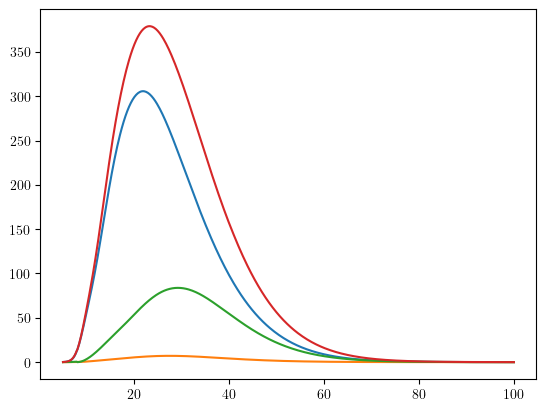

In [6]:
plt.plot(E, detection_nue)
plt.plot(E, detection_nubare)
plt.plot(E, detection_nux)
plt.plot(E, detection)
plt.show()

In [7]:
simps(detection, E)

9727.506704598061

In [8]:
npoints = 500
Enu_list = E.copy()
Edec = {}npoints = 500
Enu_list = E.copy()
Edec = {}
for i in range(20):
    Edec[i] = np.linspace(5*i, 5*(i+1), npoints)

d=[]
ddec = {}
for i in range(20):
    ddec[i] = []
for i in range(20):
    Edec[i] = np.linspace(5*i, 5*(i+1), npoints)

d=[]
ddec = {}
for i in range(20):
    ddec[i] = []

In [9]:
for i in tqdm(range(len(Enu_list))):
    E_nu = Enu_list[i]
    dd = 0
    for j in range(19):
        dd += simpson(detection[i]*dtc.resolution_detector(Edec[j],E_nu,detector),Edec[j])
        ddec[j].append(dd)
    d.append(dd)

100%|██████████| 500/500 [00:01<00:00, 358.92it/s]


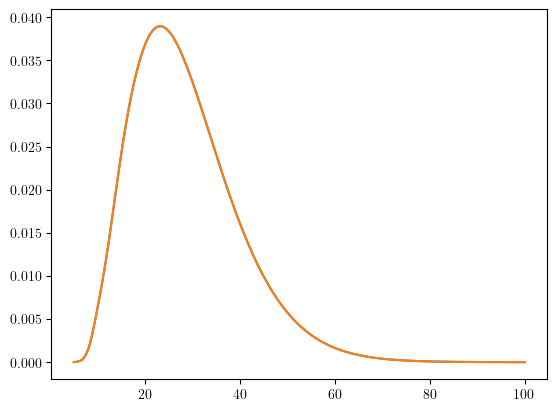

In [10]:
# for i in range(20):
#     plt.plot(Edec[i], ddec[i], label=fr'$n_{i}(E_\nu)$')
plt.plot(E, detection/simps(detection, E))
plt.plot(Enu_list, d/simps(d, Enu_list), label=r'$n(E_\nu)$')
plt.show()

In [11]:
enubin=np.concatenate(([5],np.array([[5*i, 5 + 5*(i+1)] for i in range(18)]).flatten(),[100]))
bin=np.array([[simpson(ddec[i],Enu_list), simpson(ddec[i],Enu_list)] for i in range(19)])

In [12]:
bin = np.concatenate((bin[:1,:], bin[1:,:]-bin[:-1,:]))

In [13]:
bin = bin.flatten()

In [14]:
values = bin[range(0, len(bin), 2)]

In [15]:
positions = (enubin[1:] + enubin[:-1])[range(0, len(bin), 2)]/2

In [18]:
c, cov = curve_fit(fitting_spectra, E, detection/simps(detection, E), bounds = ([0,0],[5, 20]),
                  p0 = (2, 12))

In [19]:
c

array([ 1.80055937, 12.99321209])

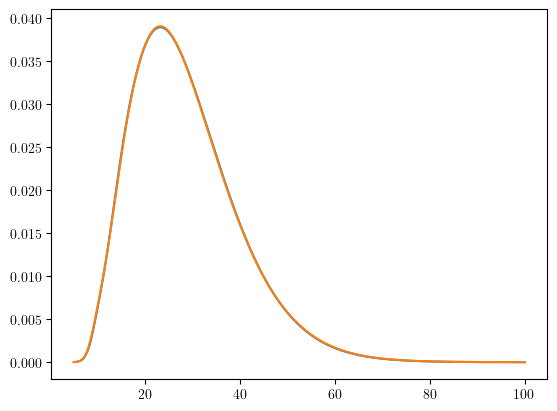

In [20]:
plt.plot(E, detection/simps(detection, E))
plt.plot(E, fitting_spectra(E, *c))
plt.show()

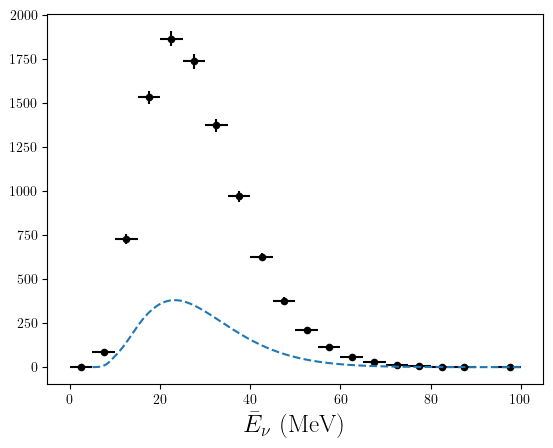

In [21]:
plt.figure()
# plt.plot(enubin,bin, label=r'$N_i$')
# plt.plot(E, detection, ls = '--')
plt.scatter(positions, values, s = 20, color = 'black')
plt.errorbar(positions, values, yerr = np.sqrt(values), xerr = 2.5,
            fmt = 'none', color = 'black')
# plt.xlim(2,35)
plt.plot(E, simps(d, Enu_list)*fitting_spectra(E, *c), ls = '--')
plt.xlabel(r'$\bar{E}_\nu$ (MeV)',fontsize=18)
# plt.legend(fontsize=11)
# plt.ylim(0, 410)
plt.show()

In [22]:
ref = dtc.energy_sampler(E, 'LS220-27.0', detector, 'normal', distance,
                         theta_detec = 0, get_directions = False, perfect_resolution = True)
# ref_invert = dtc.energy_sampler(E, 5e52, resolution, 'proportional', detector, 'inverted', distance, phi = 0, get_directions = True)


Number of expected neutrinos by flavor at 10 kpc (DUNE)

electron neutrinos: 7251
electron antineutrinos: 194
mu/tau (anti)neutrinos: 2282


In [23]:
len(ref['Energy_Total'])

9817

# Event direction

In [5]:
ref.keys()

dict_keys(['Energy_ES_nu_e', 'Energy_ES_nubar_e', 'Energy_ES_nu_x', 'Energy_ES_Total', 'Energy_16O_nu_e', 'Energy_16O_nubar_e', 'Energy_IBD_nubar_e', 'Energy_Non-ES_Total', 'Energy_Total', 'Angle_theta_ES_nu_e', 'Angle_theta_ES_nubar_e', 'Angle_theta_ES_nu_x', 'Angle_theta_ES_Total', 'Angle_theta_16O_nu_e', 'Angle_theta_16O_nubar_e', 'Angle_theta_IBD_nubar_e', 'Angle_theta_Non-ES_Total', 'Angle_theta_Total', 'Angle_phi_ES_nu_e', 'Angle_phi_ES_nubar_e', 'Angle_phi_ES_nu_x', 'Angle_phi_ES_Total', 'Angle_phi_16O_nu_e', 'Angle_phi_16O_nubar_e', 'Angle_phi_IBD_nubar_e', 'Angle_phi_Non-ES_Total', 'Angle_phi_Total'])

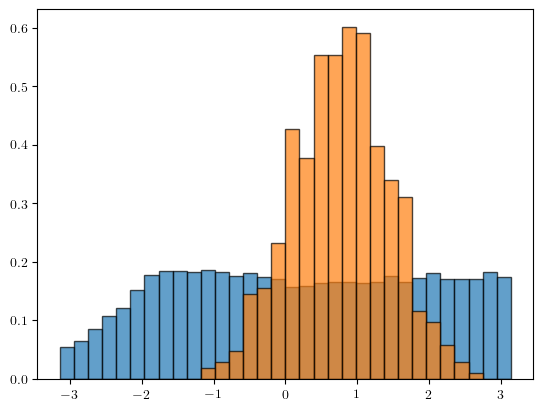

In [6]:
plt.hist(ref['Angle_theta_Non-ES_Total'], bins = [-np.pi + i*np.pi/16 for i in range(33)], density = True,
        alpha = 0.7, edgecolor = 'black')
plt.hist(ref['Angle_theta_ES_Total'], bins = [-np.pi + i*np.pi/16 for i in range(33)], density = True,
        alpha = 0.7, edgecolor = 'black')
# plt.hist(ref['Angle_theta_Total'], bins = [i*np.pi/16 for i in range(16)], density = True,
#         alpha = 0.7, edgecolor = 'black')
plt.show()

## KS-Test

In [49]:
not_tagged_ibd = []
not_tagged_ibd_energy = []

for i in tqdm(range(len(ref['Angle_theta_Non-ES_nubar_e']))):
    rand = np.random.uniform(0, 1)
    if rand > 0.9:
        not_tagged_ibd.append(ref['Angle_theta_Non-ES_nubar_e'][i])
        not_tagged_ibd_energy.append(ref['Energy_Non-ES_nubar_e'][i])

100%|██████████| 172614/172614 [00:00<00:00, 379022.34it/s]


In [50]:
after_tagging = np.concatenate((ref['Angle_theta_ES_Total'], ref['Angle_theta_Non-ES_nu_e'],
                                not_tagged_ibd))
after_tagging_energy = np.concatenate((ref['Energy_ES_Total'], ref['Energy_Non-ES_nu_e'],
                                not_tagged_ibd_energy))

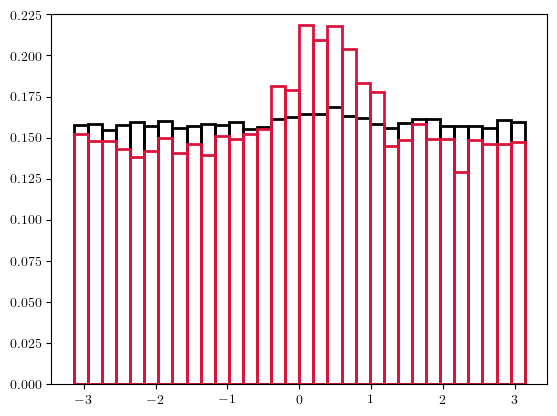

In [51]:
plt.hist(ref['Angle_theta_Total'], bins = [-np.pi + i*np.pi/16 for i in range(33)], density = True,
        alpha = 1, edgecolor = 'black', fill = False, lw = 2)

plt.hist(after_tagging[np.where(after_tagging_energy < 20)[0]],
         bins = [-np.pi + i*np.pi/16 for i in range(33)], density = True,
         alpha = 1, edgecolor = 'crimson', fill = False, lw = 2)
plt.ylim(0, 0.225)
plt.show()

In [37]:
low_energy_angles = []

for i in range(len(ref['Energy_Total'])):
    if ref['Energy_Total'][i] < 20:
        low_energy_angles.append(ref['Angle_theta_Total'][i])

In [38]:
print(f"Original number of neutrinos: {len(ref['Angle_theta_Total'])}"
      "\n"
      f"Low energy neutrinos: {len(low_energy_angles)}"
     "\n"
     f"Sample size : {100*len(low_energy_angles)/len(ref['Angle_theta_Total']):.1f}% of original")

Original number of neutrinos: 5540640
Low energy neutrinos: 2176459
Sample size : 39.3% of original


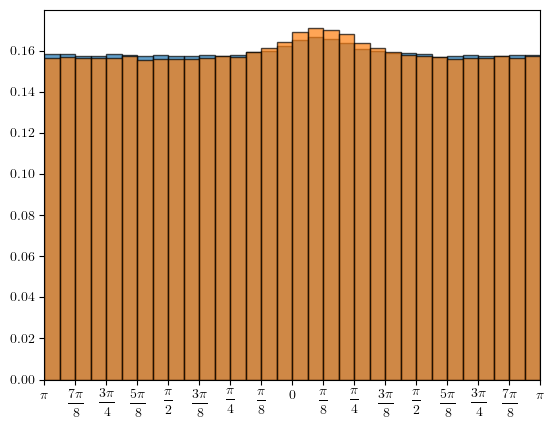

In [40]:
plt.hist(ref['Angle_theta_Total'], bins = [-np.pi + i*np.pi/16 for i in range(33)], density = True,
        alpha = 0.7, edgecolor = 'black')
plt.hist(low_energy_angles, bins = [-np.pi + i*np.pi/16 for i in range(33)], density = True,
        alpha = 0.7, edgecolor = 'black')
plt.xlim(-np.pi, np.pi)
plt.xticks([-np.pi + i*np.pi/8 for i in range(17)], labels = [r'$\pi$',
                                                    r'$\displaystyle \frac{7\pi}{8}$',
                                                    r'$\displaystyle \frac{3\pi}{4}$',
                                                    r'$\displaystyle \frac{5\pi}{8}$',
                                                    r'$\displaystyle \frac{\pi}{2}$',
                                                    r'$\displaystyle \frac{3\pi}{8}$',
                                                    r'$\displaystyle \frac{\pi}{4}$',
                                                    r'$\displaystyle \frac{\pi}{8}$',
                                                    '0',
                                                    r'$\displaystyle \frac{\pi}{8}$',
                                                    r'$\displaystyle \frac{\pi}{4}$',
                                                    r'$\displaystyle \frac{3\pi}{8}$',
                                                    r'$\displaystyle \frac{\pi}{2}$',
                                                    r'$\displaystyle \frac{5\pi}{8}$',
                                                    r'$\displaystyle \frac{3\pi}{4}$',
                                                    r'$\displaystyle \frac{7\pi}{8}$',
                                                    r'$\pi$'],
          fontsize = 10)
plt.show()

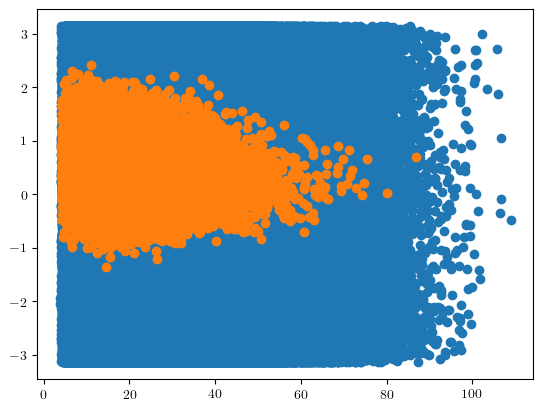

In [13]:
plt.scatter(ref['Energy_Total'], ref['Angle_theta_Total'])
plt.scatter(ref['Energy_ES_Total'], ref['Angle_theta_ES_Total'])
plt.show()

In [24]:
ratio = []
bin_center = []
bin_low = []
bin_max = []

for i in range(15):
    min_E = i*5
    bin_low.append(min_E)
    max_E = (i+1)*5
    bin_max.append(max_E)
    bin_center.append(min_E + (max_E - min_E)/2)
    n_total = len(np.where((min_E <= ref['Energy_Total']) & (ref['Energy_Total'] < max_E))[0])
    n_ibd = 0.9*len(np.where((min_E <= ref['Energy_Non-ES_nubar_e']) & (ref['Energy_Non-ES_nubar_e'] < max_E))[0])
    n_ES = len(np.where((min_E <= ref['Energy_ES_Total']) & (ref['Energy_ES_Total'] < max_E))[0])
    ratio.append(n_ES/(n_total-n_ibd))

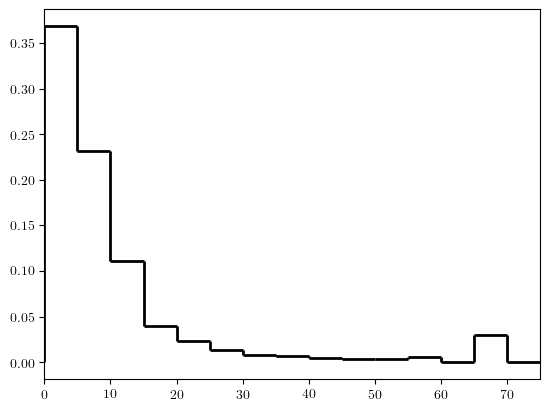

In [25]:
for i in range(len(bin_center)):
    plt.hlines(ratio[i], bin_low[i], bin_max[i], lw = 2, color = 'black')
    if i < len(bin_center)-1:
        plt.vlines(bin_max[i], ratio[i], ratio[i+1], lw = 2, color = 'black')
    if i == 0:
        plt.vlines(bin_low[i], 0, ratio[i], lw = 2, color = 'black')
# plt.plot(bin_center, ratio)
plt.xlim(0, 75)
plt.show()

In [41]:
final_ratios = {}

for i in tqdm(range(50)):
    ref = dtc.energy_sampler(E, 5e52, resolution, 'proportional', detector, 'normal', distance, nadir = 0,
                             get_directions = True, print_expected = False)
    ratio_90 = []
    ratio_50 = []
    ratio_0 = []
    bin_center = []
    bin_low = []
    bin_max = []

    for j in range(15):
        min_E = j*5
        bin_low.append(min_E)
        max_E = (j+1)*5
        bin_max.append(max_E)
        bin_center.append(min_E + (max_E - min_E)/2)
        n_total = len(np.where((min_E <= ref['Energy_Total']) & (ref['Energy_Total'] < max_E))[0])
        n_ibd_90 = 0.9*len(np.where((min_E <= ref['Energy_Non-ES_nubar_e']) & (ref['Energy_Non-ES_nubar_e'] < max_E))[0])
        n_ibd_50 = 0.5*len(np.where((min_E <= ref['Energy_Non-ES_nubar_e']) & (ref['Energy_Non-ES_nubar_e'] < max_E))[0])
        n_ES = len(np.where((min_E <= ref['Energy_ES_Total']) & (ref['Energy_ES_Total'] < max_E))[0])
        ratio_90.append(n_ES/(n_total - n_ibd_90))
        ratio_50.append(n_ES/(n_total - n_ibd_50))
        ratio_0.append(n_ES/n_total)
    final_ratios[f'Ratio_simulation_{i}_90_eff'] = ratio_90
    final_ratios[f'Ratio_simulation_{i}_50_eff'] = ratio_50
    final_ratios[f'Ratio_simulation_{i}_0_eff'] = ratio_0
    final_ratios['Bin_center'] = bin_center
    final_ratios['Bin_max'] = bin_max
    final_ratios['Bin_min'] = bin_low

100%|██████████| 50/50 [09:20<00:00, 11.21s/it]


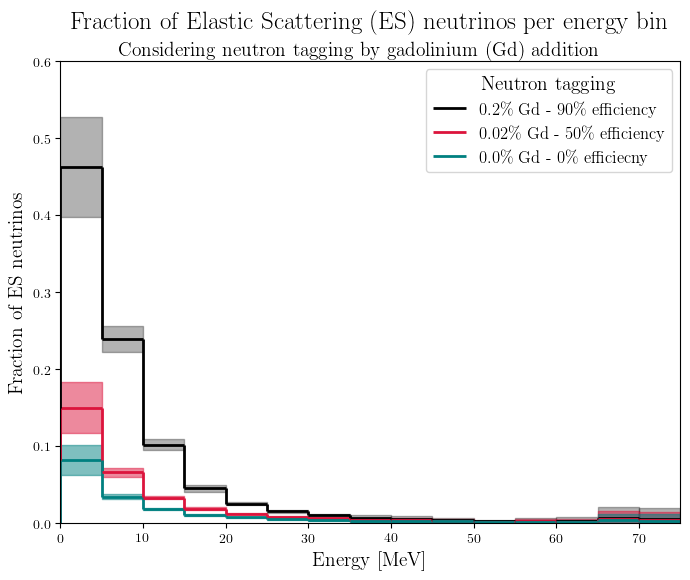

In [42]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(len(bin_center)):
    mean_90 = []
    mean_next_90 = []
    mean_50 = []
    mean_next_50 = []
    mean_0 = []
    mean_next_0 = []
    for j in range(20):
        mean_90.append(final_ratios[f'Ratio_simulation_{j}_90_eff'][i])
        mean_50.append(final_ratios[f'Ratio_simulation_{j}_50_eff'][i])
        mean_0.append(final_ratios[f'Ratio_simulation_{j}_0_eff'][i])
        if i < len(bin_center)-1:
            mean_next_90.append(final_ratios[f'Ratio_simulation_{j}_90_eff'][i+1])
            mean_next_50.append(final_ratios[f'Ratio_simulation_{j}_50_eff'][i+1])
            mean_next_0.append(final_ratios[f'Ratio_simulation_{j}_0_eff'][i+1])
    line1 = plt.hlines(np.mean(mean_90), final_ratios['Bin_min'][i], final_ratios['Bin_max'][i], lw = 2, color = 'black')
    line2 = plt.hlines(np.mean(mean_50), final_ratios['Bin_min'][i], final_ratios['Bin_max'][i], lw = 2, color = 'crimson')
    line3 = plt.hlines(np.mean(mean_0), final_ratios['Bin_min'][i], final_ratios['Bin_max'][i], lw = 2, color = 'teal')
    plt.fill_between([final_ratios['Bin_min'][i], final_ratios['Bin_max'][i]], np.mean(mean_90)-np.std(mean_90),
                     np.mean(mean_90)+np.std(mean_90), alpha = 0.3, color = 'black')
    plt.fill_between([final_ratios['Bin_min'][i], final_ratios['Bin_max'][i]], np.mean(mean_50)-np.std(mean_50),
                     np.mean(mean_50)+np.std(mean_50), alpha = 0.5, color = 'crimson')
    plt.fill_between([final_ratios['Bin_min'][i], final_ratios['Bin_max'][i]], np.mean(mean_0)-np.std(mean_0),
                     np.mean(mean_0)+np.std(mean_0), alpha = 0.5, color = 'teal')
    if i < len(bin_center)-1:
        plt.vlines(final_ratios['Bin_max'][i], np.mean(mean_90), np.mean(mean_next_90), lw = 2,
                   color = 'black')
        plt.vlines(final_ratios['Bin_max'][i], np.mean(mean_50), np.mean(mean_next_50), lw = 2,
                   color = 'crimson')
        plt.vlines(final_ratios['Bin_max'][i], np.mean(mean_0), np.mean(mean_next_0), lw = 2,
                   color = 'teal')
    if i == 0:
        plt.vlines(final_ratios['Bin_min'][i], 0, np.mean(mean_90), lw = 2, color = 'black')
        plt.vlines(final_ratios['Bin_min'][i], 0, np.mean(mean_50), lw = 2, color = 'crimson')
        plt.vlines(final_ratios['Bin_min'][i], 0, np.mean(mean_0), lw = 2, color = 'teal')
# plt.plot(bin_center, ratio)
plt.xlim(0, 75)
plt.ylim(0, 0.6)
plt.xlabel('Energy [MeV]', fontsize = 14)
plt.ylabel('Fraction of ES neutrinos', fontsize = 14)
plt.title('Fraction of Elastic Scattering (ES) neutrinos per energy bin', fontsize = 18, pad = 24)
fig.text(0.5, 0.89, 'Considering neutron tagging by gadolinium (Gd) addition', fontsize = 14,
         ha = 'center')
lgd = plt.legend([line1, line2, line3],
                 ['0.2\% Gd - 90\% efficiency', '0.02\% Gd - 50\% efficiency', '0.0\% Gd - 0\% efficiecny'],
                 loc = 'upper right', title = 'Neutron tagging', fontsize = 12)
lgd.get_title().set_fontsize(14)
plt.savefig(f'Plots/Fraction_of_ES_neutrinos_{detector}_neutron_tagging.svg', dpi = 300,
            bbox_inches = 'tight')
plt.show()

In [60]:
divisions = 18
thetas = [i*np.pi/(2*divisions) for i in range(int(divisions + 1))]
distance = 10
detector = 'Hyper-k'
tagg_eff = 0.9

p_values = np.zeros((int(divisions + 1),int(divisions + 1)))

for i in tqdm(range(int(divisions + 1))):
    theta = thetas[i]
    ref = dtc.energy_sampler(E, 5e52, resolution, 'proportional', detector, 'normal', distance, nadir = 0,
                         get_directions = True, print_expected = False, theta_detec = theta)
    not_tagged = []
    for m in range(len(ref['Angle_theta_Non-ES_nubar_e'])):
        rand = np.random.uniform(0, 1)
        if rand > tagg_eff:
            not_tagged.append(ref['Angle_theta_Non-ES_nubar_e'][m])
    angles_detected = np.concatenate((ref['Angle_theta_ES_Total'],
                                      ref['Angle_theta_Non-ES_nu_e'], not_tagged))
    for j in range(int(divisions + 1)):
        p_values_temp = []
        for k in range(1):
            theta_2 = thetas[j]
            ref_2 = dtc.energy_sampler(E, 5e52, resolution, 'proportional', detector, 'normal', distance,
                                     nadir = 0, get_directions = True, print_expected = False,
                                       theta_detec = theta_2)
            not_tagged_sim = []
            for n in range(len(ref_2['Angle_theta_Non-ES_nubar_e'])):
                rand = np.random.uniform(0, 1)
                if rand > tagg_eff:
                    not_tagged_sim.append(ref_2['Angle_theta_Non-ES_nubar_e'][n])
            angles_simu = np.concatenate((ref_2['Angle_theta_ES_Total'],
                                              ref_2['Angle_theta_Non-ES_nu_e'], not_tagged_sim))
            ks, p = st.ks_2samp(angles_detected, angles_simu)
            p_values_temp.append(p)
        p_values[i,j] = np.mean(p_values_temp)

100%|██████████| 19/19 [13:45:19<00:00, 2606.27s/it]  


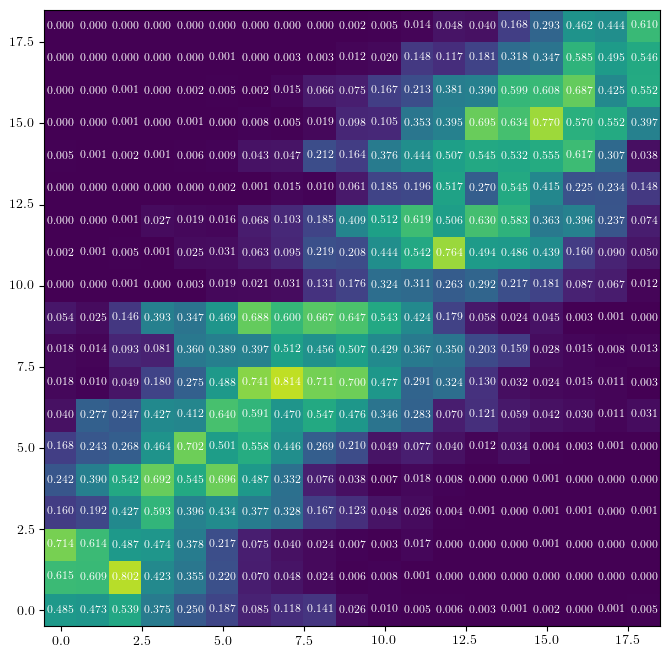

In [61]:
fig, ax = plt.subplots(figsize = (8,8))
plt.imshow(p_values, origin = 'lower', vmin = 0, vmax = 0.9)
for (j,i),label in np.ndenumerate(p_values):
    ax.text(i,j,f'{label:.3f}',ha='center',va='center', color = 'white',
           fontsize = 8)
plt.show()

In [ ]:
divisions = 24
repeat = 10
threshold = 20
thetas = [i*np.pi/(2*divisions) for i in range(divisions+1)]
distance = 10
detector = 'Hyper-k'

p_values = np.zeros((divisions+1,divisions+1))

for i in tqdm(range(divisions+1)):
    theta = thetas[i]
    ref = dtc.energy_sampler(E, 5e52, resolution, 'proportional', detector, 'normal', distance, nadir = 0,
                         get_directions = True, print_expected = False, theta_detec = theta)
    low_energy_angles = []
    for l in range(len(ref['Energy_Total'])):
        if ref['Energy_Total'][l] < threshold:
            low_energy_angles.append(ref['Angle_theta_Total'][l])

    for j in range(divisions+1):
        p_values_temp = []
        for k in range(repeat):
            theta_2 = thetas[j]
            ref_2 = dtc.energy_sampler(E, 5e52, resolution, 'proportional', detector, 'normal', distance,
                                     nadir = 0, get_directions = True, print_expected = False, theta_detec = theta_2)
            low_energy_angles_2 = []
            for m in range(len(ref_2['Energy_Total'])):
                if ref_2['Energy_Total'][m] < threshold:
                    low_energy_angles_2.append(ref_2['Angle_theta_Total'][m])
            ks, p = st.ks_2samp(low_energy_angles, low_energy_angles_2)
            p_values_temp.append(p)
        p_values[i,j] = np.mean(p_values_temp)

  0%|          | 0/25 [00:13<?, ?it/s]
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/pedroc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-f02a8fd3ca74>", line 24, in <module>
    nadir = 0, get_directions = True, print_expected = False, theta_detec = theta_2)
  File "/home/pedroc/Documentos/pedro/Mestradives/Simulations/Supernova-neutrinos/detection.py", line 237, in energy_sampler
    N_expected_ES_ebar = np.round(simps(detection_spectra(E, E_tot, 'nubar_e', detector, hierarchy, distance, nadir, custom_size, target_particles, get_directions)[1], E), 0)
  File "/home/pedroc/Documentos/pedro/Mestradives/Simulations/Supernova-neutrinos/detection.py", line 198, in detection_spectra
    spectrum = emitted_spectrum(x, flavor, E_tot, hierarchy, phi)
  File "/home/pedroc/Documentos/pedro/Mestradives/Simulations/Supernova-neutrinos/emission.py", line 121, in emitted_spectrum
    return a_ebar*F_e + b_

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/pedroc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-f02a8fd3ca74>", line 24, in <module>
    nadir = 0, get_directions = True, print_expected = False, theta_detec = theta_2)
  File "/home/pedroc/Documentos/pedro/Mestradives/Simulations/Supernova-neutrinos/detection.py", line 237, in energy_sampler
    N_expected_ES_ebar = np.round(simps(detection_spectra(E, E_tot, 'nubar_e', detector, hierarchy, distance, nadir, custom_size, target_particles, get_directions)[1], E), 0)
  File "/home/pedroc/Documentos/pedro/Mestradives/Simulations/Supernova-neutrinos/detection.py", line 198, in detection_spectra
    spectrum = emitted_spectrum(x, flavor, E_tot, hierarchy, phi)
  File "/home/pedroc/Documentos/pedro/Mestradives/Simulations/Supernova-neutrinos/emission.py", line 121, in emitted_spectrum
    return a_ebar*F_e + b_

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/pedroc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-f02a8fd3ca74>", line 24, in <module>
    nadir = 0, get_directions = True, print_expected = False, theta_detec = theta_2)
  File "/home/pedroc/Documentos/pedro/Mestradives/Simulations/Supernova-neutrinos/detection.py", line 237, in energy_sampler
    N_expected_ES_ebar = np.round(simps(detection_spectra(E, E_tot, 'nubar_e', detector, hierarchy, distance, nadir, custom_size, target_particles, get_directions)[1], E), 0)
  File "/home/pedroc/Documentos/pedro/Mestradives/Simulations/Supernova-neutrinos/detection.py", line 198, in detection_spectra
    spectrum = emitted_spectrum(x, flavor, E_tot, hierarchy, phi)
  File "/home/pedroc/Documentos/pedro/Mestradives/Simulations/Supernova-neutrinos/emission.py", line 121, in emitted_spectrum
    return a_ebar*F_e + b_

--- Logging error ---
Traceback (most recent call last):
  File "/home/pedroc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-f02a8fd3ca74>", line 24, in <module>
    nadir = 0, get_directions = True, print_expected = False, theta_detec = theta_2)
  File "/home/pedroc/Documentos/pedro/Mestradives/Simulations/Supernova-neutrinos/detection.py", line 237, in energy_sampler
    N_expected_ES_ebar = np.round(simps(detection_spectra(E, E_tot, 'nubar_e', detector, hierarchy, distance, nadir, custom_size, target_particles, get_directions)[1], E), 0)
  File "/home/pedroc/Documentos/pedro/Mestradives/Simulations/Supernova-neutrinos/detection.py", line 198, in detection_spectra
    spectrum = emitted_spectrum(x, flavor, E_tot, hierarchy, phi)
  File "/home/pedroc/Documentos/pedro/Mestradives/Simulations/Supernova-neutrinos/emission.py", line 121, in emitted_spectrum
    

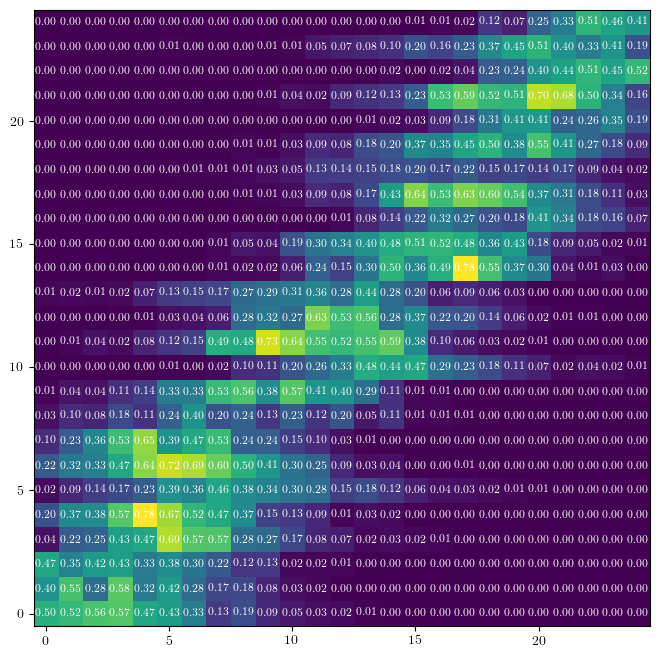

In [16]:
fig, ax = plt.subplots(figsize = (8,8))
plt.imshow(p_values, origin = 'lower')
for (j,i),label in np.ndenumerate(p_values):
    ax.text(i,j,f'{label:.2f}',ha='center',va='center', color = 'white',
           fontsize = 8)
plt.show()

In [12]:
p_values_old = p_values

In [15]:
pd.DataFrame(p_values).to_csv(f'Data/Angle_reconstruction_from_0_to_90_resolution_1_over_{divisions}_energy_cut_{threshold}_{detector}_distance_{distance}_repetitions_{repeat}_mean.csv')

In [50]:
pd.DataFrame(p_values).rename(columns = {0: '0', 1: 'pi/16', 2: '2pi/16', 3: '3pi/16', 4: '4pi/16',
                                        5: '5pi/16', 6: '6pi/16', 7: '7pi/16', 8: '8pi/16', 9: '9pi/16',
                                        10: '10pi/16', 11: '11pi/16', 12: '12pi/16', 13: '13pi/16',
                                        14: '14pi/16', 15: '15pi/16', 16: '16pi/16'}).T.rename(columns = {0: '0', 1: 'pi/16', 2: '2pi/16', 3: '3pi/16', 4: '4pi/16',
                                        5: '5pi/16', 6: '6pi/16', 7: '7pi/16', 8: '8pi/16', 9: '9pi/16',
                                        10: '10pi/16', 11: '11pi/16', 12: '12pi/16', 13: '13pi/16',
                                        14: '14pi/16', 15: '15pi/16', 16: '16pi/16'}).to_csv(f'Data/Angle_reconstruction_resolution_1_over_{divisions}_energy_cut_{threshold}_{detector}_distance_{distance}.csv')

## Maximum Likelihood

The likelihood for the scattering angle $\theta$ of the detected particle by a neutrino-electron elastic scattering ($\nu e$ES) event is given by the differential cross section $\mathrm{d}\sigma/\mathrm{d}\cos(\theta)$

\begin{align}
    \mathcal{D}(\cos\theta, E_\nu) &= \frac{1}{N} \frac{\mathrm{d}\sigma}{\mathrm{d}\cos(\theta)} = \\
    & = \frac{1}{N} \sigma_0 \frac{4 E_\nu^2 (m_e + E_\nu)^2}{\left[ (m_e + E_\nu)^2 - E_\nu^2 \cos^2(\theta)\right]^2} \left[ g_1^2 + g_2^2 \left( 1 - \frac{2 m_e E_\nu \cos^2(\theta)}{(m_e + E_\nu)^2 - E_\nu^2 \cos^2(\theta)}\right)^2 - \right. \\
    & \left. - g_1 g_2 \frac{2 m_e^2 \cos^2(\theta)}{(m_e + E_\nu)^2 - E_\nu^2 \cos^2(\theta)} \right]
\end{align}

where $N$ is the normalization constant of the integration of the cross section over $\theta$, $\sigma_0 = 88.06 \times 10^{-46}$ cm$^2$. However, neutrinos also interact through other channels. The likelihood for $\cos(\theta)$ in this case given by a uniform distribution $\mathcal{U}(0, 1)$ since the electron/positron emission is isotropic. Thus, the final likelihood for $\cos(\theta)$ given a neutrino interaction is written as

\begin{align}
    L(\cos\theta, E_\nu) = P_{\mathrm{ES}}(E_\nu) \mathcal{D}(\cos\theta, E_\nu) + (1 - P_{\mathrm{ES}}(E_\nu)) \mathcal{U}(0, 1)
\end{align}

where $P_{\mathrm{ES}}$ is the probability of the interaction ocurring via $\nu e$ES. This probability may be found by comparing the $\nu e$ES cross section with the total interaction cross section. Therefore,

$$ P_{\mathrm{ES}}(E_\nu) = \frac{\sigma_{\mathrm{ES}}(E_\nu)}{\sigma_T(E_\nu)} = \frac{\sigma_{\mathrm{ES}}(E_\nu)}{\displaystyle \sum_{i=1}^K \sigma_{i}(E_\nu)}$$

For $N$ neutrino detections, each one with a given energy $E$, the total likelihood is the product of all individual likelihood, since all detections are independent.

\begin{align}
    \mathcal{L}(\cos\theta, E_\nu) = \displaystyle \frac{1}{N} \prod_{i}^N L_i(\cos\theta, E_i)
\end{align}

There is still one last consideration. This the likelihood of a scattering angle, not a detection angle. The detection angle $\beta$ is the sum of the incident angle and the scattering angle $\beta = \phi + \theta$. Therefore, the detection likelihood must include the transformation $\cos(\theta) \rightarrow \cos(\theta + \phi)$. In order to determine $\phi$, we need to separe this cosine $\cos(\beta) = \cos(\theta)\cos(\phi) - \sin(\theta)\sin(\phi)$. We are now able to estimate $\phi$, by maximizing the likelihood of observing $\cos(\beta)$, knowing the likelihood for $\cos(\theta)$.

\begin{align}
    \mathcal{L}(\cos\beta, E_\nu, \phi) = \displaystyle \frac{1}{N} \prod_{i}^N L_i(\cos\beta, E_i, \phi)
\end{align}

such that

\begin{align}
    L(\cos\beta, E_i, \phi) = P_{\mathrm{ES}}(E_\nu) \left(\mathcal{D}(\cos\theta, E_\nu)\cos(\phi) - \mathcal{D}(\sin\theta, E_\nu)\sin(\phi) \right) + (1 - P_{\mathrm{ES}}(E_\nu)) \mathcal{U}(0, 1)
\end{align}

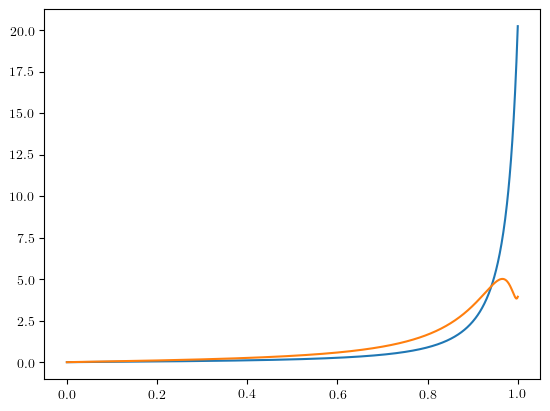

In [9]:
theta = np.linspace(0, 1, 1000)
E = 10

plt.plot(theta, cs.dsigma_dcostheta_ES(theta, E, g1_nu_e, g2_nu_e)/simps(cs.dsigma_dcostheta_ES(theta, E, g1_nu_e, g2_nu_e), theta))
plt.plot(theta, cs.dsigma_dcostheta_ES(theta, E, g1_barnu_e, g2_barnu_e)/simps(cs.dsigma_dcostheta_ES(theta, E, g1_barnu_e, g2_barnu_e), theta))
# plt.yscale('log')
plt.show()

In [13]:
def likelihood(theta, E):
    # Interaction channels
    channels = ['ibd','nue_e','nuebar_e','nue_O16','nuebar_O16','numu_e',
                    'numubar_e','nc_nue_O16']
    xs_data = cs.snowglobes(channels)

    # All these cross sections are in units of 10⁻³⁸ cm²/MeV
    cs_ibd = interp1d(1e3*(10**(xs_data[0][0])), xs_data[0][4]/1e3, fill_value='extrapolate')
    cs_nue_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[1][1]/1e3, fill_value='extrapolate')
    cs_nuebar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[2][4]/1e3, fill_value='extrapolate')
    cs_nue_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[3][1]/1e3, fill_value='extrapolate')
    cs_nuebar_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[4][1]/1e3, fill_value='extrapolate')
    cs_nux_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[5][2]/1e3, fill_value='extrapolate')
    cs_nuxbar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[6][5]/1e3, fill_value='extrapolate')
    
    # Elastic scattering cross section
    ES_cross = cs_nue_e(E)*E*1e-38 + cs_nuebar_e(E)*E*1e-38
    # Non elastic scattering cross section
    non_ES_cross = cs_nue_O16(E)*E*1e-38 + cs_ibd(E)*E*1e-38 + cs_nuebar_O16(E)*E*1e-38 + cs_nux_e(E)*E*1e-38 + cs_nuxbar_e(E)*E*1e-38
    # Probability of ES interaction
    p_ES = ES_cross/(non_ES_cross+ES_cross)
    
    # Angle likelihood ES
    cs_ES_cos_nue = cs.dsigma_dcostheta_ES(theta, E, g1_nu_e, g2_nu_e)/simps(cs.dsigma_dcostheta_ES(theta, E, g1_nu_e, g2_nu_e), theta)
    cs_ES_cos_nubare = cs.dsigma_dcostheta_ES(theta, E, g1_barnu_e, g2_barnu_e)/simps(cs.dsigma_dcostheta_ES(theta, E, g1_barnu_e, g2_barnu_e), theta)
    cs_ES_cos_nux = cs.dsigma_dcostheta_ES(theta, E, g1_nu_x, g2_nu_x)/simps(cs.dsigma_dcostheta_ES(theta, E, g1_nu_x, g2_nu_x), theta)
    cs_ES_cos_nubarx = cs.dsigma_dcostheta_ES(theta, E, g1_barnu_x, g2_barnu_x)/simps(cs.dsigma_dcostheta_ES(theta, E, g1_barnu_x, g2_barnu_x), theta)
    # Angle likelihood non-ES
    uniform = 1/(theta[-1] - theta[0])
    
    # Total likelihood
    ES_likelihood = 0.25*cs_ES_cos_nue + 0.25*cs_ES_cos_nubare + 0.25*cs_ES_cos_nux + 0.25*cs_ES_cos_nubarx
    likelihood = p_ES*(ES_likelihood) + (1-p_ES)*uniform
    return likelihood/simps(likelihood, theta), p_ES, ES_likelihood, uniform

In [55]:
def likelihood_detection(cos_theta, phi, E):
    # Defining theta
    # theta = beta - phi
    sin_theta = np.sqrt(1 - cos_theta**2)
    # Interaction channels
    channels = ['ibd','nue_e','nuebar_e','nue_O16','nuebar_O16','numu_e',
                    'numubar_e','nc_nue_O16']
    xs_data = cs.snowglobes(channels)

    # All these cross sections are in units of 10⁻³⁸ cm²/MeV
    cs_ibd = interp1d(1e3*(10**(xs_data[0][0])), xs_data[0][4]/1e3, fill_value='extrapolate')
    cs_nue_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[1][1]/1e3, fill_value='extrapolate')
    cs_nuebar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[2][4]/1e3, fill_value='extrapolate')
    cs_nue_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[3][1]/1e3, fill_value='extrapolate')
    cs_nuebar_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[4][1]/1e3, fill_value='extrapolate')
    cs_nux_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[5][2]/1e3, fill_value='extrapolate')
    cs_nuxbar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[6][5]/1e3, fill_value='extrapolate')
    
    # Elastic scattering cross section
    ES_cross = cs_nue_e(E)*E*1e-38 + cs_nuebar_e(E)*E*1e-38
    # Non elastic scattering cross section
    non_ES_cross = cs_nue_O16(E)*E*1e-38 + cs_ibd(E)*E*1e-38 + cs_nuebar_O16(E)*E*1e-38 + cs_nux_e(E)*E*1e-38 + cs_nuxbar_e(E)*E*1e-38
    # Probability of ES interaction
    p_ES = ES_cross/(non_ES_cross+ES_cross)
    
    # Angle likelihood ES
    cs_ES_cos_nue = cs.dsigma_dcostheta_ES(cos_theta, E, g1_nu_e, g2_nu_e)/simps(cs.dsigma_dcostheta_ES(cos_theta, E, g1_nu_e, g2_nu_e), cos_theta)
    cs_ES_cos_nubare = cs.dsigma_dcostheta_ES(cos_theta, E, g1_barnu_e, g2_barnu_e)/simps(cs.dsigma_dcostheta_ES(cos_theta, E, g1_barnu_e, g2_barnu_e), cos_theta)
    cs_ES_cos_nux = cs.dsigma_dcostheta_ES(cos_theta, E, g1_nu_x, g2_nu_x)/simps(cs.dsigma_dcostheta_ES(cos_theta, E, g1_nu_x, g2_nu_x), cos_theta)
    cs_ES_cos_nubarx = cs.dsigma_dcostheta_ES(cos_theta, E, g1_barnu_x, g2_barnu_x)/simps(cs.dsigma_dcostheta_ES(cos_theta, E, g1_barnu_x, g2_barnu_x), cos_theta)
    
    cs_ES_sin_nue = cs.dsigma_dsintheta_ES(sin_theta, E, g1_nu_e, g2_nu_e)/simps(cs.dsigma_dsintheta_ES(sin_theta, E, g1_nu_e, g2_nu_e), sin_theta)
    cs_ES_sin_nubare = cs.dsigma_dsintheta_ES(sin_theta, E, g1_barnu_e, g2_barnu_e)/simps(cs.dsigma_dsintheta_ES(sin_theta, E, g1_barnu_e, g2_barnu_e), sin_theta)
    cs_ES_sin_nux = cs.dsigma_dsintheta_ES(sin_theta, E, g1_nu_x, g2_nu_x)/simps(cs.dsigma_dsintheta_ES(sin_theta, E, g1_nu_x, g2_nu_x), sin_theta)
    cs_ES_sin_nubarx = cs.dsigma_dsintheta_ES(sin_theta, E, g1_barnu_x, g2_barnu_x)/simps(cs.dsigma_dsintheta_ES(sin_theta, E, g1_barnu_x, g2_barnu_x), sin_theta)
    # Angle likelihood non-ES
    uniform = 1/(cos_theta[-1] - cos_theta[0])
    
    # Detection likelihood
    flavors_cos = [cs_ES_cos_nue, cs_ES_cos_nubare, cs_ES_cos_nux, cs_ES_cos_nubarx]
    flavors_sin = [cs_ES_sin_nue, cs_ES_sin_nubare, cs_ES_sin_nux, cs_ES_sin_nubarx]
    proportions = [0.25, 0.25, 0.25, 0.25]
    ES_likelihood = 0
    for i in range(4):
        ES_likelihood += proportions[i]*(flavors_cos[i]*np.cos(phi) - flavors_sin[i]*np.sin(phi))
    
    ES_likelihood = ES_likelihood/simps(ES_likelihood, theta)
    # Total likelihood
    # ES_likelihood = 0.25*cs_ES_cos_nue + 0.25*cs_ES_cos_nubare + 0.25*cs_ES_cos_nux + 0.25*cs_ES_cos_nubarx
    likelihood = p_ES*(ES_likelihood) + (1-p_ES)*uniform
    return likelihood/simps(likelihood, theta), p_ES, ES_likelihood, uniform

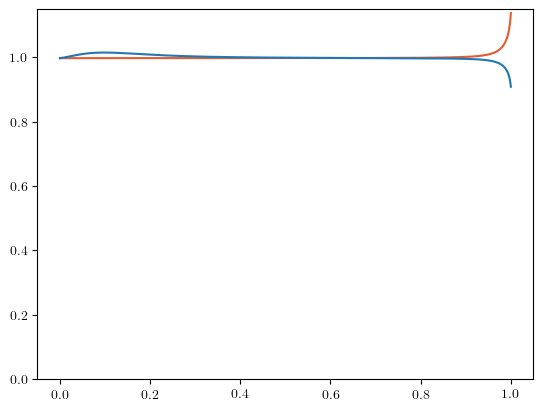

In [64]:
plt.plot(theta, likelihood(theta, 40)[0], color = sns.color_palette('inferno', 7)[4])
plt.plot(theta, likelihood_detection(theta, 1.2, 40)[0])
plt.ylim(0,)
plt.show()

  0%|          | 0/1 [00:00<?, ?it/s]

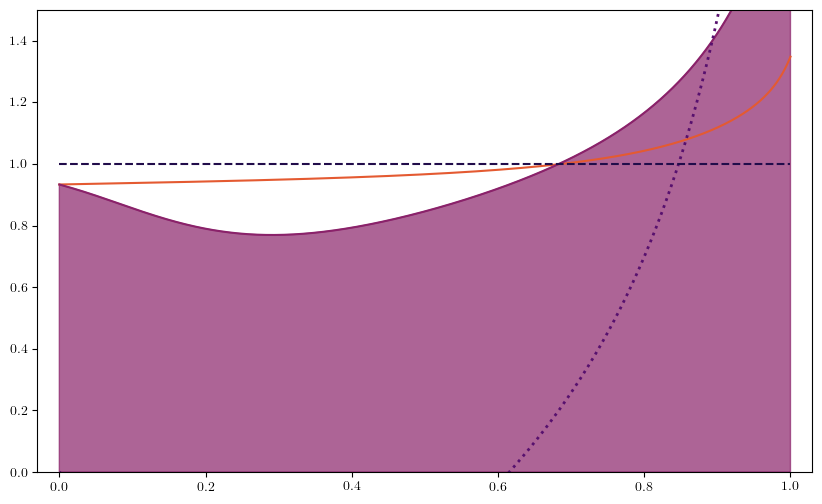

100%|██████████| 1/1 [00:06<00:00,  6.36s/it]


In [66]:
scale = 'linear'
for i in tqdm(range(1)):
    energy = 4 + i
    fig, ax = plt.subplots(figsize=(10,6))
    plt.plot(theta, likelihood(theta, energy)[0], color = sns.color_palette('inferno', 7)[4])
    plt.plot(theta, likelihood_detection(theta, 0.6, energy)[0], color = sns.color_palette('inferno', 7)[2])
    plt.fill_between(theta, 0, likelihood_detection(theta, 0.6, energy)[0], alpha = 0.7,
                    color = sns.color_palette('inferno', 7)[2])
    plt.plot(theta, likelihood_detection(theta, 0.6, energy)[2]/(5 + 1.5*i), ls = 'dotted',
            color = sns.color_palette('inferno', 7)[1], lw = 2)
    plt.hlines(1, 0, theta[-1], ls = '--', color = sns.color_palette('inferno', 7)[0])
    plt.xlim(-0.03, 1.03)
    if scale == 'linear':
        plt.ylim(0, 1.5)
        plt.yscale(scale)
    elif scale == 'log':
        plt.ylim(1e-1, 2e0)
        plt.yscale(scale)
    # plt.vlines(1, 0, likelihood(theta, energy)[0][-1], color = sns.color_palette('inferno', 7)[4])
    # plt.vlines(0, 0, likelihood(theta, energy)[0][0], color = sns.color_palette('inferno', 7)[4])
    # plt.vlines(0, 0, 1, ls = '--', color = sns.color_palette('inferno', 7)[0])
    # plt.vlines(1, 0, 1, ls = '--', color = sns.color_palette('inferno', 7)[0])
    # plt.xlabel(r'Scattering angle $\cos(\theta)$', fontsize = 18)
    # plt.ylabel(r'Likelihood $L(\cos\theta, E)$', fontsize = 18)
    # plt.yticks(fontsize = 14)
    # plt.xticks(fontsize = 14)
    # plt.title(r'$e^\pm$ scattering angle $\theta$ likelihood'
    #           '\n'
    #           r'all interaction channels and flavors at $E_\nu =$'+f' {energy} MeV', fontsize = 24)
    # fig.text(0.5, 0.79, r'$\displaystyle L(\cos\theta, E) = \frac{1}{N} \left[ P_{\mathrm{ES}} \left( \sum_{\alpha} C_\alpha \mathcal{D}\left( \cos\theta, E_\nu \right) \right) + (1-P_{\mathrm{ES}})\mathcal{U}(0, 1) \right]$',
    #          fontsize = 16, ha = 'center', bbox = dict(boxstyle ='round', facecolor='wheat', alpha=0.4))
    # fig.text(0.2, 0.69, r'$P_{ES}$ =' + f' {likelihood(theta, energy)[1]:.4f}',
    #          fontsize = 16)
    # fig.text(0.4, 0.635, r'$\mathcal{U}(0, 1)$', fontsize = 16)
    # plt.text(0.8, 1.07*(likelihood(theta, energy)[2]/(5 + 1.5*i))[750], r'$\displaystyle \sum_{\alpha} C_\alpha \mathcal{D}\left( \cos\theta, E_\nu \right)$',
    #          fontsize = 16, ha = 'right', va = 'bottom')
    # for ax in fig.axes:
    #     ax.patch.set_color('lightgrey')
    # plt.savefig(f'/home/pedroc/Documentos/pedro/Mestradives/Simulations/Gifs/Scattering_angle_likelihood/Scattering_likelihood_energy_{energy}_{scale}.png', dpi = 300, bbox_inches = 'tight')
    plt.show()

In [103]:
final_likelihood = 1
for i in tqdm(range(int(len(ref['Energy_Total'])/100))):
    final_likelihood *= likelihood(theta, ref['Energy_Total'][i])

100%|██████████| 555/555 [00:20<00:00, 27.12it/s]


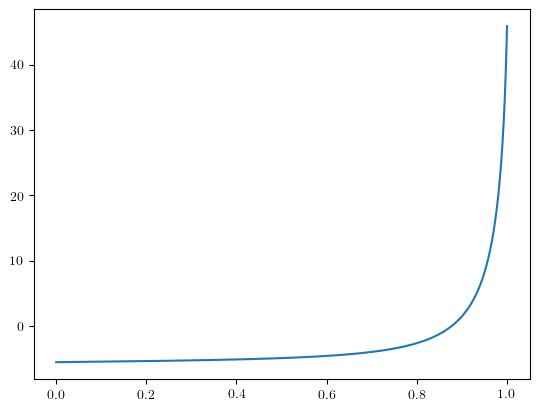

In [104]:
plt.plot(theta, np.log10(final_likelihood/(len(ref['Energy_Total'])/100)))
plt.show()

In [181]:
scale = 'linear'
for i in tqdm(range(57)):
    energy = 4 + i
    fig, ax = plt.subplots(figsize=(10,6))
    plt.plot(theta, likelihood(theta, energy)[0], color = sns.color_palette('inferno', 7)[4])
    plt.fill_between(theta, 0, likelihood(theta, energy)[0], alpha = 0.7,
                    color = sns.color_palette('inferno', 7)[4])
    plt.plot(theta, likelihood(theta, energy)[2]/(5 + 1.5*i), ls = 'dotted',
            color = sns.color_palette('inferno', 7)[1], lw = 2)
    plt.hlines(1, 0, theta[-1], ls = '--', color = sns.color_palette('inferno', 7)[0])
    # plt.plot(theta, likelihood(theta, 20))
    # plt.plot(theta, likelihood(theta, 50))
    # plt.plot(theta, likelihood(theta, 1)[2])
    plt.xlim(-0.03, 1.03)
    if scale == 'linear':
        plt.ylim(0, 1.5)
        plt.yscale(scale)
    elif scale == 'log':
        plt.ylim(1e-1, 2e0)
        plt.yscale(scale)
    plt.vlines(1, 0, likelihood(theta, energy)[0][-1], color = sns.color_palette('inferno', 7)[4])
    plt.vlines(0, 0, likelihood(theta, energy)[0][0], color = sns.color_palette('inferno', 7)[4])
    plt.vlines(0, 0, 1, ls = '--', color = sns.color_palette('inferno', 7)[0])
    plt.vlines(1, 0, 1, ls = '--', color = sns.color_palette('inferno', 7)[0])
    plt.xlabel(r'Scattering angle $\cos(\theta)$', fontsize = 18)
    plt.ylabel(r'Likelihood $L(\cos\theta, E)$', fontsize = 18)
    plt.yticks(fontsize = 14)
    plt.xticks(fontsize = 14)
    plt.title(r'$e^\pm$ scattering angle $\theta$ likelihood'
              '\n'
              r'all interaction channels and flavors at $E_\nu =$'+f' {energy} MeV', fontsize = 24)
    fig.text(0.5, 0.79, r'$\displaystyle L(\cos\theta, E) = \frac{1}{N} \left[ P_{\mathrm{ES}} \left( \sum_{\alpha} C_\alpha \mathcal{D}\left( \cos\theta, E_\nu \right) \right) + (1-P_{\mathrm{ES}})\mathcal{U}(0, 1) \right]$',
             fontsize = 16, ha = 'center', bbox = dict(boxstyle ='round', facecolor='wheat', alpha=0.4))
    fig.text(0.2, 0.69, r'$P_{ES}$ =' + f' {likelihood(theta, energy)[1]:.4f}',
             fontsize = 16)
    fig.text(0.4, 0.635, r'$\mathcal{U}(0, 1)$', fontsize = 16)
    plt.text(0.8, 1.07*(likelihood(theta, energy)[2]/(5 + 1.5*i))[750], r'$\displaystyle \sum_{\alpha} C_\alpha \mathcal{D}\left( \cos\theta, E_\nu \right)$',
             fontsize = 16, ha = 'right', va = 'bottom')
    # for ax in fig.axes:
    #     ax.patch.set_color('lightgrey')
    plt.savefig(f'/home/pedroc/Documentos/pedro/Mestradives/Simulations/Gifs/Scattering_angle_likelihood/Scattering_likelihood_energy_{energy}_{scale}.png', dpi = 300, bbox_inches = 'tight')
    plt.close()

100%|██████████| 57/57 [01:39<00:00,  1.74s/it]


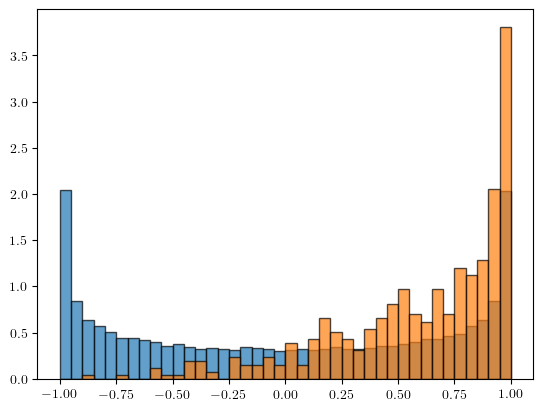

In [31]:
plt.hist(np.cos(ref['Angle_theta_Non-ES_Total']), bins = [-1 + 0.05*i for i in range(41)], density = True,
        alpha = 0.7, edgecolor = 'black')
plt.hist(np.cos(ref['Angle_theta_ES_Total']), bins = [-1 + 0.05*i for i in range(41)], density = True,
        alpha = 0.7, edgecolor = 'black')
# plt.hist(np.cos(ref['Angle_theta_Total']), bins = [-1 + 0.05*i for i in range(41)], density = True,
#         alpha = 0.7, edgecolor = 'black')
plt.show()

# Spectrum reconstruction and distance

In [5]:
2*(0.11*np.sqrt(50) + 0.02*50) #DUNE
#2*0.03*np.sqrt(50) #JUNO
# 2*0.5*np.sqrt(50) #Super/Hyper-K

3.5556349186104046

In [24]:
# y, bins = np.histogram(ref['Energy_Total'], bins = [7*i for i in range(16)], density = True) # Super/Hyper-K
y, bins = np.histogram(ref['Energy_Total'], bins = [5*i for i in range(21)], density = True)

In [25]:
x = (bins[:-1] + bins[1:])/2

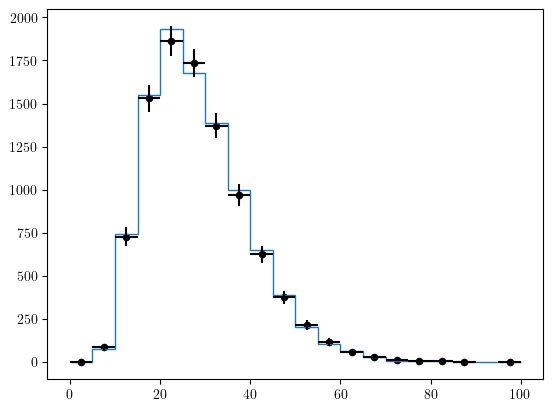

In [35]:
# plt.plot(x, y)
plt.hist(ref['Energy_Total'], bins = [5*i for i in range(21)], histtype = 'step')
plt.scatter(positions, values, s = 20, color = 'black')
plt.errorbar(positions, values, yerr = 2*np.sqrt(values), xerr = 2.5,
            fmt = 'none', color = 'black')
plt.show()

In [16]:
f = fitting.fitting_spectra

In [17]:
def fitting_spectra(x, alpha, E_mean):
    """
    Shape of the detection spectrum
    """
################################ SUPER-K
#     channels = ['ibd','nue_e','nuebar_e','nue_O16','nuebar_O16','numu_e',
#                     'numubar_e','nc_nue_O16','nc_nuebar_O16']
#     xs_data = cs.snowglobes(channels)

#     # All these cross sections are in units of 10⁻³⁸ cm²/MeV
#     cs_ibd = interp1d(1e3*(10**(xs_data[0][0])), xs_data[0][4]/1e3, fill_value='extrapolate')
#     cs_nue_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[1][1]/1e3, fill_value='extrapolate')
#     cs_nuebar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[2][4]/1e3, fill_value='extrapolate')
#     cs_nue_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[3][1]/1e3, fill_value='extrapolate')
#     cs_nuebar_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[4][1]/1e3, fill_value='extrapolate')
#     cs_nux_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[5][2]/1e3, fill_value='extrapolate')
#     cs_nuxbar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[6][5]/1e3, fill_value='extrapolate')
#     cs_nc_nue_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[7][1]/1e3, fill_value='extrapolate')
#     cs_nc_nue_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[7][1]/1e3, fill_value='extrapolate')
#     cs_nc_nuebar_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[8][4]/1e3, fill_value='extrapolate')
#     # Total cross section
#     total_cross = cs_nue_e(x)*x*1e-38 + cs_nue_O16(x)*x*1e-38 + cs_nuebar_e(x)*x*1e-38 + cs_ibd(x)*x*1e-38 + cs_nuebar_O16(x)*x*1e-38 + cs_nux_e(x)*x*1e-38 + cs_nuxbar_e(x)*x*1e-38 + cs_nc_nuebar_O16(x)*x*1e-38
#     # Detector efficiency
#     eff = np.where(x<4.5,0,0.9) #efficiency_sigmoid(x, 0.918, 1.2127, 3)

################################ DUNE
    channels = ['ibd','nue_e','nuebar_e','nue_Ar40','nuebar_Ar40','numu_e',
                    'numubar_e','nc_nue_Ar40','nc_nuebar_Ar40','nc_numu_Ar40',
                    'nc_numubar_Ar40']
    xs_data = cs.snowglobes(channels)

    # All these cross sections are in units of 10⁻³⁸ cm²/MeV
    cs_ibd = interp1d(1e3*(10**(xs_data[0][0])), xs_data[0][4]/1e3, fill_value='extrapolate')
    cs_nue_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[1][1]/1e3, fill_value='extrapolate')
    cs_nuebar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[2][4]/1e3, fill_value='extrapolate')
    cs_nue_Ar40 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[3][1]/1e3, fill_value='extrapolate')
    cs_nuebar_Ar40 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[4][1]/1e3, fill_value='extrapolate')
    cs_nux_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[5][2]/1e3, fill_value='extrapolate')
    cs_nuxbar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[6][5]/1e3, fill_value='extrapolate')
    cs_nc_nue_Ar40 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[7][1]/1e3, fill_value='extrapolate')
    cs_nc_nuebar_Ar40 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[8][4]/1e3, fill_value='extrapolate')
    cs_nc_nux_Ar40 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[9][2]/1e3, fill_value='extrapolate')
    cs_nc_nuxbar_Ar40 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[10][5]/1e3, fill_value='extrapolate')
    # Total cross section
    total_cross = cs_nue_e(x)*x*1e-38 + cs_nue_Ar40(x)*x*1e-38 + cs_nuebar_e(x)*x*1e-38 + cs_nuebar_Ar40(x)*x*1e-38 + cs_nux_e(x)*x*1e-38 + cs_nuxbar_e(x)*x*1e-38 + cs_nc_nue_Ar40(x)*x*1e-38 + cs_nc_nuebar_Ar40(x)*x*1e-38 + cs_nc_nux_Ar40(x)*x*1e-38 + cs_nc_nuxbar_Ar40(x)*x*1e-38
    # Detector efficiency
    eff = dtc.efficiency_sigmoid(x, 0.98, 1.2127, 8.0591)
    
################################# JUNO
#     channels = ['ibd','nue_e','nuebar_e','nue_C12','nuebar_C12','numu_e',
#                     'numubar_e','nc_nue_C12','nc_nuebar_C12','nc_numu_C12',
#                     'nc_numubar_C12']
#     xs_data = cs.snowglobes(channels)

#     # All these cross sections are in units of 10⁻³⁸ cm²/MeV
#     cs_ibd = interp1d(1e3*(10**(xs_data[0][0])), xs_data[0][4]/1e3, fill_value = 'extrapolate')
#     cs_nue_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[1][1]/1e3, fill_value = 'extrapolate')
#     cs_nuebar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[2][4]/1e3, fill_value = 'extrapolate')
#     cs_nue_C12 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[3][1]/1e3, fill_value = 'extrapolate')
#     cs_nuebar_C12 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[4][1]/1e3, fill_value = 'extrapolate')
#     cs_nux_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[5][2]/1e3, fill_value = 'extrapolate')
#     cs_nuxbar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[6][5]/1e3, fill_value = 'extrapolate')
#     cs_nc_nue_C12 = interp1d(1e3*(10**(xs_data[7][0])), xs_data[7][1]/1e3, fill_value = 'extrapolate')
#     cs_nc_nuebar_C12 = interp1d(1e3*(10**(xs_data[8][0])), xs_data[8][4]/1e3, fill_value = 'extrapolate')
#     cs_nc_nux_C12 = interp1d(1e3*(10**(xs_data[9][0])), xs_data[9][2]/1e3, fill_value = 'extrapolate')
#     cs_nc_nuxbar_C12 = interp1d(1e3*(10**(xs_data[10][0])), xs_data[10][5]/1e3, fill_value = 'extrapolate')
#     # Number of target particles
#     """"
#     Fengpeng, A., Guangpeng, A. N., Qi, A. N., Antonelli, V., Baussan, E.,
#     Beacom, J., ... & Sinev, V. (2016). Neutrino physics with JUNO.
#     """
#     # Total cross section
#     total_cross = cs_nue_e(x)*x*1e-38 + cs_nue_C12(x)*x*1e-38 + cs_nc_nue_C12(x)*x*1e-38 + cs_nuebar_e(x)*x*1e-38 + cs_ibd(x)*x*1e-38 + cs_nuebar_C12(x)*x*1e-38 + cs_nc_nuebar_C12(x)*x*1e-38 + cs_nux_e(x)*x*1e-38 + cs_nuxbar_e(x)*x*1e-38 + cs_nc_nux_C12(x)*x*1e-38 + cs_nc_nuxbar_C12(x)*x*1e-38
#     eff = np.where(x<0.3,0,1) #efficiency_sigmoid(x, 0.918, 1.2127, 3)
    # Combined spectrum
    spectrum = fitting.spectrum_shape(x, alpha, E_mean)
    all = spectrum*total_cross*eff
    # Normalization
    A = simps(all, x)
    return all/A

In [27]:
c, cov = curve_fit(fitting_spectra, x, y, bounds = ([0,0],[5, 20]))

In [28]:
c

array([ 1.55567434, 12.38769539])

In [29]:
cov**0.5

array([[0.09340348, 0.15263405],
       [0.15263405, 0.2538149 ]])

In [30]:
curves = []

E = np.linspace(0, 100, 10000)

for i in tqdm(range(100)):
    a = np.random.normal(c[0], np.sqrt(cov[0,0]))
    b = np.random.normal(c[1], np.sqrt(cov[1,1]))
    
    curves.append(fitting_spectra(E, a, b))
    
curves = np.array(curves)

100%|██████████| 100/100 [00:02<00:00, 33.63it/s]


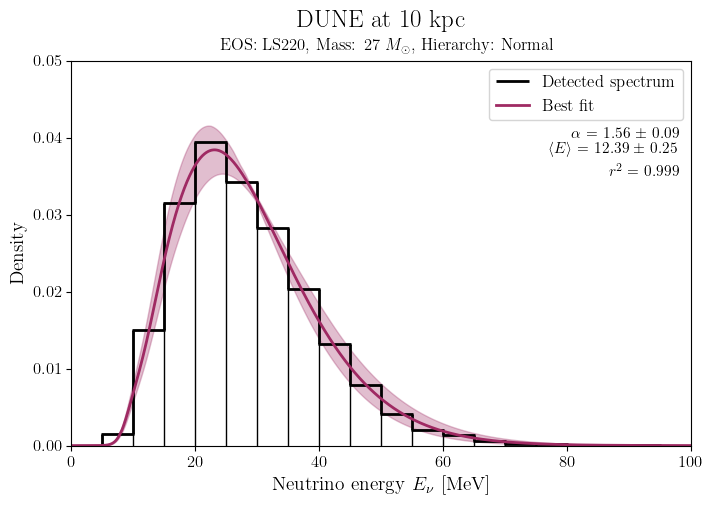

In [31]:
E = np.linspace(0, 100, 10000)

fig, ax = plt.subplots(figsize = (8,5))
# plt.plot(x, y, lw = 2, color = 'black')
plt.hlines(y, bins[:-1]-0.15, bins[1:]+0.15, lw = 2, color = 'black', label = 'Detected spectrum')
plt.vlines(bins[1:-1], y[:-1], y[1:], lw = 2, color = 'black')
plt.vlines(bins[1:-1], 0, y[1:], lw = 1, color = 'black')
plt.plot(E, fitting_spectra(E, *c), color = sns.color_palette('inferno')[2], lw = 2, label = 'Best fit')
# plt.plot(x, np.mean(curves, axis = 0), color = sns.color_palette('inferno')[2], lw = 2, label = 'Best fit')
plt.fill_between(E, np.percentile(curves, 2.5, axis = 0),
                 np.percentile(curves, 97.5, axis = 0),
                 color = sns.color_palette('inferno')[2], alpha = 0.3)
plt.xlim(0, 100)
plt.ylim(0, 0.05)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel(r'Neutrino energy $E_\nu$ [MeV]', fontsize = 14)
plt.ylabel(r'Density', fontsize = 14)
plt.title(r'DUNE at 10 kpc', fontsize = 18, pad = 24)
fig.text(0.52, 0.9, r'EOS: LS220, Mass: 27 $M_{\odot}$, Hierarchy: Normal', fontsize = 12, ha = 'center')
plt.legend(loc = 'upper right', fontsize = 12)
plt.text(98, 0.038, fr'$\alpha$ = {c[0]:.2f} $\pm$ {np.sqrt(cov[0,0]):.2f}'
         '\n'
         fr'$\left \langle E \right \rangle$ = {c[1]:.2f} $\pm$ {np.sqrt(cov[1,1]):.2f}',
         fontsize = 11, ha = 'right')
plt.text(98, 0.035, f'$r^2 = $ {r2_score(y, fitting_spectra(x, *c)):.3f}', fontsize = 11,
         ha = 'right')
fig.patch.set_alpha(0.3)
for ax in fig.axes:
    ax.patch.set_alpha(0.7)
    
# plt.savefig(f'Plots/{detector}_detection_spectrum_fit_least-squares_IH_10kpc_standard_resolution.png',
#             dpi = 300, bbox_inches = 'tight')
# plt.savefig(f'Plots/{detector}_detection_spectrum_fit_least-squares_IH_10kpc_standard_resolution.svg',
#             dpi = 300, bbox_inches = 'tight')
plt.show()

In [59]:
compare = {}
compare['SK_NH_alpha'] = '1.77 +/- 0.09'
compare['SK_NH_E'] = '11.25 +/- 0.16'
compare['DUNE_NH_alpha'] = '1.40 +/- 0.15'
compare['DUNE_NH_E'] = '11.30 +/- 0.39'
compare['JUNO_NH_alpha'] = '1.64 +/- 0.09'
compare['JUNO_NH_E'] = '11.18 +/- 0.18'
compare['SK_NH_alpha'] = ''
compare['SK_NH_E'] = ''
compare['DUNE_NH_alpha'] = '1.52 +/- 0.11'
compare['DUNE_NH_E'] = '11.57 +/- 0.29'
compare['JUNO_NH_alpha'] = ''
compare['JUNO_NH_E'] = ''

### Loop for running several fits with Least-Squares

In [16]:
results = {}

In [17]:
E = np.linspace(1, 100, 1000000) # Neutrino detection energy
detector = 'Hyper-k'
distance = 10 # kpc
if detector == 'super-k':
    targets = (32e9/18.01528)*6.022e23*2
elif detector == 'DUNE':
    targets = 6.03e32
elif detector == 'JUNO':
    targets = 1.5e33
elif detector == 'Hyper-k':
    targets = (216e9/18.01528)*6.022e23*2

In [18]:
def fitting_spectra(x, alpha, E_mean):
    """
    Shape of the detection spectrum
    """
################################ SUPER-K
    channels = ['ibd','nue_e','nuebar_e','nue_O16','nuebar_O16','numu_e',
                    'numubar_e','nc_nue_O16','nc_nuebar_O16']
    xs_data = cs.snowglobes(channels)

    # All these cross sections are in units of 10⁻³⁸ cm²/MeV
    cs_ibd = interp1d(1e3*(10**(xs_data[0][0])), xs_data[0][4]/1e3, fill_value='extrapolate')
    cs_nue_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[1][1]/1e3, fill_value='extrapolate')
    cs_nuebar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[2][4]/1e3, fill_value='extrapolate')
    cs_nue_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[3][1]/1e3, fill_value='extrapolate')
    cs_nuebar_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[4][1]/1e3, fill_value='extrapolate')
    cs_nux_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[5][2]/1e3, fill_value='extrapolate')
    cs_nuxbar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[6][5]/1e3, fill_value='extrapolate')
    cs_nc_nue_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[7][1]/1e3, fill_value='extrapolate')
    cs_nc_nue_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[7][1]/1e3, fill_value='extrapolate')
    cs_nc_nuebar_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[8][4]/1e3, fill_value='extrapolate')
    # Total cross section
    total_cross = cs_nue_e(x)*x*1e-38 + cs_nue_O16(x)*x*1e-38 + cs_nuebar_e(x)*x*1e-38 + cs_ibd(x)*x*1e-38 + cs_nuebar_O16(x)*x*1e-38 + cs_nux_e(x)*x*1e-38 + cs_nuxbar_e(x)*x*1e-38 + cs_nc_nuebar_O16(x)*x*1e-38
    # Detector efficiency
    eff = np.where(x<4.5,0,0.9) #efficiency_sigmoid(x, 0.918, 1.2127, 3)
    spectrum = fitting.spectrum_shape(x, alpha, E_mean)
    all = spectrum*total_cross*eff
    # Normalization
    A = simps(all, x)
    return all/A

In [19]:
results['Hyper-k_alpha_normal'] = []
results['Hyper-k_alpha_std_normal'] = []
results['Hyper-k_E_mean_normal'] = []
results['Hyper-k_E_mean_std_normal'] = []

for i in tqdm(range(100)):
    ref = dtc.energy_sampler(E, 'LS220-27.0', detector, 'normal', distance, nadir = 0,
                         theta_detec = 0, get_directions = False, print_expected = False)
    y, bins = np.histogram(ref['Energy_Total'], bins = [2*i for i in range(51)], density = True)
    x = (bins[:-1] + bins[1:])/2
    
    c, cov = curve_fit(fitting_spectra, x, y, bounds = ([0,0],[5, 20]))

    results['Hyper-k_alpha_normal'].append(c[0])
    results['Hyper-k_alpha_std_normal'].append(np.sqrt(cov[0,0]))
    results['Hyper-k_E_mean_normal'].append(c[1])
    results['Hyper-k_E_mean_std_normal'].append(np.sqrt(cov[1,1]))

100%|██████████| 100/100 [05:31<00:00,  3.31s/it]


In [20]:
results['Hyper-k_alpha_inverted'] = []
results['Hyper-k_alpha_std_inverted'] = []
results['Hyper-k_E_mean_inverted'] = []
results['Hyper-k_E_mean_std_inverted'] = []

for i in tqdm(range(100)):
    ref = dtc.energy_sampler(E, 'LS220-27.0', detector, 'inverted', distance, nadir = 0,
                         theta_detec = 0, get_directions = False, print_expected = False)
    y, bins = np.histogram(ref['Energy_Total'], bins = [2*i for i in range(51)], density = True)
    x = (bins[:-1] + bins[1:])/2
    
    c, cov = curve_fit(fitting_spectra, x, y, bounds = ([0,0],[5, 20]))
    
    results['Hyper-k_alpha_inverted'].append(c[0])
    results['Hyper-k_alpha_std_inverted'].append(np.sqrt(cov[0,0]))
    results['Hyper-k_E_mean_inverted'].append(c[1])
    results['Hyper-k_E_mean_std_inverted'].append(np.sqrt(cov[1,1]))

100%|██████████| 100/100 [05:33<00:00,  3.33s/it]


In [21]:
E = np.linspace(1, 100, 1000000) # Neutrino detection energy
detector = 'super-k'
distance = 10 # kpc
if detector == 'super-k':
    targets = (32e9/18.01528)*6.022e23*2
elif detector == 'DUNE':
    targets = 6.03e32
elif detector == 'JUNO':
    targets = 1.5e33
elif detector == 'Hyper-k':
    targets = (216e9/18.01528)*6.022e23*2

In [22]:
results['Super-k_alpha_normal'] = []
results['Super-k_alpha_std_normal'] = []
results['Super-k_E_mean_normal'] = []
results['Super-k_E_mean_std_normal'] = []

for i in tqdm(range(100)):
    ref = dtc.energy_sampler(E, 'LS220-27.0', detector, 'normal', distance, nadir = 0,
                         theta_detec = 0, get_directions = False, print_expected = False)
    y, bins = np.histogram(ref['Energy_Total'], bins = [2*i for i in range(51)], density = True)
    x = (bins[:-1] + bins[1:])/2
    c, cov = curve_fit(fitting_spectra, x, y, bounds = ([0,0],[5, 20]))
    
    results['Super-k_alpha_normal'].append(c[0])
    results['Super-k_alpha_std_normal'].append(np.sqrt(cov[0,0]))
    results['Super-k_E_mean_normal'].append(c[1])
    results['Super-k_E_mean_std_normal'].append(np.sqrt(cov[1,1]))

100%|██████████| 100/100 [05:07<00:00,  3.08s/it]


In [23]:
results['Super-k_alpha_inverted'] = []
results['Super-k_alpha_std_inverted'] = []
results['Super-k_E_mean_inverted'] = []
results['Super-k_E_mean_std_inverted'] = []

for i in tqdm(range(100)):
    ref = dtc.energy_sampler(E, 'LS220-27.0', detector, 'inverted', distance, nadir = 0,
                         theta_detec = 0, get_directions = False, print_expected = False)
    y, bins = np.histogram(ref['Energy_Total'], bins = [2*i for i in range(51)], density = True)
    x = (bins[:-1] + bins[1:])/2
    
    c, cov = curve_fit(fitting_spectra, x, y, bounds = ([0,0],[5, 20]))
    
    results['Super-k_alpha_inverted'].append(c[0])
    results['Super-k_alpha_std_inverted'].append(np.sqrt(cov[0,0]))
    results['Super-k_E_mean_inverted'].append(c[1])
    results['Super-k_E_mean_std_inverted'].append(np.sqrt(cov[1,1]))

100%|██████████| 100/100 [05:07<00:00,  3.07s/it]


In [24]:
E = np.linspace(1, 100, 1000000) # Neutrino detection energy
detector = 'DUNE'
distance = 10 # kpc
if detector == 'super-k':
    targets = (32e9/18.01528)*6.022e23*2
elif detector == 'DUNE':
    targets = 6.03e32
elif detector == 'JUNO':
    targets = 1.5e33
elif detector == 'Hyper-k':
    targets = (216e9/18.01528)*6.022e23*2

In [25]:
def fitting_spectra(x, alpha, E_mean):
    """
    Shape of the detection spectrum
    """
    channels = ['ibd','nue_e','nuebar_e','nue_Ar40','nuebar_Ar40','numu_e',
                    'numubar_e','nc_nue_Ar40','nc_nuebar_Ar40','nc_numu_Ar40',
                    'nc_numubar_Ar40']
    xs_data = cs.snowglobes(channels)

    # All these cross sections are in units of 10⁻³⁸ cm²/MeV
    cs_ibd = interp1d(1e3*(10**(xs_data[0][0])), xs_data[0][4]/1e3, fill_value='extrapolate')
    cs_nue_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[1][1]/1e3, fill_value='extrapolate')
    cs_nuebar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[2][4]/1e3, fill_value='extrapolate')
    cs_nue_Ar40 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[3][1]/1e3, fill_value='extrapolate')
    cs_nuebar_Ar40 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[4][1]/1e3, fill_value='extrapolate')
    cs_nux_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[5][2]/1e3, fill_value='extrapolate')
    cs_nuxbar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[6][5]/1e3, fill_value='extrapolate')
    cs_nc_nue_Ar40 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[7][1]/1e3, fill_value='extrapolate')
    cs_nc_nuebar_Ar40 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[8][4]/1e3, fill_value='extrapolate')
    cs_nc_nux_Ar40 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[9][2]/1e3, fill_value='extrapolate')
    cs_nc_nuxbar_Ar40 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[10][5]/1e3, fill_value='extrapolate')
    # Total cross section
    total_cross = cs_nue_e(x)*x*1e-38 + cs_nue_Ar40(x)*x*1e-38 + cs_nuebar_e(x)*x*1e-38 + cs_nuebar_Ar40(x)*x*1e-38 + cs_nux_e(x)*x*1e-38 + cs_nuxbar_e(x)*x*1e-38 + cs_nc_nue_Ar40(x)*x*1e-38 + cs_nc_nuebar_Ar40(x)*x*1e-38 + cs_nc_nux_Ar40(x)*x*1e-38 + cs_nc_nuxbar_Ar40(x)*x*1e-38
    # Detector efficiency
    eff = dtc.efficiency_sigmoid(x, 0.98, 1.2127, 8.0591)
    # Combined spectrum
    spectrum = fitting.spectrum_shape(x, alpha, E_mean)
    all = spectrum*total_cross*eff
    # Normalization
    A = simps(all, x)
    return all/A

In [26]:
results['DUNE_alpha_normal'] = []
results['DUNE_alpha_std_normal'] = []
results['DUNE_E_mean_normal'] = []
results['DUNE_E_mean_std_normal'] = []

for i in tqdm(range(100)):
    ref = dtc.energy_sampler(E, 'LS220-27.0', detector, 'normal', distance, nadir = 0,
                         theta_detec = 0, get_directions = False, print_expected = False)
    y, bins = np.histogram(ref['Energy_Total'], bins = [2*i for i in range(51)], density = True)
    x = (bins[:-1] + bins[1:])/2
    
    c, cov = curve_fit(fitting_spectra, x, y, bounds = ([0,0],[5, 20]))
    
    results['DUNE_alpha_normal'].append(c[0])
    results['DUNE_alpha_std_normal'].append(np.sqrt(cov[0,0]))
    results['DUNE_E_mean_normal'].append(c[1])
    results['DUNE_E_mean_std_normal'].append(np.sqrt(cov[1,1]))

100%|██████████| 100/100 [05:45<00:00,  3.45s/it]


In [27]:
results['DUNE_alpha_inverted'] = []
results['DUNE_alpha_std_inverted'] = []
results['DUNE_E_mean_inverted'] = []
results['DUNE_E_mean_std_inverted'] = []

for i in tqdm(range(100)):
    ref = dtc.energy_sampler(E, 'LS220-27.0', detector, 'inverted', distance, nadir = 0,
                         theta_detec = 0, get_directions = False, print_expected = False)
    y, bins = np.histogram(ref['Energy_Total'], bins = [2*i for i in range(51)], density = True)
    x = (bins[:-1] + bins[1:])/2
    
    c, cov = curve_fit(fitting_spectra, x, y, bounds = ([0,0],[5, 20]))
    
    results['DUNE_alpha_inverted'].append(c[0])
    results['DUNE_alpha_std_inverted'].append(np.sqrt(cov[0,0]))
    results['DUNE_E_mean_inverted'].append(c[1])
    results['DUNE_E_mean_std_inverted'].append(np.sqrt(cov[1,1]))

100%|██████████| 100/100 [05:41<00:00,  3.41s/it]


In [28]:
E = np.linspace(1, 100, 1000000) # Neutrino detection energy
detector = 'JUNO'
distance = 10 # kpc
if detector == 'super-k':
    targets = (32e9/18.01528)*6.022e23*2
elif detector == 'DUNE':
    targets = 6.03e32
elif detector == 'JUNO':
    targets = 1.5e33
elif detector == 'Hyper-k':
    targets = (216e9/18.01528)*6.022e23*2

In [29]:
def fitting_spectra(x, alpha, E_mean):
    """
    Shape of the detection spectrum
    """
    channels = ['ibd','nue_e','nuebar_e','nue_C12','nuebar_C12','numu_e',
                    'numubar_e','nc_nue_C12','nc_nuebar_C12','nc_numu_C12',
                    'nc_numubar_C12']
    xs_data = cs.snowglobes(channels)

    # All these cross sections are in units of 10⁻³⁸ cm²/MeV
    cs_ibd = interp1d(1e3*(10**(xs_data[0][0])), xs_data[0][4]/1e3, fill_value = 'extrapolate')
    cs_nue_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[1][1]/1e3, fill_value = 'extrapolate')
    cs_nuebar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[2][4]/1e3, fill_value = 'extrapolate')
    cs_nue_C12 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[3][1]/1e3, fill_value = 'extrapolate')
    cs_nuebar_C12 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[4][1]/1e3, fill_value = 'extrapolate')
    cs_nux_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[5][2]/1e3, fill_value = 'extrapolate')
    cs_nuxbar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[6][5]/1e3, fill_value = 'extrapolate')
    cs_nc_nue_C12 = interp1d(1e3*(10**(xs_data[7][0])), xs_data[7][1]/1e3, fill_value = 'extrapolate')
    cs_nc_nuebar_C12 = interp1d(1e3*(10**(xs_data[8][0])), xs_data[8][4]/1e3, fill_value = 'extrapolate')
    cs_nc_nux_C12 = interp1d(1e3*(10**(xs_data[9][0])), xs_data[9][2]/1e3, fill_value = 'extrapolate')
    cs_nc_nuxbar_C12 = interp1d(1e3*(10**(xs_data[10][0])), xs_data[10][5]/1e3, fill_value = 'extrapolate')
    # Number of target particles
    """"
    Fengpeng, A., Guangpeng, A. N., Qi, A. N., Antonelli, V., Baussan, E.,
    Beacom, J., ... & Sinev, V. (2016). Neutrino physics with JUNO.
    """
    # Total cross section
    total_cross = cs_nue_e(x)*x*1e-38 + cs_nue_C12(x)*x*1e-38 + cs_nc_nue_C12(x)*x*1e-38 + cs_nuebar_e(x)*x*1e-38 + cs_ibd(x)*x*1e-38 + cs_nuebar_C12(x)*x*1e-38 + cs_nc_nuebar_C12(x)*x*1e-38 + cs_nux_e(x)*x*1e-38 + cs_nuxbar_e(x)*x*1e-38 + cs_nc_nux_C12(x)*x*1e-38 + cs_nc_nuxbar_C12(x)*x*1e-38
    eff = np.where(x<0.3,0,1) #efficiency_sigmoid(x, 0.918, 1.2127, 3)
    # Combined spectrum
    spectrum = fitting.spectrum_shape(x, alpha, E_mean)
    all = spectrum*total_cross*eff
    # Normalization
    A = simps(all, x)
    return all/A

In [30]:
results['JUNO_alpha_normal'] = []
results['JUNO_alpha_std_normal'] = []
results['JUNO_E_mean_normal'] = []
results['JUNO_E_mean_std_normal'] = []

for i in tqdm(range(100)):
    ref = dtc.energy_sampler(E, 'LS220-27.0', detector, 'normal', distance, nadir = 0,
                         theta_detec = 0, get_directions = False, print_expected = False)
    y, bins = np.histogram(ref['Energy_Total'], bins = [2*i for i in range(51)], density = True)
    x = (bins[:-1] + bins[1:])/2
    
    c, cov = curve_fit(fitting_spectra, x, y, bounds = ([0,0],[5, 20]))
    
    results['JUNO_alpha_normal'].append(c[0])
    results['JUNO_alpha_std_normal'].append(np.sqrt(cov[0,0]))
    results['JUNO_E_mean_normal'].append(c[1])
    results['JUNO_E_mean_std_normal'].append(np.sqrt(cov[1,1]))

100%|██████████| 100/100 [05:38<00:00,  3.38s/it]


In [31]:
results['JUNO_alpha_inverted'] = []
results['JUNO_alpha_std_inverted'] = []
results['JUNO_E_mean_inverted'] = []
results['JUNO_E_mean_std_inverted'] = []

for i in tqdm(range(100)):
    ref = dtc.energy_sampler(E, 'LS220-27.0', detector, 'inverted', distance, nadir = 0,
                         theta_detec = 0, get_directions = False, print_expected = False)
    y, bins = np.histogram(ref['Energy_Total'], bins = [2*i for i in range(51)], density = True)
    x = (bins[:-1] + bins[1:])/2
    
    c, cov = curve_fit(fitting_spectra, x, y, bounds = ([0,0],[5, 20]))
    
    results['JUNO_alpha_inverted'].append(c[0])
    results['JUNO_alpha_std_inverted'].append(np.sqrt(cov[0,0]))
    results['JUNO_E_mean_inverted'].append(c[1])
    results['JUNO_E_mean_std_inverted'].append(np.sqrt(cov[1,1]))

100%|██████████| 100/100 [05:36<00:00,  3.36s/it]


In [32]:
df = pd.DataFrame(results)

In [33]:
df.to_csv('Data/Fits_alpha_E_mean_4_detectors_10kpc_LS220-27_delta=0_01_sqrtE.csv')

In [34]:
samples_alpha_NH = []
samples_E_mean_NH = []
detec = ['Super-k', 'Hyper-k', 'DUNE', 'JUNO']

for i in range(4):
    randoms_1 = []
    randoms_2 = []
    for j in tqdm(range(len(df[f'{detec[i]}_alpha_normal']))):
        randoms_1 = np.concatenate((randoms_1,
                                  np.random.normal(df[f'{detec[i]}_alpha_normal'][i], df[f'{detec[i]}_alpha_std_normal'][i], 50)))
        randoms_2 = np.concatenate((randoms_2,
                                  np.random.normal(df[f'{detec[i]}_E_mean_normal'][i], df[f'{detec[i]}_E_mean_std_normal'][i], 50)))
    samples_alpha_NH.append(randoms_1)
    samples_E_mean_NH.append(randoms_2)

100%|██████████| 100/100 [00:00<00:00, 20454.03it/s]


In [35]:
samples_alpha_IH = []
samples_E_mean_IH = []
detec = ['Super-k', 'Hyper-k', 'DUNE', 'JUNO']

for i in range(4):
    randoms_1 = []
    randoms_2 = []
    for j in tqdm(range(len(df[f'{detec[i]}_alpha_inverted']))):
        randoms_1 = np.concatenate((randoms_1,
                                  np.random.normal(df[f'{detec[i]}_alpha_inverted'][i], df[f'{detec[i]}_alpha_std_inverted'][i], 50)))
        randoms_2 = np.concatenate((randoms_2,
                                  np.random.normal(df[f'{detec[i]}_E_mean_inverted'][i], df[f'{detec[i]}_E_mean_std_inverted'][i], 50)))
    samples_alpha_IH.append(randoms_1)
    samples_E_mean_IH.append(randoms_2)

100%|██████████| 100/100 [00:00<00:00, 24566.88it/s]


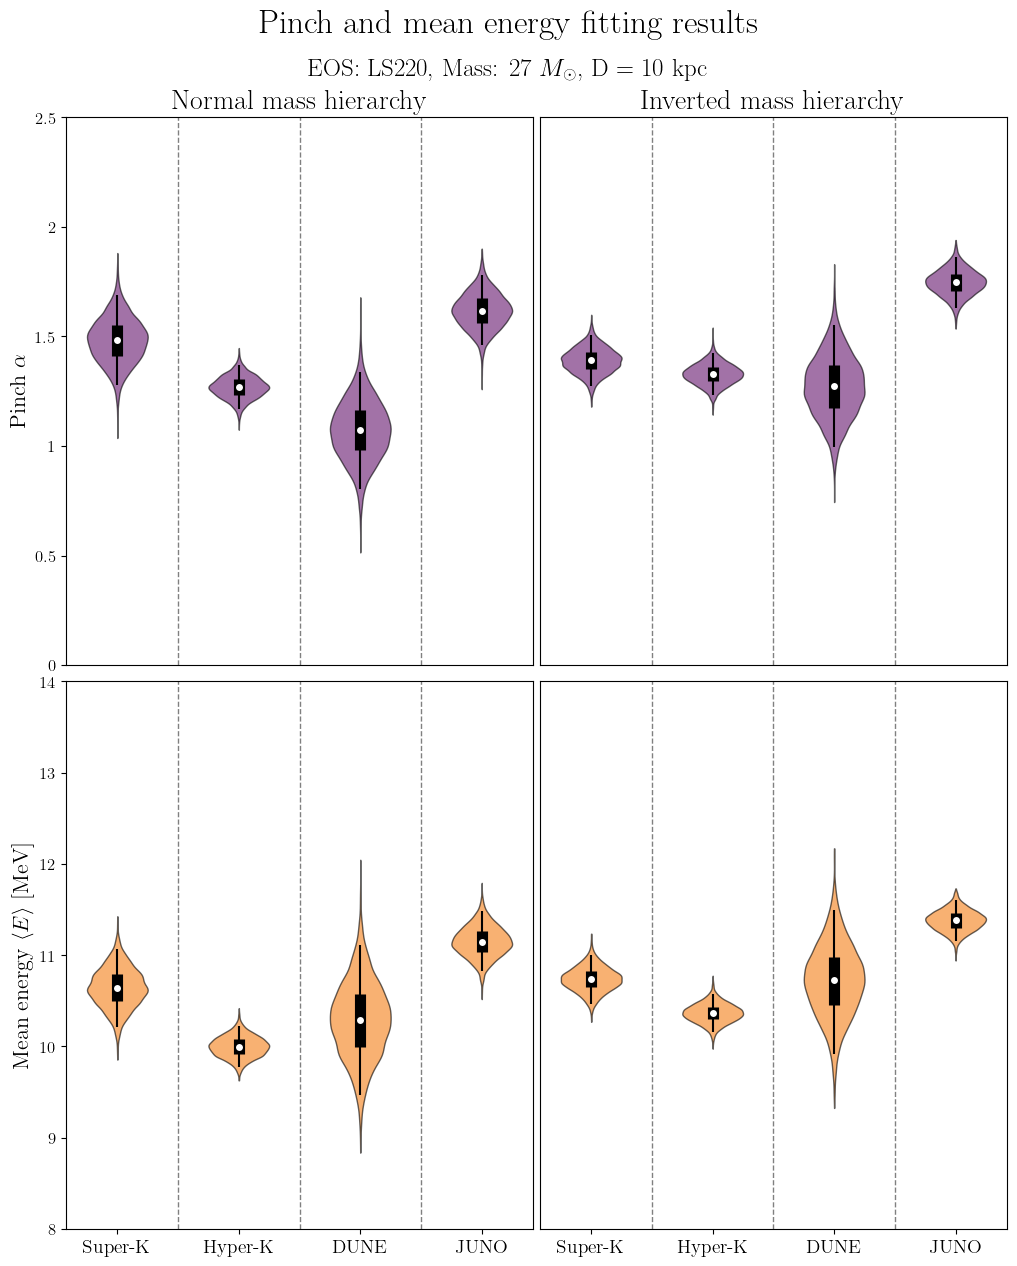

In [38]:
fig, axs = plt.subplots(2, 2, figsize=(10,12))
plt.subplots_adjust(wspace=0.1)
ax = axs.flatten()

vpt = ax[0].violinplot(samples_alpha_NH, positions = [0,1,2,3], showextrema = False)
ax[0].vlines([0,1,2,3], np.percentile(samples_alpha_NH, 25, axis = 1),
           np.percentile(samples_alpha_NH, 75, axis = 1), lw = 8, color = 'black')
ax[0].vlines([0,1,2,3], np.percentile(samples_alpha_NH, 2.5, axis = 1),
           np.percentile(samples_alpha_NH, 97.5, axis = 1), lw = 1.5, color = 'black')
ax[0].scatter([0,1,2,3], np.median(samples_alpha_NH, axis = 1), edgecolor = 'black',
             facecolor = 'white', zorder = 4)
ax[0].set_xticks([])
ax[0].set_ylabel(r'Pinch $\alpha$', fontsize = 16)
ax[0].set_yticks([0,0.5,1,1.5,2,2.5])
ax[0].set_yticklabels([0,0.5,1,1.5,2,2.5], fontsize = 12)
ax[0].axvline(0.5, ls = '--', lw = 1, color = 'grey')
ax[0].axvline(1.5, ls = '--', lw = 1, color = 'grey')
ax[0].axvline(2.5, ls = '--', lw = 1, color = 'grey')
ax[0].set_title('Normal mass hierarchy', fontsize = 20)

vpt2 = ax[1].violinplot(samples_alpha_IH, positions = [0,1,2,3], showextrema = False)
ax[1].vlines([0,1,2,3], np.percentile(samples_alpha_IH, 25, axis = 1),
           np.percentile(samples_alpha_IH, 75, axis = 1), lw = 8, color = 'black')
ax[1].vlines([0,1,2,3], np.percentile(samples_alpha_IH, 2.5, axis = 1),
           np.percentile(samples_alpha_IH, 97.5, axis = 1), lw = 1.5, color = 'black')
ax[1].scatter([0,1,2,3], np.median(samples_alpha_IH, axis = 1), edgecolor = 'black',
             facecolor = 'white', zorder = 4)
ax[1].set_xticks([])
ax[1].axvline(0.5, ls = '--', lw = 1, color = 'grey')
ax[1].axvline(1.5, ls = '--', lw = 1, color = 'grey')
ax[1].axvline(2.5, ls = '--', lw = 1, color = 'grey')
ax[1].set_ylim(0, 2.5)
ax[1].set_yticks([])
ax[1].set_title('Inverted mass hierarchy', fontsize = 20)

vpt3 = ax[2].violinplot(samples_E_mean_NH, positions = [0,1,2,3], showextrema = False)
ax[2].vlines([0,1,2,3], np.percentile(samples_E_mean_NH, 25, axis = 1),
           np.percentile(samples_E_mean_NH, 75, axis = 1), lw = 8, color = 'black')
ax[2].vlines([0,1,2,3], np.percentile(samples_E_mean_NH, 2.5, axis = 1),
           np.percentile(samples_E_mean_NH, 97.5, axis = 1), lw = 1.5, color = 'black')
ax[2].scatter([0,1,2,3], np.median(samples_E_mean_NH, axis = 1), edgecolor = 'black',
             facecolor = 'white', zorder = 4)
ax[2].set_xticks([0,1,2,3])
ax[2].set_xticklabels(['Super-K', 'Hyper-K', 'DUNE', 'JUNO'], fontsize = 14)
ax[2].set_ylabel(r'Mean energy $\left \langle E \right \rangle$ [MeV]', fontsize = 16)
ax[2].set_yticks([8,9,10,11,12,13,14])
ax[2].set_yticklabels([8,9,10,11,12,13,14], fontsize = 12)
ax[2].axvline(0.5, ls = '--', lw = 1, color = 'grey')
ax[2].axvline(1.5, ls = '--', lw = 1, color = 'grey')
ax[2].axvline(2.5, ls = '--', lw = 1, color = 'grey')

vpt4 = ax[3].violinplot(samples_E_mean_IH, positions = [0,1,2,3], showextrema = False)
ax[3].vlines([0,1,2,3], np.percentile(samples_E_mean_IH, 25, axis = 1),
           np.percentile(samples_E_mean_IH, 75, axis = 1), lw = 8, color = 'black')
ax[3].vlines([0,1,2,3], np.percentile(samples_E_mean_IH, 2.5, axis = 1),
           np.percentile(samples_E_mean_IH, 97.5, axis = 1), lw = 1.5, color = 'black')
ax[3].scatter([0,1,2,3], np.median(samples_E_mean_IH, axis = 1), edgecolor = 'black',
             facecolor = 'white', zorder = 4)
ax[3].set_xticks([0,1,2,3])
ax[3].set_xticklabels(['Super-K', 'Hyper-K', 'DUNE', 'JUNO'], fontsize = 14)
ax[3].set_ylim(8, 14)
ax[3].set_yticks([])
ax[3].axvline(0.5, ls = '--', lw = 1, color = 'grey')
ax[3].axvline(1.5, ls = '--', lw = 1, color = 'grey')
ax[3].axvline(2.5, ls = '--', lw = 1, color = 'grey')

for pc in vpt['bodies']:
    pc.set_facecolor(sns.color_palette('inferno')[1])
    pc.set_edgecolor('black')
    pc.set_alpha(0.6)
    
for pc in vpt2['bodies']:
    pc.set_facecolor(sns.color_palette('inferno')[1])
    pc.set_edgecolor('black')
    pc.set_alpha(0.6)
    
for pc in vpt3['bodies']:
    pc.set_facecolor(sns.color_palette('inferno')[4])
    pc.set_edgecolor('black')
    pc.set_alpha(0.6)
    
for pc in vpt4['bodies']:
    pc.set_facecolor(sns.color_palette('inferno')[4])
    pc.set_edgecolor('black')
    pc.set_alpha(0.6)
    
fig.suptitle('Pinch and mean energy fitting results',
             fontsize = 24, y = 1.04)
fig.text(0.5, 0.985, 'EOS: LS220, Mass: 27 $M_\odot$, D = 10 kpc', fontsize = 18, ha = 'center')
plt.tight_layout(pad = 0.1)
fig.patch.set_alpha(0.3)
for ax in fig.axes:
    ax.patch.set_alpha(0.7)
# plt.savefig('Plots/Pinch_E_mean_fitting_results_Least-Squares_10_kpc_delta=0_01sqrtE.png',
#             dpi = 300, bbox_inches = 'tight')
# plt.savefig('Plots/Pinch_E_mean_fitting_results_Least-Squares_10_kpc_delta=0_01sqrtE.svg',
#             dpi = 300, bbox_inches = 'tight')
plt.show()

In [321]:
E = np.linspace(1, 100, 1000000) # Neutrino detection energy

In [339]:
def fitting_spectra(x, alpha, E_mean):
    """
    Shape of the detection spectrum
    """
################################ SUPER-K
    channels = ['ibd','nue_e','nuebar_e','nue_O16','nuebar_O16','numu_e',
                    'numubar_e','nc_nue_O16','nc_nuebar_O16']
    xs_data = cs.snowglobes(channels)

    # All these cross sections are in units of 10⁻³⁸ cm²/MeV
    cs_ibd = interp1d(1e3*(10**(xs_data[0][0])), xs_data[0][4]/1e3, fill_value='extrapolate')
    cs_nue_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[1][1]/1e3, fill_value='extrapolate')
    cs_nuebar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[2][4]/1e3, fill_value='extrapolate')
    cs_nue_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[3][1]/1e3, fill_value='extrapolate')
    cs_nuebar_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[4][1]/1e3, fill_value='extrapolate')
    cs_nux_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[5][2]/1e3, fill_value='extrapolate')
    cs_nuxbar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[6][5]/1e3, fill_value='extrapolate')
    cs_nc_nue_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[7][1]/1e3, fill_value='extrapolate')
    cs_nc_nue_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[7][1]/1e3, fill_value='extrapolate')
    cs_nc_nuebar_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[8][4]/1e3, fill_value='extrapolate')
    # Total cross section
    total_cross = cs_nue_e(x)*x*1e-38 + cs_nue_O16(x)*x*1e-38 + cs_nuebar_e(x)*x*1e-38 + cs_ibd(x)*x*1e-38 + cs_nuebar_O16(x)*x*1e-38 + cs_nux_e(x)*x*1e-38 + cs_nuxbar_e(x)*x*1e-38 + cs_nc_nuebar_O16(x)*x*1e-38
    # Detector efficiency
    eff = np.where(x<4.5,0,0.9) #efficiency_sigmoid(x, 0.918, 1.2127, 3)
    spectrum = fitting.spectrum_shape(x, alpha, E_mean)
    all = spectrum*total_cross*eff
    # Normalization
    A = simps(all, x)
    return all/A

In [340]:
fits_SK_NH = []

spec_nubar_e = dtc.detection_spectra(E, 'LS220-27.0', 'nubar_e', 'super-k', distance = 0.5, get_directions = False)
spec_nu_e = dtc.detection_spectra(E, 'LS220-27.0', 'nu_e', 'super-k', distance = 0.5, get_directions = False)
spec_nu_x = dtc.detection_spectra(E, 'LS220-27.0', 'nu_x', 'super-k', distance = 0.5, get_directions = False)

total = spec_nubar_e + spec_nu_e + spec_nu_x
for k in range(5):
    fitted_pair_SK = []

    samples = choices(E, total, k = int(simps(total, E)))
    for i in tqdm(range(400)):
        noised_samples = []
        delta = 0.005*i
        for j in range(len(samples)):
            new = np.random.normal(samples[j], delta*np.sqrt(samples[j]))
            while new < 0:
                new = np.random.normal(samples[j], delta*np.sqrt(samples[j]))
            noised_samples.append(new)

        y, bins = np.histogram(noised_samples, bins = [i for i in range(101)], density = True)
        x = (bins[:-1] + bins[1:])/2

        c, cov = curve_fit(fitting_spectra, x, y, bounds = ([0,0],[5, 20]))

        fitted_pair_SK.append([c[0], c[1]])
    fits_SK_NH.append(fitted_pair_SK)
    
fits_SK_NH = np.array(fits_SK_NH)

100%|██████████| 400/400 [7:38:32<00:00, 68.78s/it]   


In [341]:
spec_nubar_e = dtc.detection_spectra(E, 'LS220-27.0', 'nubar_e', 'super-k', distance = 0.5,
                                     hierarchy = 'inverted', get_directions = False)
spec_nu_e = dtc.detection_spectra(E, 'LS220-27.0', 'nu_e', 'super-k', distance = 0.5,
                                  hierarchy = 'inverted', get_directions = False)
spec_nu_x = dtc.detection_spectra(E, 'LS220-27.0', 'nu_x', 'super-k', distance = 0.5,
                                  hierarchy = 'inverted', get_directions = False)

total = spec_nubar_e + spec_nu_e + spec_nu_x

fits_SK_IH = []
for k in range(5):
    fitted_pair_ih_SK = []
    
    samples = choices(E, total, k = int(simps(total, E)))
    for i in tqdm(range(400)):
        noised_samples = []
        delta = 0.005*i
        for j in range(len(samples)):
            new = np.random.normal(samples[j], delta*np.sqrt(samples[j]))
            while new < 0:
                new = np.random.normal(samples[j], delta*np.sqrt(samples[j]))
            noised_samples.append(new)

        y, bins = np.histogram(noised_samples, bins = [i for i in range(101)], density = True)
        x = (bins[:-1] + bins[1:])/2

        c, cov = curve_fit(fitting_spectra, x, y, bounds = ([0,0],[5, 20]))

        fitted_pair_ih_SK.append([c[0], c[1]])
    fits_SK_IH.append(fitted_pair_ih_SK)
    
fits_SK_IH = np.array(fits_SK_IH)

  0%|          | 1/400 [03:25<22:46:16, 205.45s/it]


KeyboardInterrupt: 

In [332]:
deltas = np.array([0.005*i for i in range(400)])

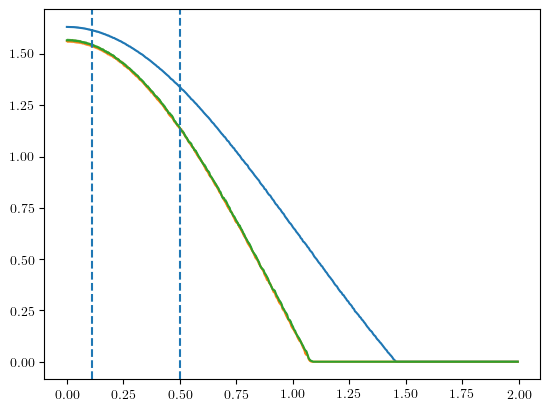

In [342]:
plt.plot(deltas, np.mean(fits_SK_NH, axis = 0)[:,0])
plt.fill_between(deltas, np.mean(fits_SK_NH, axis = 0)[:,0]-np.std(fits_SK_NH, axis = 0)[:,0],
                np.mean(fits_SK_NH, axis = 0)[:,0]+np.std(fits_SK_NH, axis = 0)[:,0],
                alpha = 0.7)
# plt.plot(deltas, fitted_pair_ih[:,0])

plt.plot(deltas, np.mean(fits_DUNE_IH, axis = 0)[:,0])
plt.fill_between(deltas, np.mean(fits_DUNE_IH, axis = 0)[:,0]-np.std(fits_DUNE_IH, axis = 0)[:,0],
                np.mean(fits_DUNE_IH, axis = 0)[:,0]+np.std(fits_DUNE_IH, axis = 0)[:,0],
                alpha = 0.7)
plt.plot(deltas, np.mean(fits_DUNE_NH, axis = 0)[:,0])
plt.fill_between(deltas, np.mean(fits_DUNE_NH, axis = 0)[:,0]-np.std(fits_DUNE_NH, axis = 0)[:,0],
                np.mean(fits_DUNE_NH, axis = 0)[:,0]+np.std(fits_DUNE_NH, axis = 0)[:,0],
                alpha = 0.7)
plt.axvline(0.5, ls = '--')
plt.axvline(0.11, ls = '--')
plt.show()

In [284]:
spec = dtc.detection_spectra(E, 'LS220-27.0', 'nubar_e', 'super-k', distance = 0.5)

In [285]:
samples = choices(E, np.sum(spec, axis = 0), k = int(simps(np.sum(spec, axis = 0), E)))

In [ ]:
y, bins = np.histogram(samples, bins = [7*i for i in range(16)], density = True)

In [ ]:
x = (bins[:-1] + bins[1:])/2

In [164]:
noised_samples_res2 = []
noised_samples_res15 = []
noised_samples_res1 = []
noised_samples_res05 = []

for i in tqdm(range(len(samples))):
    new = np.random.normal(samples[i], 2*np.sqrt(samples[i]))
    while new < 0:
        new = np.random.normal(samples[i], 2*np.sqrt(samples[i]))
    noised_samples_res2.append(new)
    
    new = np.random.normal(samples[i], 1.5*np.sqrt(samples[i]))
    while new < 0:
        new = np.random.normal(samples[i], 1.5*np.sqrt(samples[i]))
    noised_samples_res15.append(new)
    
    new = np.random.normal(samples[i], 1*np.sqrt(samples[i]))
    while new < 0:
        new = np.random.normal(samples[i], 1*np.sqrt(samples[i]))
    noised_samples_res1.append(new)
    
    new = np.random.normal(samples[i], 0.5*np.sqrt(samples[i]))
    while new < 0:
        new = np.random.normal(samples[i], 0.5*np.sqrt(samples[i]))
    noised_samples_res05.append(new)

100%|██████████| 2282592/2282592 [00:39<00:00, 57617.45it/s]


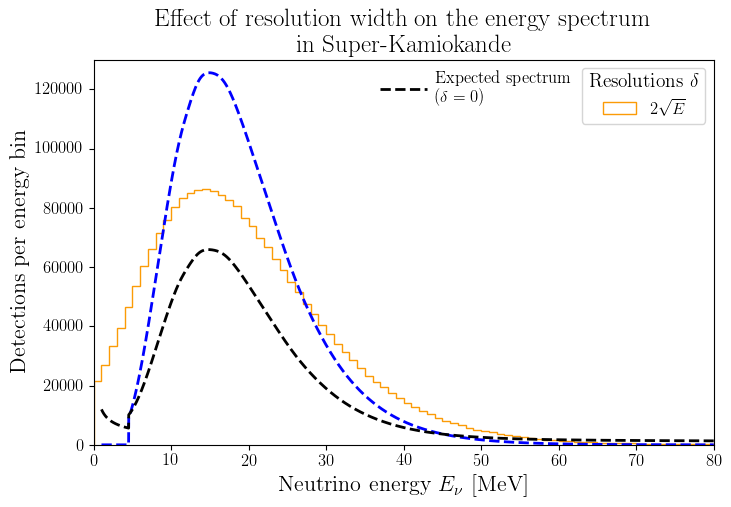

In [186]:
fig, ax = plt.subplots(figsize = (8,5))
plt.plot(E, np.sum(spec, axis = 0), color = 'blue', ls = '--', zorder = 10, lw = 2)
# plt.plot(E, np.sum(spec, axis = 0)*st.norm.pdf(E, E, 2*np.sqrt(E)), color = 'black', ls = '--', zorder = 10, lw = 2)
# plt.hist(samples, bins = [i for i in range(101)], edgecolor = 'black', color = 'blue',
#         alpha = 0.3)
# plt.hist(noised_samples_res05, bins = [i for i in range(101)], histtype = 'step',
#         color = sns.color_palette('inferno', 8)[0], label = r'$0.5 \sqrt{E}$', zorder = 0)
# plt.hist(noised_samples_res1, bins = [i for i in range(101)], histtype = 'step',
#         color = sns.color_palette('inferno', 8)[2], label = r'$1.0 \sqrt{E}$', zorder = 0)
# plt.hist(noised_samples_res15, bins = [i for i in range(101)], histtype = 'step',
#         color = sns.color_palette('inferno', 8)[4], label = r'$1.5 \sqrt{E}$', zorder = 0)
plt.hist(noised_samples_res2, bins = [i for i in range(101)], histtype = 'step',
        color = sns.color_palette('inferno', 8)[6], label = r'$2 \sqrt{E}$', zorder = 0)
plt.xlim(0, 80)
plt.xlabel(r'Neutrino energy $E_\nu$ [MeV]', fontsize = 16)
plt.xticks(fontsize = 12)
plt.ylim(0, 130000)
plt.ylabel('Detections per energy bin', fontsize = 16)
plt.yticks(fontsize = 12)
lgd = plt.legend(title = r'Resolutions $\delta$', loc = 'upper right', fontsize = 12)
lgd.get_title().set_fontsize(14)
plt.hlines(120000, 37, 43, ls = '--', lw = 2, color = 'black')
plt.text(44, 120000, 'Expected spectrum' '\n' r'($\delta = 0$)', va = 'center', fontsize = 12)
plt.title('Effect of resolution width on the energy spectrum' '\n' 'in Super-Kamiokande',
          fontsize = 18, pad = 5)
fig.patch.set_alpha(0.3)
for ax in fig.axes:
    ax.patch.set_alpha(0.7)
    
# plt.savefig('Plots/effect_resolution.png', dpi = 300, bbox_inches = 'tight')
# plt.savefig('Plots/effect_resolution.svg', dpi = 300, bbox_inches = 'tight')
plt.show()

---

In [17]:
prior_params = np.array([[0,5],[5,20]], dtype=np.float64)

In [18]:
post = fitting.rejABC(f, x, y, prior_params, 7e-3, 10000)

100.00% of samples sorted. Elapsed time (h:m:s): 0:05:44.627480

In [18]:
n_bins = 40

repeat = 5

for l in range(repeat):
    p = post[np.where(post[:,-1] == np.min(post[:,-1]))[0][0]][:-1]
    p_std = np.std(post[:,:-1], axis=0) # Parameter error as standard deviation of posterior
    
    hist = np.zeros((len(p), n_bins))
    bins = np.zeros((len(p), n_bins+1))
    
    # Define new priors
    for k in range(len(hist)):
        hist[k], bins[k] = np.histogram(post[:, k], n_bins, density=True)
    eps = np.median(post[:,-1])
    post = fitting.smcABC(f, x, y, hist, bins, n_bins, p_std, eps, 50000, 10000)

2.00% of samples sorted. Elapsed time (h:m:s): 0:00:37.8738708

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/pedroc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-0a20e4032df8>", line 16, in <module>
    post = fitting.smcABC(f, x, y, hist, bins, n_bins, p_std, eps, 50000, 10000)
  File "/home/pedroc/Documentos/pedro/Mestradives/Simulations/Supernova-neutrinos/fitting.py", line 216, in smcABC
    d = np.sqrt(np.sum(((y-model(x, *p[:-1])))**2))/len(x)
  File "/home/pedroc/Documentos/pedro/Mestradives/Simulations/Supernova-neutrinos/fitting.py", line 32, in fitting_spectra
    xs_data = cs.snowglobes(channels)
  File "/home/pedroc/Documentos/pedro/Mestradives/Simulations/Supernova-neutrinos/cross_sections.py", line 29, in snowglobes
    df = pd.read_csv(folder,delim_whitespace=True,skiprows=[0,1], names=columns)
  File "/home/pedroc/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py", line 610, in read_csv
    r

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/pedroc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-0a20e4032df8>", line 16, in <module>
    post = fitting.smcABC(f, x, y, hist, bins, n_bins, p_std, eps, 50000, 10000)
  File "/home/pedroc/Documentos/pedro/Mestradives/Simulations/Supernova-neutrinos/fitting.py", line 216, in smcABC
    d = np.sqrt(np.sum(((y-model(x, *p[:-1])))**2))/len(x)
  File "/home/pedroc/Documentos/pedro/Mestradives/Simulations/Supernova-neutrinos/fitting.py", line 32, in fitting_spectra
    xs_data = cs.snowglobes(channels)
  File "/home/pedroc/Documentos/pedro/Mestradives/Simulations/Supernova-neutrinos/cross_sections.py", line 29, in snowglobes
    df = pd.read_csv(folder,delim_whitespace=True,skiprows=[0,1], names=columns)
  File "/home/pedroc/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py", line 610, in read_csv
    r

TypeError: object of type 'NoneType' has no len()

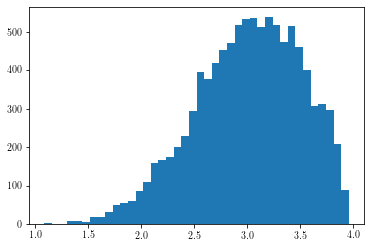

In [23]:
plt.hist(post[:,0], bins = 40)
plt.show()

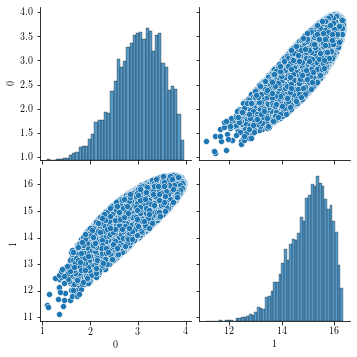

In [24]:
sns.pairplot(pd.DataFrame(post[:,:-1]))

100%|██████████| 2000/2000 [00:51<00:00, 38.57it/s]


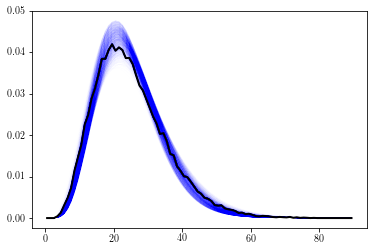

In [25]:
plt.plot(x, y, lw = 2, color = 'black')
for i in tqdm(range(int(len(post[:,0])/5))):
    plt.plot(x, f(x, post[i,0], post[i,1], 'super-k'), lw = 1,
             color = 'blue', alpha = 0.002)

plt.show()

In [103]:
pd.DataFrame(post).rename(columns={0: 'Alpha', 1: 'Mean energy', 2: 'Error'}).to_csv(f'Results/Alpha_and_E_mean_supernova_energy_per_flavor_5e52_distance_{distance}_detector_{detector}.csv')

## Loop with different distances

### ABC-SMC

In [16]:
prior_params = np.array([[0,10],[0,20]], dtype=np.float64)
f = fitting.fitting_spectra

n_bins = 40
repeat = 5

for i in tqdm(range(40)):
    # print(f'\r Simulation {i+1} of 50', end="\n")
    distance = 5*(i+1) # kpc
    ref = dtc.energy_sampler(E, 5e52, resolution, 'proportional', detector, 'normal', distance,
                             phi = 0, print_expected = False)
    if len(ref['Total']) < 20:
        print(f'Muitos poucos neutrinos detectados. Distância: {distance} kpc')
        break
    y, bins = np.histogram(ref['Total'], bins = [i for i in range(91)], density = True)
    x = (bins[:-1] + bins[1:])/2
    post = fitting.rejABC(f, x, y, prior_params, 7e-3, 10000, print_progress = False)

    for l in range(repeat):
        p = post[np.where(post[:,-1] == np.min(post[:,-1]))[0][0]][:-1]
        p_std = np.std(post[:,:-1], axis=0) # Parameter error as standard deviation of posterior

        hist = np.zeros((len(p), n_bins))
        bins = np.zeros((len(p), n_bins+1))

        # Define new priors
        for k in range(len(hist)):
            hist[k], bins[k] = np.histogram(post[:, k], n_bins, density=True)
        eps = np.median(post[:,-1])
        post = fitting.smcABC(f, x, y, hist, bins, n_bins, p_std, eps, 50000, 10000, print_progress = False)
        
    pd.DataFrame(post).rename(columns={0: 'Alpha', 1: 'Mean energy', 2: 'Error'}).to_csv(f"Results/Alpha_and_E_mean_supernova_energy_per_flavor_5e52_distance_{distance}_detector_{detector}_total_detections_{len(ref['Total'])}.csv")

 92%|█████████▎| 37/40 [38:43:54<3:08:25, 3768.50s/it] 

Muitos poucos neutrinos detectados. Distância: 190 kpc


In [41]:
results = os.listdir('Results')

100%|██████████| 156/156 [00:06<00:00, 24.27it/s]


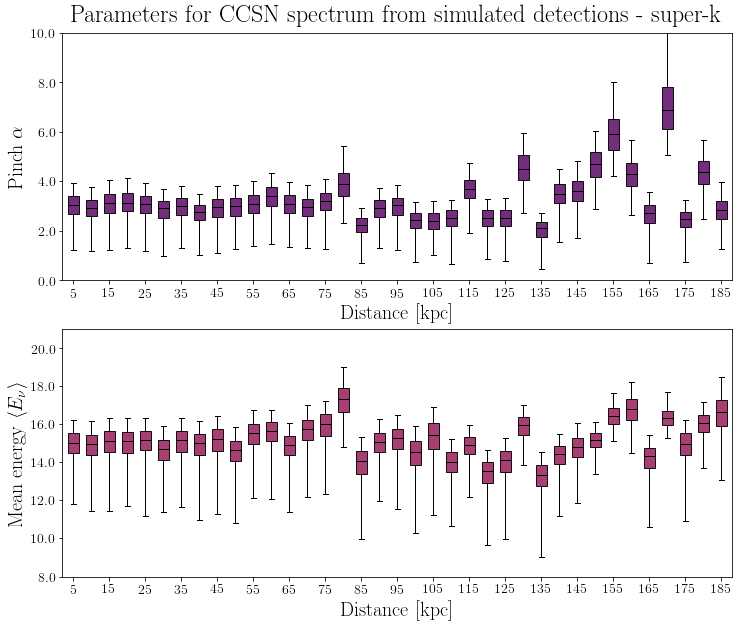

In [10]:
fig = plt.figure(figsize=(12,10))
ax0 = fig.add_subplot(211)
# ax1 = fig.add_subplot(212, polar=True)
ax1 = fig.add_subplot(212)
for i in tqdm(range(len(results))):
    d = results[i].split('_')[10]
    if results[i].split('_')[12] == detector:
        df = pd.read_csv(f'Results/{results[i]}')
    else:
        continue
    # df = pd.read_csv(f'Results/{results[i]}')
    ax0.boxplot(df['Alpha'], positions = [int(d)], widths = 3, patch_artist = True,
                          boxprops = {'facecolor': sns.color_palette('inferno')[1], 
                                      'edgecolor': 'black', 'alpha': 0.9},
                          whis = (0, 100), medianprops = {'color': 'black',
                                                         'linewidth': 1})
    # for pc in violin['bodies']:
    #     pc.set_facecolor('#D43F3A')
    #     pc.set_edgecolor('black')
    #     pc.set_alpha(0.8)

    ax1.boxplot(df['Mean energy'], positions = [int(d)], widths = 3, patch_artist = True,
                          boxprops = {'facecolor': sns.color_palette('inferno')[2],
                                      'edgecolor': 'black', 'alpha': 0.9},
                          whis = (0, 100), medianprops = {'color':'black', 'linewidth': 1})
    # violin = ax1.violinplot(df['Mean energy'], positions = [d], widths = 0.1, showextrema = False)
    # for pc in violin['bodies']:
    #     pc.set_facecolor('white')
    #     pc.set_edgecolor('black')
    #     pc.set_alpha(0.8)

ax0.set_xlim(2, 188)
ax0.set_ylim(0, 10)
ax0.set_xlabel('Distance [kpc]', fontsize = 20)
ax0.set_ylabel(r'Pinch $\alpha$', fontsize = 20)
ax0.set_xticks([5+10*i for i in range(19)])
ax0.set_xticklabels(ax0.get_xticks(), fontsize = 14)
ax0.set_yticklabels(ax0.get_yticks(), fontsize = 14)

ax1.set_xlim(2, 188)
ax1.set_ylim(8, 21)
ax1.set_xlabel('Distance [kpc]', fontsize = 20)
ax1.set_ylabel(r'Mean energy $\left \langle E_{\nu} \right \rangle$', fontsize = 20)
ax1.set_xticks([5+10*i for i in range(19)])
ax1.set_xticklabels(ax1.get_xticks(), fontsize = 14)
ax1.set_yticklabels(ax1.get_yticks(), fontsize = 14)

ax0.set_title(f'Parameters for CCSN spectrum from simulated detections - {detector}',
              fontsize = 24, pad = 10)

im = mpimg.imread(r"/home/pedroc/Documentos/pedro/Mestradives/Rodrigo_faro_transparente.png")
# im2 = mpimg.imread(r"/home/pedroc/Documentos/pedro/Mestradives/shrek.png")
im3 = mpimg.imread(r"/home/pedroc/Documentos/pedro/Mestradives/Explosion.png")
im4 = mpimg.imread(r"/home/pedroc/Documentos/pedro/Mestradives/ben10.png")
im5 = mpimg.imread(r"/home/pedroc/Documentos/pedro/Mestradives/duck.png")

# ax1.patch.set_color('indianred')
# ax1.set_title('\n''RECEBA', fontsize = 26)
# circle = plt.Circle((0, 0), 4, transform=ax1.transData._b, color="maroon", alpha=0.8)
# ax1.add_artist(circle)
# ax1.set_rlim(23, 8)
# ax1.grid(False)
# ax1.set_yticklabels([])
# plt.tight_layout()
# newax = fig.add_axes([0.14,0.086,0.383,0.383], anchor='NE', zorder=-1)
# newax.imshow(im)
# newax.axis('off')

# newax = fig.add_axes([0.42,0.25,0.07,0.07], anchor='NE', zorder=1)
# newax.imshow(im2)
# newax.axis('off')

# newax = fig.add_axes([0.35,0.168,0.3,0.3], anchor='NE', zorder=-1)
# newax.imshow(im3)
# newax.axis('off')
# newax = fig.add_axes([0.65,0.53,0.2,0.2], anchor='NE', zorder=-1)
# newax.imshow(im4)
# newax.axis('off')
# newax = fig.add_axes([0.1,0.528,0.1,0.1], anchor='NE', zorder=-1)
# newax.imshow(im5)
# newax.axis('off')
fig.patch.set_alpha(1)
for ax in fig.axes:
    ax.patch.set_alpha(1)
# plt.savefig(f'Plots/Results_alpha_E_mean_distances_{detector}.png',
#             dpi = 300, bbox_inches = 'tight')
plt.show()

### Least-squares

In [394]:
p0 = (2, 15)

results = {}

for i in tqdm(range(40)):
    alphas = []
    alphas_err = []
    E_means = []
    E_means_err = []
    N_Ts = []
    # print(f'\r Simulation {i+1} of 50', end="\n")
    distance = 5*(i+1) # kpc

    for j in range(20):
        ref = dtc.energy_sampler(E, 5e52, resolution, 'proportional', detector, 'normal', distance,
                                 phi = 0, print_expected = False)
        n = 0
        if len(ref['Total']) < 20:
            n += 1
            print(f'Muitos poucos neutrinos detectados. Distância: {distance} kpc')
            # if n > 10:
            #     break
            # else:
            continue
        y, bins = np.histogram(ref['Total'], bins = [i for i in range(91)], density = True)
        x = (bins[:-1] + bins[1:])/2
        try:
            c, cov = curve_fit(fitting_spectra, x, y, p0, bounds = ([0,0], [np.inf,np.inf]))
            if c[0] == p0[0] or c[1] == p0[1]:
                continue
            alphas.append(c[0])
            alphas_err.append(cov[0,0]**0.5)
            E_means.append(c[1])
            E_means_err.append(cov[1,1]**0.5)
            N_Ts.append(len(ref['Total']))
        except RuntimeError:
            print(f'Total detections: {len(ref["Total"])}')
            continue

    results[f"Distance {distance} - alpha"] = np.array(alphas)
    results[f"Distance {distance} - alpha_err"] = np.array(alphas_err)
    results[f"Distance {distance} - E_mean"] = np.array(E_means)
    results[f"Distance {distance} - E_mean_err"] = np.array(E_means_err)
    results[f"Distance {distance} - N_T"] = np.array(N_Ts)

 80%|████████  | 32/40 [46:40<12:05, 90.67s/it]

Muitos poucos neutrinos detectados. Distância: 165 kpc
Muitos poucos neutrinos detectados. Distância: 165 kpc


 82%|████████▎ | 33/40 [48:09<10:31, 90.22s/it]

Muitos poucos neutrinos detectados. Distância: 165 kpc
Muitos poucos neutrinos detectados. Distância: 170 kpc
Muitos poucos neutrinos detectados. Distância: 170 kpc
Muitos poucos neutrinos detectados. Distância: 170 kpc


 85%|████████▌ | 34/40 [49:38<08:58, 89.76s/it]

Muitos poucos neutrinos detectados. Distância: 175 kpc


 88%|████████▊ | 35/40 [51:09<07:30, 90.12s/it]

Muitos poucos neutrinos detectados. Distância: 180 kpc
Muitos poucos neutrinos detectados. Distância: 180 kpc
Muitos poucos neutrinos detectados. Distância: 180 kpc
Muitos poucos neutrinos detectados. Distância: 180 kpc
Muitos poucos neutrinos detectados. Distância: 180 kpc


 90%|█████████ | 36/40 [52:36<05:56, 89.13s/it]

Muitos poucos neutrinos detectados. Distância: 180 kpc
Muitos poucos neutrinos detectados. Distância: 185 kpc
Muitos poucos neutrinos detectados. Distância: 185 kpc
Muitos poucos neutrinos detectados. Distância: 185 kpc
Muitos poucos neutrinos detectados. Distância: 185 kpc
Muitos poucos neutrinos detectados. Distância: 185 kpc
Muitos poucos neutrinos detectados. Distância: 185 kpc
Muitos poucos neutrinos detectados. Distância: 185 kpc
Muitos poucos neutrinos detectados. Distância: 185 kpc
Muitos poucos neutrinos detectados. Distância: 185 kpc
Muitos poucos neutrinos detectados. Distância: 185 kpc


 92%|█████████▎| 37/40 [54:00<04:22, 87.66s/it]

Muitos poucos neutrinos detectados. Distância: 185 kpc
Muitos poucos neutrinos detectados. Distância: 190 kpc
Muitos poucos neutrinos detectados. Distância: 190 kpc
Muitos poucos neutrinos detectados. Distância: 190 kpc
Muitos poucos neutrinos detectados. Distância: 190 kpc
Muitos poucos neutrinos detectados. Distância: 190 kpc
Muitos poucos neutrinos detectados. Distância: 190 kpc


 95%|█████████▌| 38/40 [55:28<02:55, 87.90s/it]

Muitos poucos neutrinos detectados. Distância: 195 kpc
Muitos poucos neutrinos detectados. Distância: 195 kpc
Muitos poucos neutrinos detectados. Distância: 195 kpc
Muitos poucos neutrinos detectados. Distância: 195 kpc
Muitos poucos neutrinos detectados. Distância: 195 kpc
Muitos poucos neutrinos detectados. Distância: 195 kpc
Muitos poucos neutrinos detectados. Distância: 195 kpc
Muitos poucos neutrinos detectados. Distância: 195 kpc
Muitos poucos neutrinos detectados. Distância: 195 kpc
Muitos poucos neutrinos detectados. Distância: 195 kpc
Muitos poucos neutrinos detectados. Distância: 195 kpc
Muitos poucos neutrinos detectados. Distância: 195 kpc
Muitos poucos neutrinos detectados. Distância: 195 kpc
Muitos poucos neutrinos detectados. Distância: 195 kpc
Muitos poucos neutrinos detectados. Distância: 195 kpc


 98%|█████████▊| 39/40 [56:48<01:25, 85.43s/it]

Muitos poucos neutrinos detectados. Distância: 200 kpc
Muitos poucos neutrinos detectados. Distância: 200 kpc
Muitos poucos neutrinos detectados. Distância: 200 kpc
Muitos poucos neutrinos detectados. Distância: 200 kpc
Muitos poucos neutrinos detectados. Distância: 200 kpc
Muitos poucos neutrinos detectados. Distância: 200 kpc
Muitos poucos neutrinos detectados. Distância: 200 kpc
Muitos poucos neutrinos detectados. Distância: 200 kpc
Muitos poucos neutrinos detectados. Distância: 200 kpc
Muitos poucos neutrinos detectados. Distância: 200 kpc
Muitos poucos neutrinos detectados. Distância: 200 kpc
Muitos poucos neutrinos detectados. Distância: 200 kpc
Muitos poucos neutrinos detectados. Distância: 200 kpc


100%|██████████| 40/40 [58:13<00:00, 87.33s/it]

Muitos poucos neutrinos detectados. Distância: 200 kpc


In [395]:
results = pd.DataFrame.from_dict(results, orient='index').T

In [396]:
results.head()

,Distance 5 - alpha,Distance 5 - alpha_err,Distance 5 - E_mean,Distance 5 - E_mean_err,Distance 5 - N_T,Distance 10 - alpha,Distance 10 - alpha_err,Distance 10 - E_mean,Distance 10 - E_mean_err,Distance 10 - N_T,...,Distance 195 - alpha,Distance 195 - alpha_err,Distance 195 - E_mean,Distance 195 - E_mean_err,Distance 195 - N_T,Distance 200 - alpha,Distance 200 - alpha_err,Distance 200 - E_mean,Distance 200 - E_mean_err,Distance 200 - N_T
0,2.039509,0.052683,13.795384,0.105327,29294.0,2.031419,0.083237,13.851893,0.167760,7378.0,...,23.109175,6.065585,23.803346,0.824540,20.0,15.439221,2.786556,18.223445,0.530009,22.0
1,2.021577,0.043431,13.869674,0.088071,29539.0,2.134056,0.091646,13.962318,0.177151,7380.0,...,1.369945,1.185544,13.769824,3.409665,38.0,1.397560,1.521859,13.658970,4.269976,22.0
2,1.928233,0.050514,13.646804,0.105605,29297.0,2.056794,0.081304,13.955919,0.163053,7438.0,...,0.606329,0.907528,8.740492,2.890170,29.0,9.752167,3.941057,22.178672,1.788344,20.0
3,2.114628,0.049892,14.042149,0.097898,29615.0,1.920117,0.080401,13.774608,0.170359,7402.0,...,4.252796,1.925028,15.771989,1.911054,22.0,2.710038,1.717338,16.327688,3.011766,23.0
4,2.045109,0.048923,13.909606,0.098348,29629.0,1.932925,0.087917,13.567680,0.182304,7464.0,...,3.783659,1.551580,16.072755,1.814964,25.0,2.239490,1.759758,16.828806,3.899744,22.0


In [397]:
results.to_csv(f"Results/Alpha_and_E_mean_supernova_energy_per_flavor_5e52_distances_detector_{detector}_Least-Squares.csv")

In [257]:
cols_alphas = []
cols_E_means = []
for col in results.columns:
    if 'alpha' in col and 'alpha_err' not in col:
        cols_alphas.append(col)
    if 'E_mean' in col and 'E_mean_err' not in col:
        cols_E_means.append(col)

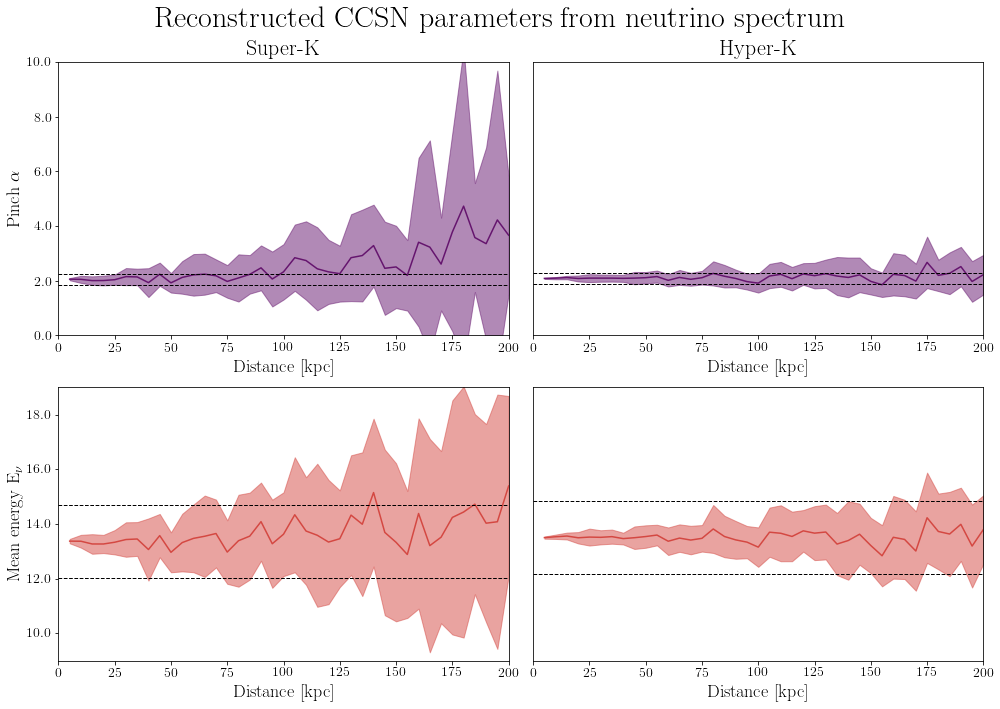

In [481]:
super_k = pd.read_csv("Results/Alpha_and_E_mean_supernova_energy_per_flavor_5e52_distances_detector_super-k_Least-Squares.csv")
hyper_k = pd.read_csv("Results/Alpha_and_E_mean_supernova_energy_per_flavor_5e52_distances_detector_Hyper-k_Least-Squares.csv")

fig, axs = plt.subplots(2, 2, figsize = (14,10))
ax = axs.flatten()
ax[0].plot([5*(i+1) for i in range(40)], np.nanmean(super_k[cols_alphas], axis = 0),
           color = sns.color_palette('inferno')[1])
ax[0].fill_between([5*(i+1) for i in range(40)], np.nanmean(super_k[cols_alphas], axis = 0)-np.nanstd(super_k[cols_alphas], axis = 0),
                np.nanmean(super_k[cols_alphas], axis = 0)+np.nanstd(super_k[cols_alphas], axis = 0),
                   alpha = 0.5, color = sns.color_palette('inferno')[1])
ax[0].axhline(np.nanmean(super_k[cols_alphas], axis = 0)[0]*1.1, ls = '--', color = 'black', lw = 1)
ax[0].axhline(np.nanmean(super_k[cols_alphas], axis = 0)[0]*0.9, ls = '--', color = 'black', lw = 1)

ax[1].plot([5*(i+1) for i in range(40)], np.nanmean(hyper_k[cols_alphas], axis = 0),
           color = sns.color_palette('inferno')[1])
ax[1].fill_between([5*(i+1) for i in range(40)], np.nanmean(hyper_k[cols_alphas], axis = 0)-np.nanstd(hyper_k[cols_alphas], axis = 0),
                np.nanmean(hyper_k[cols_alphas], axis = 0)+np.nanstd(hyper_k[cols_alphas], axis = 0),
                   alpha = 0.5, color = sns.color_palette('inferno')[1])
ax[1].axhline(np.nanmean(hyper_k[cols_alphas], axis = 0)[0]*1.1, ls = '--', color = 'black', lw = 1)
ax[1].axhline(np.nanmean(hyper_k[cols_alphas], axis = 0)[0]*0.9, ls = '--', color = 'black', lw = 1)

ax[2].plot([5*(i+1) for i in range(40)], np.nanmean(super_k[cols_E_means], axis = 0),
           color = sns.color_palette('inferno')[3])
ax[2].fill_between([5*(i+1) for i in range(40)], np.nanmean(super_k[cols_E_means], axis = 0)-np.nanstd(super_k[cols_E_means], axis = 0),
                np.nanmean(super_k[cols_E_means], axis = 0)+np.nanstd(super_k[cols_E_means], axis = 0),
                   alpha = 0.5, color = sns.color_palette('inferno')[3])
ax[2].axhline(np.nanmean(super_k[cols_E_means], axis = 0)[0]*1.1, ls = '--', color = 'black', lw = 1)
ax[2].axhline(np.nanmean(super_k[cols_E_means], axis = 0)[0]*0.9, ls = '--', color = 'black', lw = 1)

ax[3].plot([5*(i+1) for i in range(40)], np.nanmean(hyper_k[cols_E_means], axis = 0),
           color = sns.color_palette('inferno')[3])
ax[3].fill_between([5*(i+1) for i in range(40)], np.nanmean(hyper_k[cols_E_means], axis = 0)-np.nanstd(hyper_k[cols_E_means], axis = 0),
                np.nanmean(hyper_k[cols_E_means], axis = 0)+np.nanstd(hyper_k[cols_E_means], axis = 0),
                   alpha = 0.5, color = sns.color_palette('inferno')[3])
ax[3].axhline(np.nanmean(hyper_k[cols_E_means], axis = 0)[0]*1.1, ls = '--', color = 'black', lw = 1)
ax[3].axhline(np.nanmean(hyper_k[cols_E_means], axis = 0)[0]*0.9, ls = '--', color = 'black', lw = 1)

ax[0].set_ylim(0, 10)
ax[1].set_ylim(0, 10)
ax[2].set_ylim(9, 19)
ax[3].set_ylim(9, 19)
ax[0].set_xlim(0, 200)
ax[1].set_xlim(0, 200)
ax[2].set_xlim(0, 200)
ax[3].set_xlim(0, 200)
ax[0].set_xlabel('Distance [kpc]', fontsize = 18)
ax[1].set_xlabel('Distance [kpc]', fontsize = 18)
ax[2].set_xlabel('Distance [kpc]', fontsize = 18)
ax[3].set_xlabel('Distance [kpc]', fontsize = 18)
ax[0].set_ylabel(r'Pinch $\alpha$', fontsize = 18)
ax[1].set_yticks([])
ax[2].set_ylabel(r'Mean energy $\mathrm{E}_\nu$', fontsize = 18)
ax[3].set_yticks([])
ax[0].set_yticklabels(ax[0].get_yticks(), fontsize = 14)
ax[2].set_yticklabels(ax[2].get_yticks(), fontsize = 14)
ax[0].set_xticklabels(ax[0].get_xticks().astype(int), fontsize = 14)
ax[1].set_xticklabels(ax[1].get_xticks().astype(int), fontsize = 14)
ax[2].set_xticklabels(ax[2].get_xticks().astype(int), fontsize = 14)
ax[3].set_xticklabels(ax[3].get_xticks().astype(int), fontsize = 14)

fig.suptitle('Reconstructed CCSN parameters from neutrino spectrum', fontsize = 30)
ax[0].set_title('Super-K', fontsize = 22)
ax[1].set_title('Hyper-K', fontsize = 22)

plt.tight_layout()
fig.patch.set_alpha(1)

plt.savefig('Plots/Reconstructed_parameters_super-k_and_hyper-k_without_individual_errors.png',
            dpi = 300, bbox_inches = 'tight')
plt.savefig('Plots/Reconstructed_parameters_super-k_and_hyper-k_without_individual_errors.svg',
            dpi = 300, bbox_inches = 'tight')

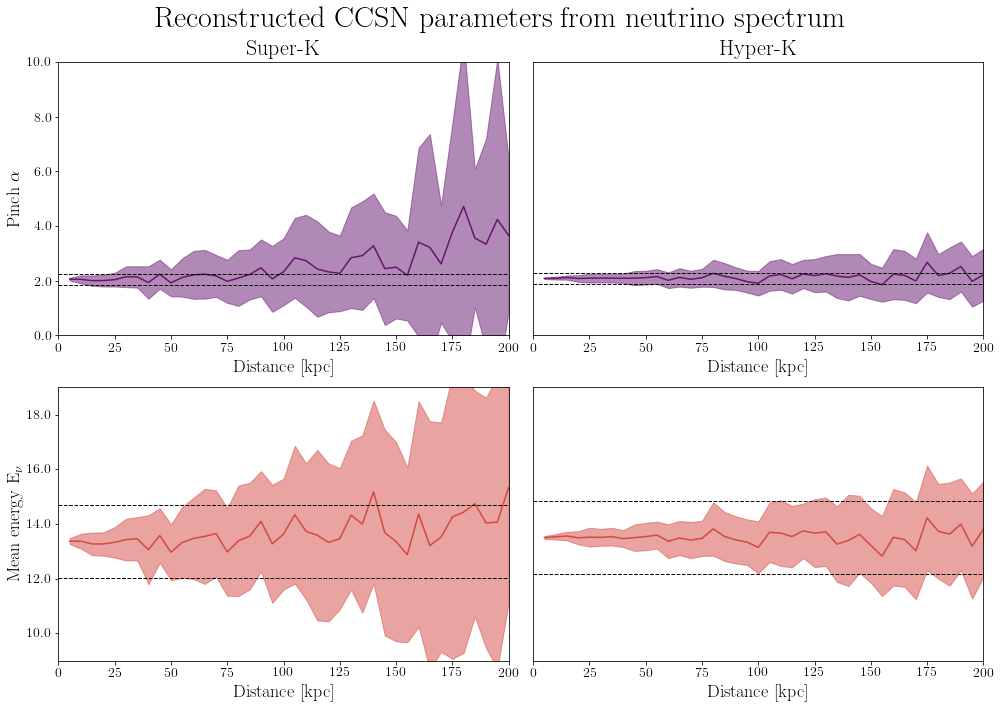

In [498]:
super_k = pd.read_csv("Results/Alpha_and_E_mean_supernova_energy_per_flavor_5e52_distances_detector_super-k_Least-Squares.csv")
hyper_k = pd.read_csv("Results/Alpha_and_E_mean_supernova_energy_per_flavor_5e52_distances_detector_Hyper-k_Least-Squares.csv")

fig, axs = plt.subplots(2, 2, figsize = (14,10))
ax = axs.flatten()
d = []
alphas = []
E_means = []
for i in range(40):
    d.append(5*(i+1))
    samples_a = []
    samples_e = []
    for j in range(len(super_k[f"Distance {int(5*(i+1))} - alpha"])):
        samples_a.append(np.random.normal(super_k[f"Distance {int(5*(i+1))} - alpha"][j], super_k[f"Distance {int(5*(i+1))} - alpha_err"][j], 1000))
    for j in range(len(super_k[f"Distance {int(5*(i+1))} - E_mean"])):
        samples_e.append(np.random.normal(super_k[f"Distance {int(5*(i+1))} - E_mean"][j], super_k[f"Distance {int(5*(i+1))} - E_mean_err"][j], 1000))
    alphas.append(np.array(samples_a).flatten())
    E_means.append(np.array(samples_e).flatten())
    
ax[0].plot(d, np.nanmean(alphas, axis = 1),
           color = sns.color_palette('inferno')[1])
ax[0].fill_between(d, np.nanmean(alphas, axis = 1)-np.nanstd(alphas, axis = 1),
                np.nanmean(alphas, axis = 1)+np.nanstd(alphas, axis = 1),
                   alpha = 0.5, color = sns.color_palette('inferno')[1])
ax[0].axhline(np.nanmean(alphas, axis = 1)[0]*1.1, ls = '--', color = 'black', lw = 1)
ax[0].axhline(np.nanmean(alphas, axis = 1)[0]*0.9, ls = '--', color = 'black', lw = 1)

ax[2].plot(d, np.nanmean(E_means, axis = 1),
           color = sns.color_palette('inferno')[3])
ax[2].fill_between(d, np.nanmean(E_means, axis = 1)-np.nanstd(E_means, axis = 1),
                np.nanmean(E_means, axis = 1)+np.nanstd(E_means, axis = 1),
                   alpha = 0.5, color = sns.color_palette('inferno')[3])
ax[2].axhline(np.nanmean(E_means, axis = 1)[0]*1.1, ls = '--', color = 'black', lw = 1)
ax[2].axhline(np.nanmean(E_means, axis = 1)[0]*0.9, ls = '--', color = 'black', lw = 1)

alphas = []
E_means = []
for i in range(40):
    samples_a = []
    samples_e = []
    for j in range(len(hyper_k[f"Distance {int(5*(i+1))} - alpha"])):
        samples_a.append(np.random.normal(hyper_k[f"Distance {int(5*(i+1))} - alpha"][j], hyper_k[f"Distance {int(5*(i+1))} - alpha_err"][j], 1000))
    for j in range(len(hyper_k[f"Distance {int(5*(i+1))} - E_mean"])):
        samples_e.append(np.random.normal(hyper_k[f"Distance {int(5*(i+1))} - E_mean"][j], hyper_k[f"Distance {int(5*(i+1))} - E_mean_err"][j], 1000))
    alphas.append(np.array(samples_a).flatten())
    E_means.append(np.array(samples_e).flatten())

ax[1].plot(d, np.nanmean(alphas, axis = 1),
           color = sns.color_palette('inferno')[1])
ax[1].fill_between(d, np.nanmean(alphas, axis = 1)-np.nanstd(alphas, axis = 1),
                np.nanmean(alphas, axis = 1)+np.nanstd(alphas, axis = 1),
                   alpha = 0.5, color = sns.color_palette('inferno')[1])
ax[1].axhline(np.nanmean(alphas, axis = 1)[0]*1.1, ls = '--', color = 'black', lw = 1)
ax[1].axhline(np.nanmean(alphas, axis = 1)[0]*0.9, ls = '--', color = 'black', lw = 1)

ax[3].plot(d, np.nanmean(E_means, axis = 1),
           color = sns.color_palette('inferno')[3])
ax[3].fill_between(d, np.nanmean(E_means, axis = 1)-np.nanstd(E_means, axis = 1),
                np.nanmean(E_means, axis = 1)+np.nanstd(E_means, axis = 1),
                   alpha = 0.5, color = sns.color_palette('inferno')[3])
ax[3].axhline(np.nanmean(E_means, axis = 1)[0]*1.1, ls = '--', color = 'black', lw = 1)
ax[3].axhline(np.nanmean(E_means, axis = 1)[0]*0.9, ls = '--', color = 'black', lw = 1)

ax[0].set_ylim(0, 10)
ax[1].set_ylim(0, 10)
ax[2].set_ylim(9, 19)
ax[3].set_ylim(9, 19)
ax[0].set_xlim(0, 200)
ax[1].set_xlim(0, 200)
ax[2].set_xlim(0, 200)
ax[3].set_xlim(0, 200)
ax[0].set_xlabel('Distance [kpc]', fontsize = 18)
ax[1].set_xlabel('Distance [kpc]', fontsize = 18)
ax[2].set_xlabel('Distance [kpc]', fontsize = 18)
ax[3].set_xlabel('Distance [kpc]', fontsize = 18)
ax[0].set_ylabel(r'Pinch $\alpha$', fontsize = 18)
ax[1].set_yticks([])
ax[2].set_ylabel(r'Mean energy $\mathrm{E}_\nu$', fontsize = 18)
ax[3].set_yticks([])
ax[0].set_yticklabels(ax[0].get_yticks(), fontsize = 14)
ax[2].set_yticklabels(ax[2].get_yticks(), fontsize = 14)
ax[0].set_xticklabels(ax[0].get_xticks().astype(int), fontsize = 14)
ax[1].set_xticklabels(ax[1].get_xticks().astype(int), fontsize = 14)
ax[2].set_xticklabels(ax[2].get_xticks().astype(int), fontsize = 14)
ax[3].set_xticklabels(ax[3].get_xticks().astype(int), fontsize = 14)

fig.suptitle('Reconstructed CCSN parameters from neutrino spectrum', fontsize = 30)
ax[0].set_title('Super-K', fontsize = 22)
ax[1].set_title('Hyper-K', fontsize = 22)

plt.tight_layout()
fig.patch.set_alpha(1)

plt.savefig('Plots/Reconstructed_parameters_super-k_and_hyper-k_with_individual_errors.png',
            dpi = 300, bbox_inches = 'tight')
plt.savefig('Plots/Reconstructed_parameters_super-k_and_hyper-k_with_individual_errors.svg',
            dpi = 300, bbox_inches = 'tight')

## Luminosity reconstruction

In [256]:
E = np.linspace(1, 100, 1000000) # Neutrino detection energy
detectors = ['super-k', 'Hyper-k', 'DUNE', 'JUNO']
distance = 10 # kpc

In [269]:
lums = {}

for i in range(4):
    ref = dtc.energy_sampler(E, 'LS220-27.0', detectors[i], 'normal', distance, nadir = 0,
                             theta_detec = 0, get_directions = False)
    
    if detectors[i] == 'super-k':
        targets = (32e9/18.01528)*6.022e23*2
        bins = [7*j for j in range(16)]
        def fitting_spectra(x, alpha, E_mean):
            """
            Shape of the detection spectrum
            """
        ################################ SUPER-K
            channels = ['ibd','nue_e','nuebar_e','nue_O16','nuebar_O16','numu_e',
                            'numubar_e','nc_nue_O16','nc_nuebar_O16']
            xs_data = cs.snowglobes(channels)

            # All these cross sections are in units of 10⁻³⁸ cm²/MeV
            cs_ibd = interp1d(1e3*(10**(xs_data[0][0])), xs_data[0][4]/1e3, fill_value='extrapolate')
            cs_nue_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[1][1]/1e3, fill_value='extrapolate')
            cs_nuebar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[2][4]/1e3, fill_value='extrapolate')
            cs_nue_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[3][1]/1e3, fill_value='extrapolate')
            cs_nuebar_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[4][1]/1e3, fill_value='extrapolate')
            cs_nux_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[5][2]/1e3, fill_value='extrapolate')
            cs_nuxbar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[6][5]/1e3, fill_value='extrapolate')
            cs_nc_nue_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[7][1]/1e3, fill_value='extrapolate')
            cs_nc_nue_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[7][1]/1e3, fill_value='extrapolate')
            cs_nc_nuebar_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[8][4]/1e3, fill_value='extrapolate')
            # Total cross section
            total_cross = cs_nue_e(x)*x*1e-38 + cs_nue_O16(x)*x*1e-38 + cs_nuebar_e(x)*x*1e-38 + cs_ibd(x)*x*1e-38 + cs_nuebar_O16(x)*x*1e-38 + cs_nux_e(x)*x*1e-38 + cs_nuxbar_e(x)*x*1e-38 + cs_nc_nuebar_O16(x)*x*1e-38
            # Detector efficiency
            eff = np.where(x<4.5,0,0.9) #efficiency_sigmoid(x, 0.918, 1.2127, 3)
            # Combined spectrum
            spectrum = fitting.spectrum_shape(x, alpha, E_mean)
            all = spectrum*total_cross*eff
            # Normalization
            A = simps(all, x)
            return all/A
    elif detectors[i] == 'DUNE':
        targets = 6.03e32
        bins = [3.5*j for j in range(31)]
        def fitting_spectra(x, alpha, E_mean):
            """
            Shape of the detection spectrum
            """
        ################################ DUNE
            channels = ['ibd','nue_e','nuebar_e','nue_Ar40','nuebar_Ar40','numu_e',
                            'numubar_e','nc_nue_Ar40','nc_nuebar_Ar40','nc_numu_Ar40',
                            'nc_numubar_Ar40']
            xs_data = cs.snowglobes(channels)

            # All these cross sections are in units of 10⁻³⁸ cm²/MeV
            cs_ibd = interp1d(1e3*(10**(xs_data[0][0])), xs_data[0][4]/1e3, fill_value='extrapolate')
            cs_nue_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[1][1]/1e3, fill_value='extrapolate')
            cs_nuebar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[2][4]/1e3, fill_value='extrapolate')
            cs_nue_Ar40 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[3][1]/1e3, fill_value='extrapolate')
            cs_nuebar_Ar40 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[4][1]/1e3, fill_value='extrapolate')
            cs_nux_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[5][2]/1e3, fill_value='extrapolate')
            cs_nuxbar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[6][5]/1e3, fill_value='extrapolate')
            cs_nc_nue_Ar40 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[7][1]/1e3, fill_value='extrapolate')
            cs_nc_nuebar_Ar40 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[8][4]/1e3, fill_value='extrapolate')
            cs_nc_nux_Ar40 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[9][2]/1e3, fill_value='extrapolate')
            cs_nc_nuxbar_Ar40 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[10][5]/1e3, fill_value='extrapolate')
            # Total cross section
            total_cross = cs_nue_e(x)*x*1e-38 + cs_nue_Ar40(x)*x*1e-38 + cs_nuebar_e(x)*x*1e-38 + cs_nuebar_Ar40(x)*x*1e-38 + cs_nux_e(x)*x*1e-38 + cs_nuxbar_e(x)*x*1e-38 + cs_nc_nue_Ar40(x)*x*1e-38 + cs_nc_nuebar_Ar40(x)*x*1e-38 + cs_nc_nux_Ar40(x)*x*1e-38 + cs_nc_nuxbar_Ar40(x)*x*1e-38
            # Detector efficiency
            eff = dtc.efficiency_sigmoid(x, 0.98, 1.2127, 8.0591)
            # Combined spectrum
            spectrum = fitting.spectrum_shape(x, alpha, E_mean)
            all = spectrum*total_cross*eff
            # Normalization
            A = simps(all, x)
            return all/A
    elif detectors[i] == 'JUNO':
        targets = 1.5e33
        bins = [j for j in range(101)]
        def fitting_spectra(x, alpha, E_mean):
            """
            Shape of the detection spectrum
            """
        ################################# JUNO
            channels = ['ibd','nue_e','nuebar_e','nue_C12','nuebar_C12','numu_e',
                            'numubar_e','nc_nue_C12','nc_nuebar_C12','nc_numu_C12',
                            'nc_numubar_C12']
            xs_data = cs.snowglobes(channels)

            # All these cross sections are in units of 10⁻³⁸ cm²/MeV
            cs_ibd = interp1d(1e3*(10**(xs_data[0][0])), xs_data[0][4]/1e3, fill_value = 'extrapolate')
            cs_nue_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[1][1]/1e3, fill_value = 'extrapolate')
            cs_nuebar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[2][4]/1e3, fill_value = 'extrapolate')
            cs_nue_C12 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[3][1]/1e3, fill_value = 'extrapolate')
            cs_nuebar_C12 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[4][1]/1e3, fill_value = 'extrapolate')
            cs_nux_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[5][2]/1e3, fill_value = 'extrapolate')
            cs_nuxbar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[6][5]/1e3, fill_value = 'extrapolate')
            cs_nc_nue_C12 = interp1d(1e3*(10**(xs_data[7][0])), xs_data[7][1]/1e3, fill_value = 'extrapolate')
            cs_nc_nuebar_C12 = interp1d(1e3*(10**(xs_data[8][0])), xs_data[8][4]/1e3, fill_value = 'extrapolate')
            cs_nc_nux_C12 = interp1d(1e3*(10**(xs_data[9][0])), xs_data[9][2]/1e3, fill_value = 'extrapolate')
            cs_nc_nuxbar_C12 = interp1d(1e3*(10**(xs_data[10][0])), xs_data[10][5]/1e3, fill_value = 'extrapolate')
            # Number of target particles
            """"
            Fengpeng, A., Guangpeng, A. N., Qi, A. N., Antonelli, V., Baussan, E.,
            Beacom, J., ... & Sinev, V. (2016). Neutrino physics with JUNO.
            """
            # Total cross section
            total_cross = cs_nue_e(x)*x*1e-38 + cs_nue_C12(x)*x*1e-38 + cs_nc_nue_C12(x)*x*1e-38 + cs_nuebar_e(x)*x*1e-38 + cs_ibd(x)*x*1e-38 + cs_nuebar_C12(x)*x*1e-38 + cs_nc_nuebar_C12(x)*x*1e-38 + cs_nux_e(x)*x*1e-38 + cs_nuxbar_e(x)*x*1e-38 + cs_nc_nux_C12(x)*x*1e-38 + cs_nc_nuxbar_C12(x)*x*1e-38
            eff = np.where(x<0.3,0,1) #efficiency_sigmoid(x, 0.918, 1.2127, 3)
            # Combined spectrum
            spectrum = fitting.spectrum_shape(x, alpha, E_mean)
            all = spectrum*total_cross*eff
            # Normalization
            A = simps(all, x)
            return all/A
    elif detectors[i] == 'Hyper-k':
        targets = (216e9/18.01528)*6.022e23*2
        bins = [7*j for j in range(16)]
        def fitting_spectra(x, alpha, E_mean):
            """
            Shape of the detection spectrum
            """
        ################################ SUPER-K
            channels = ['ibd','nue_e','nuebar_e','nue_O16','nuebar_O16','numu_e',
                            'numubar_e','nc_nue_O16','nc_nuebar_O16']
            xs_data = cs.snowglobes(channels)

            # All these cross sections are in units of 10⁻³⁸ cm²/MeV
            cs_ibd = interp1d(1e3*(10**(xs_data[0][0])), xs_data[0][4]/1e3, fill_value='extrapolate')
            cs_nue_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[1][1]/1e3, fill_value='extrapolate')
            cs_nuebar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[2][4]/1e3, fill_value='extrapolate')
            cs_nue_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[3][1]/1e3, fill_value='extrapolate')
            cs_nuebar_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[4][1]/1e3, fill_value='extrapolate')
            cs_nux_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[5][2]/1e3, fill_value='extrapolate')
            cs_nuxbar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[6][5]/1e3, fill_value='extrapolate')
            cs_nc_nue_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[7][1]/1e3, fill_value='extrapolate')
            cs_nc_nue_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[7][1]/1e3, fill_value='extrapolate')
            cs_nc_nuebar_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[8][4]/1e3, fill_value='extrapolate')
            # Total cross section
            total_cross = cs_nue_e(x)*x*1e-38 + cs_nue_O16(x)*x*1e-38 + cs_nuebar_e(x)*x*1e-38 + cs_ibd(x)*x*1e-38 + cs_nuebar_O16(x)*x*1e-38 + cs_nux_e(x)*x*1e-38 + cs_nuxbar_e(x)*x*1e-38 + cs_nc_nuebar_O16(x)*x*1e-38
            # Detector efficiency
            eff = np.where(x<4.5,0,0.9) #efficiency_sigmoid(x, 0.918, 1.2127, 3)
            # Combined spectrum
            spectrum = fitting.spectrum_shape(x, alpha, E_mean)
            all = spectrum*total_cross*eff
            # Normalization
            A = simps(all, x)
            return all/A
    
    y, bins = np.histogram(ref['Energy_Total'], bins = bins, density = True)
    x = (bins[:-1] + bins[1:])/2
    
    c, cov = curve_fit(fitting_spectra, x, y, bounds = ([0,0],[5, 20]))
    
    if detectors[i] == 'super-k' or detectors[i] == 'Hyper-k':
        channels = ['ibd','nue_e','nuebar_e','nue_O16','nuebar_O16','numu_e',
                    'numubar_e','nc_nue_O16','nc_nuebar_O16']
        xs_data = cs.snowglobes(channels)

        # All these cross sections are in units of 10⁻³⁸ cm²/MeV
        cs_ibd = interp1d(1e3*(10**(xs_data[0][0])), xs_data[0][4]/1e3, fill_value='extrapolate')
        cs_nue_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[1][1]/1e3, fill_value='extrapolate')
        cs_nuebar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[2][4]/1e3, fill_value='extrapolate')
        cs_nue_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[3][1]/1e3, fill_value='extrapolate')
        cs_nuebar_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[4][1]/1e3, fill_value='extrapolate')
        cs_nux_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[5][2]/1e3, fill_value='extrapolate')
        cs_nuxbar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[6][5]/1e3, fill_value='extrapolate')
        cs_nc_nue_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[7][1]/1e3, fill_value='extrapolate')
        cs_nc_nuebar_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[8][4]/1e3, fill_value='extrapolate')
        # Total cross section
        total_cross = cs_nue_e(x)*x*1e-38 + cs_nue_O16(x)*x*1e-38 + cs_nuebar_e(x)*x*1e-38 + cs_ibd(x)*x*1e-38 + cs_nuebar_O16(x)*x*1e-38 + cs_nc_nuebar_O16(x)*x*1e-38 + cs_nux_e(x)*x*1e-38 + cs_nuxbar_e(x)*x*1e-38
    elif detectors[i] == 'DUNE':
        channels = ['ibd','nue_e','nuebar_e','nue_Ar40','nuebar_Ar40','numu_e',
                    'numubar_e','nc_nue_Ar40','nc_nuebar_Ar40','nc_numu_Ar40',
                    'nc_numubar_Ar40']
        xs_data = cs.snowglobes(channels)

        # All these cross sections are in units of 10⁻³⁸ cm²/MeV
        cs_ibd = interp1d(1e3*(10**(xs_data[0][0])), xs_data[0][4]/1e3, fill_value='extrapolate')
        cs_nue_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[1][1]/1e3, fill_value='extrapolate')
        cs_nuebar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[2][4]/1e3, fill_value='extrapolate')
        cs_nue_Ar40 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[3][1]/1e3, fill_value='extrapolate')
        cs_nuebar_Ar40 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[4][1]/1e3, fill_value='extrapolate')
        cs_nux_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[5][2]/1e3, fill_value='extrapolate')
        cs_nuxbar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[6][5]/1e3, fill_value='extrapolate')
        cs_nc_nue_Ar40 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[7][1]/1e3, fill_value='extrapolate')
        cs_nc_nuebar_Ar40 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[8][4]/1e3, fill_value='extrapolate')
        cs_nc_nux_Ar40 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[9][2]/1e3, fill_value='extrapolate')
        cs_nc_nuxbar_Ar40 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[10][5]/1e3, fill_value='extrapolate')
        # Total cross section
        total_cross = cs_nue_e(x)*x*1e-38 + cs_nue_Ar40(x)*x*1e-38 + cs_nuebar_e(x)*x*1e-38 + cs_nuebar_Ar40(x)*x*1e-38 + cs_nux_e(x)*x*1e-38 + cs_nuxbar_e(x)*x*1e-38 + cs_nc_nue_Ar40(x)*x*1e-38 + cs_nc_nuebar_Ar40(x)*x*1e-38 + cs_nc_nux_Ar40(x)*x*1e-38 + cs_nc_nuxbar_Ar40(x)*x*1e-38
    elif detectors[i] == 'JUNO':
        channels = ['ibd','nue_e','nuebar_e','nue_C12','nuebar_C12','numu_e',
                    'numubar_e','nc_nue_C12','nc_nuebar_C12','nc_numu_C12',
                    'nc_numubar_C12']
        xs_data = cs.snowglobes(channels)

        # All these cross sections are in units of 10⁻³⁸ cm²/MeV
        cs_ibd = interp1d(1e3*(10**(xs_data[0][0])), xs_data[0][4]/1e3, fill_value = (0,xs_data[0][1][-1]/1e3))
        cs_nue_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[1][1]/1e3, fill_value = (0,xs_data[1][1][-1]/1e3))
        cs_nuebar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[2][4]/1e3, fill_value = (0,xs_data[2][4][-1]/1e3))
        cs_nue_C12 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[3][1]/1e3, fill_value = (0,xs_data[3][1][-1]/1e3))
        cs_nuebar_C12 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[4][1]/1e3, fill_value = (0,xs_data[4][1][-1]/1e3))
        cs_nux_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[5][2]/1e3, fill_value = (0,xs_data[5][2][-1]/1e3))
        cs_nuxbar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[6][5]/1e3, fill_value = (0,xs_data[6][5][-1]/1e3))
        cs_nc_nue_C12 = interp1d(1e3*(10**(xs_data[7][0])), xs_data[7][1]/1e3, fill_value = 'extrapolate')
        cs_nc_nuebar_C12 = interp1d(1e3*(10**(xs_data[8][0])), xs_data[8][4]/1e3, fill_value = 'extrapolate')
        cs_nc_nux_C12 = interp1d(1e3*(10**(xs_data[9][0])), xs_data[9][2]/1e3, fill_value = 'extrapolate')
        cs_nc_nuxbar_C12 = interp1d(1e3*(10**(xs_data[10][0])), xs_data[10][5]/1e3, fill_value = 'extrapolate')
        # Total cross section
        total_cross = cs_nue_e(x)*x*1e-38 + cs_nue_C12(x)*x*1e-38 + cs_nc_nue_C12(x)*x*1e-38 + cs_nuebar_e(x)*x*1e-38 + cs_ibd(x)*x*1e-38 + cs_nuebar_C12(x)*x*1e-38 + cs_nc_nuebar_C12(x)*x*1e-38 + cs_nux_e(x)*x*1e-38 + cs_nuxbar_e(x)*x*1e-38 + cs_nc_nux_C12(x)*x*1e-38 + cs_nc_nuxbar_C12(x)*x*1e-38
    
    luminosity = []
    
    N_T = len(ref['Energy_Total'])
    
    # print(targets, N_T)

    for j in tqdm(range(50000)):
        # Calculating distance squared
        a = np.random.normal(c[0], np.sqrt(cov[0,0]))
        b = np.random.normal(c[1], np.sqrt(cov[1,1]))
        D = np.random.normal(11, 0.5)
        D_square = (D*3.086e21)**2
        L = D_square*4*np.pi*N_T/(targets*simps(fitting.spectrum_shape(x, a, b)*np.where(x<4.5,0,0.9)*total_cross, x))
        luminosity.append(L*1.60218e-6)
    
    lums[detectors[i]] = luminosity


Number of expected neutrinos by flavor at 10 kpc (super-k)

electron neutrinos: 1858
electron antineutrinos: 6291
mu/tau (anti)neutrinos: 15


100%|██████████| 50000/50000 [00:03<00:00, 15904.94it/s]



Number of expected neutrinos by flavor at 10 kpc (Hyper-k)

electron neutrinos: 12541
electron antineutrinos: 38519
mu/tau (anti)neutrinos: 102


100%|██████████| 50000/50000 [00:03<00:00, 15991.36it/s]



Number of expected neutrinos by flavor at 10 kpc (DUNE)

electron neutrinos: 3321
electron antineutrinos: 5
mu/tau (anti)neutrinos: 4


100%|██████████| 50000/50000 [00:05<00:00, 9411.26it/s]



Number of expected neutrinos by flavor at 10 kpc (JUNO)

electron neutrinos: 2155
electron antineutrinos: 4535
mu/tau (anti)neutrinos: 256


100%|██████████| 50000/50000 [00:05<00:00, 9218.29it/s]


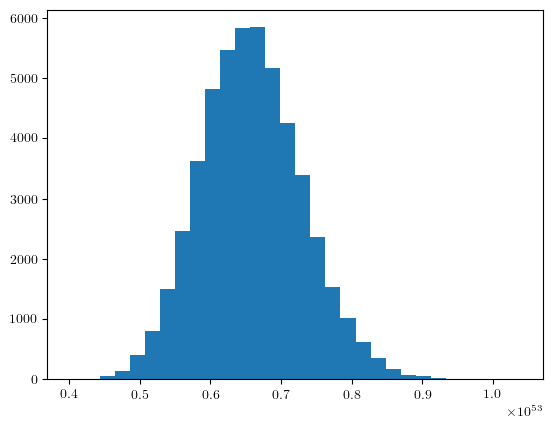

In [270]:
plt.hist(lums['Hyper-k'], bins = 30)
plt.show()

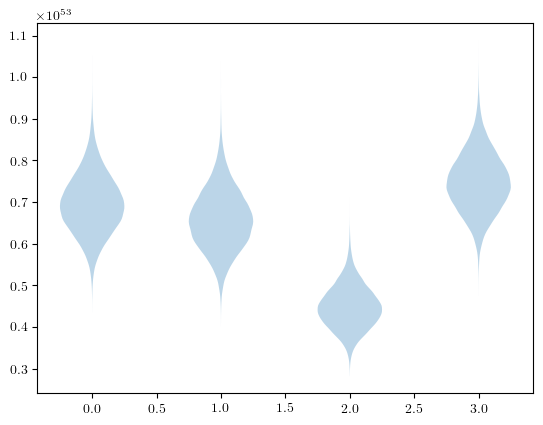

In [271]:
plt.violinplot([lums['super-k'], lums['Hyper-k'], lums['DUNE'], lums['JUNO']], positions = [0,1,2,3],
                showextrema = False)
plt.show()

## Distance estimation

In [38]:
# neutron star mass
m_ns = np.random.normal(1.33, 0.09)
# equation of state
eos = pd.read_csv('/home/pedroc/Documentos/pedro/Mestradives/Simulations/Neutron_eos_sly9.csv', sep = ';', header = None)
eos = eos.apply(lambda x: x.str.replace(',','.'))
eos = eos.rename(columns={0: 'Neutron Star Radius', 1: 'Neutron Star Mass'})
eos = eos.sort_values('Neutron Star Mass')
eos['Neutron Star Mass'] = eos['Neutron Star Mass'].astype('float')
eos['Neutron Star Radius'] = eos['Neutron Star Radius'].astype('float')
f = interp1d(eos['Neutron Star Mass'].values, eos['Neutron Star Radius'].values, fill_value = 'extrapolate')#, kind='cubic')

In [39]:
eos.head(5)

,Neutron Star Radius,Neutron Star Mass
34,16.661,0.20245
33,16.342,0.20245
32,15.942,0.20859
31,15.479,0.22086
30,15.048,0.23313


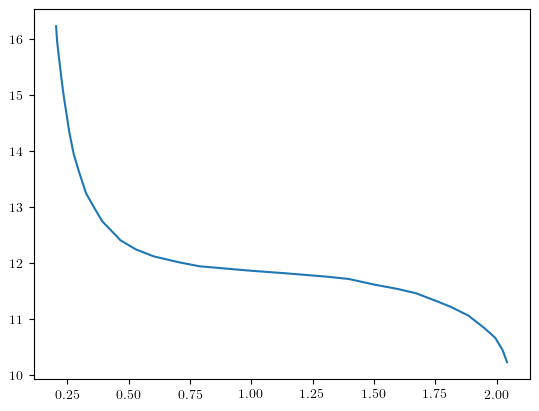

In [40]:
xnew = np.linspace(0.1, 2.1, 1000)

plt.plot(xnew, f(xnew))
plt.show()

In [41]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx], idx

In [42]:
xnew = np.linspace(0.1, 2.1, 10000)

find_nearest(xnew, m_ns)

(1.2345134513451346, 5672)

In [43]:
radius = f(find_nearest(xnew, m_ns)[0])

\begin{align}
& L - \frac{G M_{\mathrm{NS}}^2}{R_{\mathrm{NS}}} \approx L = 3.6 \times 10^{53} \left( \frac{M_{\mathrm{NS}}}{1.5 M_\odot} \right)^2 \left( \frac{10 \mathrm{km}}{R_{\mathrm{NS}}} \right) \text{ ergs}
\end{align}

Shapiro, S. L., & Teukolsky, S. A. (2008). Black holes, white dwarfs, and neutron stars: The physics of compact objects. John Wiley & Sons.

In [44]:
L = 3.6e53*((m_ns/1.5)**2)*(10/radius)

In [45]:
L

2.0680632885326394e+53

In [69]:
def spectrum_shape(x, alpha, E_mean):
    """
    Overral shape of the emission spectrum
    """
    A = ((1+alpha)**(1+alpha))/((gamma(1+alpha))*E_mean**(2+alpha))
    f_nu = A*(x**alpha)*np.exp(-(alpha + 1)*x/E_mean)
    return f_nu

In [52]:
if detector == 'super-k':
    channels = ['ibd','nue_e','nuebar_e','nue_O16','nuebar_O16','numu_e',
                'numubar_e','nc_nue_O16','nc_nuebar_O16']
    xs_data = cs.snowglobes(channels)

    # All these cross sections are in units of 10⁻³⁸ cm²/MeV
    cs_ibd = interp1d(1e3*(10**(xs_data[0][0])), xs_data[0][4]/1e3, fill_value='extrapolate')
    cs_nue_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[1][1]/1e3, fill_value='extrapolate')
    cs_nuebar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[2][4]/1e3, fill_value='extrapolate')
    cs_nue_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[3][1]/1e3, fill_value='extrapolate')
    cs_nuebar_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[4][1]/1e3, fill_value='extrapolate')
    cs_nux_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[5][2]/1e3, fill_value='extrapolate')
    cs_nuxbar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[6][5]/1e3, fill_value='extrapolate')
    cs_nc_nue_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[7][1]/1e3, fill_value='extrapolate')
    cs_nc_nuebar_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[8][4]/1e3, fill_value='extrapolate')
    # Total cross section
    total_cross = cs_nue_e(x)*x*1e-38 + cs_nue_O16(x)*x*1e-38 + cs_nuebar_e(x)*x*1e-38 + cs_ibd(x)*x*1e-38 + cs_nuebar_O16(x)*x*1e-38 + cs_nc_nuebar_O16(x)*x*1e-38 + cs_nux_e(x)*x*1e-38 + cs_nuxbar_e(x)*x*1e-38
elif detector == 'DUNE':
    channels = ['ibd','nue_e','nuebar_e','nue_Ar40','nuebar_Ar40','numu_e',
                'numubar_e','nc_nue_Ar40','nc_nuebar_Ar40','nc_numu_Ar40',
                'nc_numubar_Ar40']
    xs_data = cs.snowglobes(channels)

    # All these cross sections are in units of 10⁻³⁸ cm²/MeV
    cs_ibd = interp1d(1e3*(10**(xs_data[0][0])), xs_data[0][4]/1e3, fill_value='extrapolate')
    cs_nue_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[1][1]/1e3, fill_value='extrapolate')
    cs_nuebar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[2][4]/1e3, fill_value='extrapolate')
    cs_nue_Ar40 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[3][1]/1e3, fill_value='extrapolate')
    cs_nuebar_Ar40 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[4][1]/1e3, fill_value='extrapolate')
    cs_nux_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[5][2]/1e3, fill_value='extrapolate')
    cs_nuxbar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[6][5]/1e3, fill_value='extrapolate')
    cs_nc_nue_Ar40 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[7][1]/1e3, fill_value='extrapolate')
    cs_nc_nuebar_Ar40 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[8][4]/1e3, fill_value='extrapolate')
    cs_nc_nux_Ar40 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[9][2]/1e3, fill_value='extrapolate')
    cs_nc_nuxbar_Ar40 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[10][5]/1e3, fill_value='extrapolate')
    # Total cross section
    total_cross = cs_nue_e(x)*x*1e-38 + cs_nue_Ar40(x)*x*1e-38 + cs_nuebar_e(x)*x*1e-38 + cs_ibd(x)*x*1e-38 + cs_nuebar_Ar40(x)*x*1e-38 + cs_nux_e(x)*x*1e-38 + cs_nuxbar_e(x)*x*1e-38
elif detector == 'JUNO':
    channels = ['ibd','nue_e','nuebar_e','nue_C12','nuebar_C12','numu_e',
                'numubar_e','nc_nue_C12','nc_nuebar_C12','nc_numu_C12',
                'nc_numubar_C12']
    xs_data = cs.snowglobes(channels)

    # All these cross sections are in units of 10⁻³⁸ cm²/MeV
    cs_ibd = interp1d(1e3*(10**(xs_data[0][0])), xs_data[0][4]/1e3, fill_value = (0,xs_data[0][1][-1]/1e3))
    cs_nue_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[1][1]/1e3, fill_value = (0,xs_data[1][1][-1]/1e3))
    cs_nuebar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[2][4]/1e3, fill_value = (0,xs_data[2][4][-1]/1e3))
    cs_nue_C12 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[3][1]/1e3, fill_value = (0,xs_data[3][1][-1]/1e3))
    cs_nuebar_C12 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[4][1]/1e3, fill_value = (0,xs_data[4][1][-1]/1e3))
    cs_nux_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[5][2]/1e3, fill_value = (0,xs_data[5][2][-1]/1e3))
    cs_nuxbar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[6][5]/1e3, fill_value = (0,xs_data[6][5][-1]/1e3))
    cs_nc_nue_C12 = interp1d(1e3*(10**(xs_data[7][0])), xs_data[7][1]/1e3, fill_value = 'extrapolate')
    cs_nc_nuebar_C12 = interp1d(1e3*(10**(xs_data[8][0])), xs_data[8][4]/1e3, fill_value = 'extrapolate')
    cs_nc_nux_C12 = interp1d(1e3*(10**(xs_data[9][0])), xs_data[9][2]/1e3, fill_value = 'extrapolate')
    cs_nc_nuxbar_C12 = interp1d(1e3*(10**(xs_data[10][0])), xs_data[10][5]/1e3, fill_value = 'extrapolate')
    # Number of target particles
    """"
    Fengpeng, A., Guangpeng, A. N., Qi, A. N., Antonelli, V., Baussan, E.,
    Beacom, J., ... & Sinev, V. (2016). Neutrino physics with JUNO.
    """
    n_target = 1.5e33
    # Total cross section
    total_cross = cs_nue_e(x)*x*1e-38 + cs_nue_C12(x)*x*1e-38 + cs_nc_nue_C12(x)*x*1e-38 + cs_nuebar_e(x)*x*1e-38 + cs_ibd(x)*x*1e-38 + cs_nuebar_C12(x)*x*1e-38 + cs_nc_nuebar_C12(x)*x*1e-38 + cs_nux_e(x)*x*1e-38 + cs_nuxbar_e(x)*x*1e-38 + cs_nc_nux_C12(x)*x*1e-38 + cs_nc_nuxbar_C12(x)*x*1e-38
elif detector == 'Hyper-k':
    channels = ['ibd','nue_e','nuebar_e','nue_O16','nuebar_O16','numu_e',
                'numubar_e','nc_nue_O16','nc_nuebar_O16']
    xs_data = cs.snowglobes(channels)

    # All these cross sections are in units of 10⁻³⁸ cm²/MeV
    cs_ibd = interp1d(1e3*(10**(xs_data[0][0])), xs_data[0][4]/1e3, fill_value='extrapolate')
    cs_nue_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[1][1]/1e3, fill_value='extrapolate')
    cs_nuebar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[2][4]/1e3, fill_value='extrapolate')
    cs_nue_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[3][1]/1e3, fill_value='extrapolate')
    cs_nuebar_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[4][1]/1e3, fill_value='extrapolate')
    cs_nux_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[5][2]/1e3, fill_value='extrapolate')
    cs_nuxbar_e = interp1d(1e3*(10**(xs_data[0][0])), xs_data[6][5]/1e3, fill_value='extrapolate')
    cs_nc_nue_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[7][1]/1e3, fill_value='extrapolate')
    cs_nc_nue_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[7][1]/1e3, fill_value='extrapolate')
    cs_nc_nuebar_O16 = interp1d(1e3*(10**(xs_data[0][0])), xs_data[8][4]/1e3, fill_value='extrapolate')
    # Number of target particles
    n_target = (216e9/18.01528)*6.022e23*2 # number of protons
    # Total cross section
    total_cross = cs_nue_e(x)*x*1e-38 + cs_nue_O16(x)*x*1e-38 + cs_nuebar_e(x)*x*1e-38 + cs_ibd(x)*x*1e-38 + cs_nuebar_O16(x)*x*1e-38 + cs_nux_e(x)*x*1e-38 + cs_nuxbar_e(x)*x*1e-38 + cs_nc_nuebar_O16(x)*x*1e-38

The distance from the Supernova to the detector may be written as
\begin{align}
    D &= \displaystyle \sqrt{\frac{n_{\mathrm{tot}} L}{N_\nu^{\mathrm{tot}}} \int_0^\infty \mathcal{F}_{\mathrm{tot}}^d (E) \sigma(E) \varepsilon(E) dE} \approx \\
    &\approx \displaystyle \sqrt{3.6 \times 10^{53} \left( \frac{M_{\mathrm{NS}}}{1.5 M_\odot} \right)^2 \left( \frac{10 \mathrm{km}}{R_{\mathrm{NS}}} \right) \frac{n_{\mathrm{tot}}}{N_\nu^{\mathrm{tot}}} \int_0^\infty \mathcal{F}_{\mathrm{tot}}^d (E) \sigma(E) \varepsilon(E) dE}
\end{align}

where the mass of the neutron star is given by a normal distribution

\begin{align}
    M_{\mathrm{NS}} \sim \mathcal{N}(\mu=1.33, \sigma = 0.09)
\end{align}

and the radius is calculated from a equation of state

\begin{align}
    R_{\mathrm{NS}} = \mathrm{EOS} \left( M_{\mathrm{NS}} \right)
\end{align}

\begin{align}
    U = - 16 A \pi^2 G \left[ \dfrac{5b^5}{8}-\dfrac{\mathrm{e}^{-\frac{2R}{b}}\cdot\left(\left(16b^5+16Rb^4\right)\mathrm{e}^\frac{R}{b}-11b^5-22Rb^4-14R^2b^3-4R^3b^2\right)}{8} \right]
\end{align}

In [47]:
def R_th(M):
    M_sol = 1.989e30
    c = 2.98e8
    G = 6.67e-11
    return 2.9*M*M_sol*G/c**2

def R_sph(M):
    M_sol = 1.989e30
    return 10.4*((1000/716)**(2/3))*((M*M_sol/M_sol)**(1/3))

### ABC-SMC

100%|██████████| 156/156 [01:20<00:00,  1.94it/s]


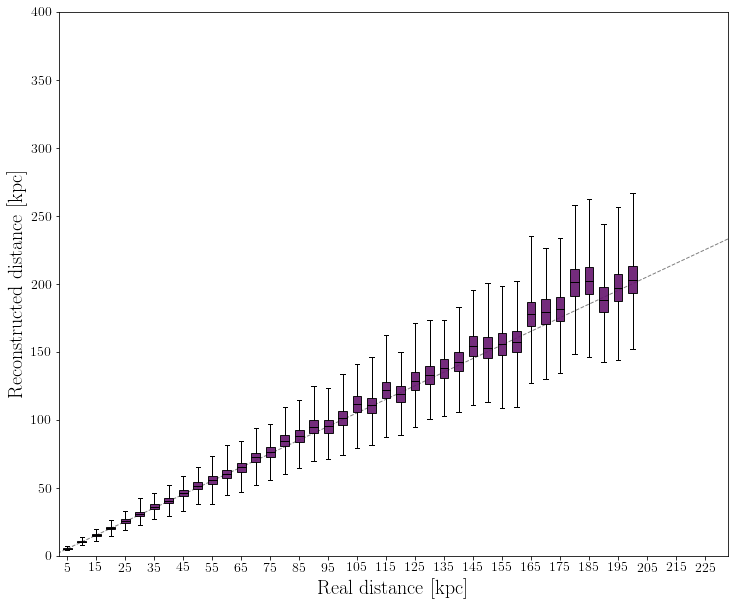

In [71]:
fig, ax = plt.subplots(figsize=(12,10))
plt.plot([0,235], [0,235], ls = '--', color = 'grey',
         lw = 1)
for i in tqdm(range(len(results))):
    d = results[i].split('_')[10]
    if 'detections' not in results[i].split('_'):
        continue
    else:
        if detector == results[i].split('_')[12]:
            N_T = int(results[i].split('_')[-1].split('.')[0])
            df = pd.read_csv(f'Results/{results[i]}')
            alphas = df['Alpha']
            E_mean = df['Mean energy']
        else:
            continue
        distances = []
        for i in range(len(alphas)):
            # Sampling neutron star mass
            m_ns = np.random.normal(1.33, 0.09)
            # Setting the radius
            radius = f(find_nearest(xnew, m_ns)[0])
            # Calculating total luminosity
            L = 3.6e53*((m_ns/1.5)**2)*(10/radius)
            # Calculating distance squared
            D = (L*6.2415e5/(24*np.pi*N_T))*targets*simps(fitting.spectrum_shape(x, alphas[i], E_mean[i])*dtc.efficiency_sigmoid(x, 1, 7, 3.5)*total_cross, x)
            distances.append(np.sqrt(D)*3.2408e-22)
        plt.boxplot(distances, positions = [int(d)], widths = 3, patch_artist = True,
                          boxprops = {'facecolor': sns.color_palette('inferno')[1], 
                                      'edgecolor': 'black', 'alpha': 0.9},
                          whis = (0, 100), medianprops = {'color': 'black',
                                                         'linewidth': 1})
        
plt.xlim(2, 233)
plt.ylim(0, 400)
plt.xlabel('Real distance [kpc]', fontsize = 20)
plt.ylabel(r'Reconstructed distance [kpc]', fontsize = 20)
plt.xticks([5+10*i for i in range(23)], [5+10*i for i in range(23)], fontsize = 14)
plt.yticks(ax.get_yticks(), fontsize = 14)
plt.show()

100%|██████████| 156/156 [01:20<00:00,  1.94it/s]


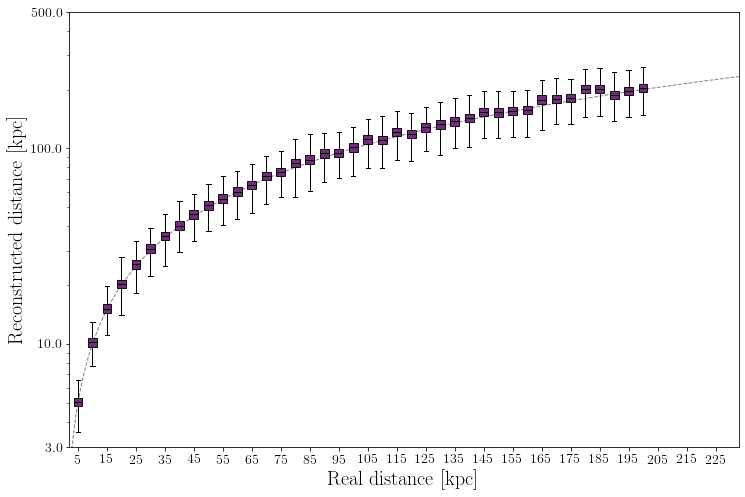

In [73]:
fig, ax = plt.subplots(figsize=(12,8))
x_d = np.linspace(2, 235, 10000)
plt.plot(x_d, x_d, ls = '--', color = 'grey',
         lw = 1)
for i in tqdm(range(len(results))):
    d = results[i].split('_')[10]
    if 'detections' not in results[i].split('_'):
        continue
    else:
        if detector == results[i].split('_')[12]:
            N_T = int(results[i].split('_')[-1].split('.')[0])
            df = pd.read_csv(f'Results/{results[i]}')
            alphas = df['Alpha']
            E_mean = df['Mean energy']
        else:
            continue
        distances = []
        for i in range(len(alphas)):
            # Sampling neutron star mass
            m_ns = np.random.normal(1.33, 0.09)
            # Setting the radius
            radius = f(find_nearest(xnew, m_ns)[0])
            # Calculating total luminosity
            L = 3.6e53*((m_ns/1.5)**2)*(10/radius)
            # Calculating distance squared
            D = (L*6.2415e5/(24*np.pi*N_T))*targets*simps(fitting.spectrum_shape(x, alphas[i], E_mean[i])*dtc.efficiency_sigmoid(x, 1, 7, 3.5)*total_cross, x)
            distances.append(np.sqrt(D)*3.2408e-22)
        plt.boxplot(distances, positions = [int(d)], widths = 3, patch_artist = True,
                          boxprops = {'facecolor': sns.color_palette('inferno')[1], 
                                      'edgecolor': 'black', 'alpha': 0.9},
                          whis = (0, 100), medianprops = {'color': 'black',
                                                         'linewidth': 1})
        
plt.xlim(2, 233)
plt.ylim(3e0, 5e2)
plt.yscale('log')
plt.xlabel('Real distance [kpc]', fontsize = 20)
plt.ylabel(r'Reconstructed distance [kpc]', fontsize = 20)
plt.xticks([5+10*i for i in range(23)], [5+10*i for i in range(23)], fontsize = 14)
plt.yticks([3e0, 1e1, 1e2, 5e2], [3e0, 1e1, 1e2, 5e2], fontsize = 14)
plt.show()

In [34]:
M_sol = 1.989e30 # kg
M = np.linspace(0, 4, 1000)*M_sol
G = 6.67e-11 # m^3 / kg^1 s^2
c = 2.98e8 # m/s
R_th = 2.9*M*G/c**2
R_schw = 2*M*G/c**2
R_sph = 10.4*((1000/716)**(2/3))*((M/M_sol)**(1/3))

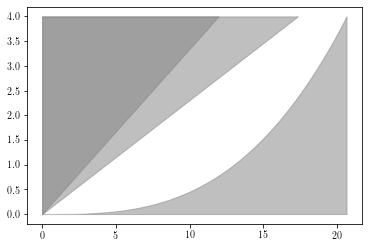

In [35]:
plt.fill_between(R_th/1000, M/M_sol, 4, color = 'grey', alpha = 0.5)
plt.fill_between(R_sph, 0, M/M_sol, color = 'grey', alpha = 0.5)
plt.fill_between(R_schw/1000, M/M_sol, 4, color = 'grey', alpha = 0.5)

100%|██████████| 156/156 [00:54<00:00,  2.84it/s]


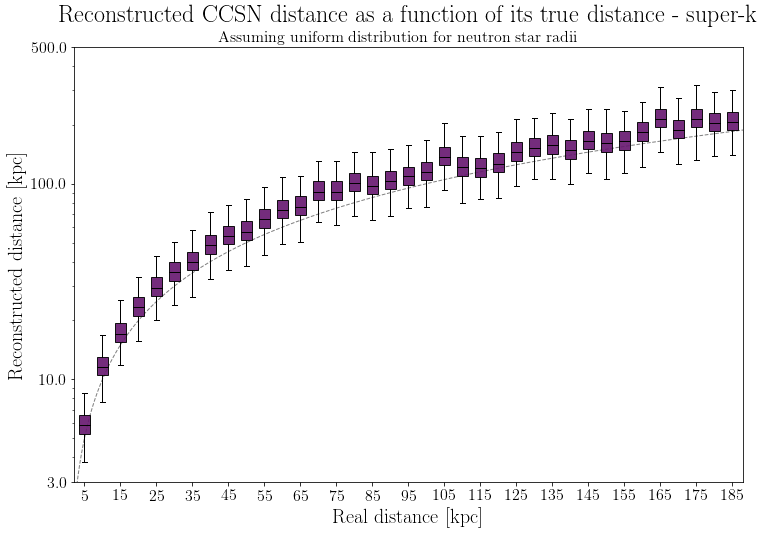

In [43]:
fig, ax = plt.subplots(figsize=(12,8))
x_d = np.linspace(2, 235, 10000)
plt.plot(x_d, x_d, ls = '--', color = 'grey',
         lw = 1)
for i in tqdm(range(len(results))):
    d = results[i].split('_')[10]
    if 'detections' not in results[i].split('_'):
        continue
    else:
        if detector == results[i].split('_')[12]:
            N_T = int(results[i].split('_')[-1].split('.')[0])
            df = pd.read_csv(f'Results/{results[i]}')
            alphas = df['Alpha']
            E_mean = df['Mean energy']
        else:
            continue
        distances = []
        for i in range(len(alphas)):
            # Sampling neutron star mass
            m_ns = np.random.normal(1.33, 0.09)
            # Setting the radius
            radius = np.random.uniform(R_th(m_ns)/1000, R_sph(m_ns))
            # Calculating total luminosity
            L = 3.6e53*((m_ns/1.5)**2)*(10/radius)
            # Calculating distance squared
            D = (L*6.2415e5/(18*np.pi*N_T))*targets*simps(fitting.spectrum_shape(x, alphas[i], E_mean[i])*dtc.efficiency_sigmoid(x, 1, 7, 3.5)*total_cross, x)
            distances.append(np.sqrt(D)*3.2408e-22)
        plt.boxplot(distances, positions = [int(d)], widths = 3, patch_artist = True,
                          boxprops = {'facecolor': sns.color_palette('inferno')[1], 
                                      'edgecolor': 'black', 'alpha': 0.9},
                          whis = (0, 100), medianprops = {'color': 'black',
                                                         'linewidth': 1})
        
plt.xlim(2, 188)
plt.ylim(3e0, 5e2)
plt.yscale('log')
plt.xlabel('Real distance [kpc]', fontsize = 20)
plt.ylabel(r'Reconstructed distance [kpc]', fontsize = 20)
plt.xticks([5+10*i for i in range(19)], [5+10*i for i in range(19)], fontsize = 16)
plt.yticks([3e0, 1e1, 1e2, 5e2], [3e0, 1e1, 1e2, 5e2], fontsize = 16)
plt.title(f'Reconstructed CCSN distance as a function of its true distance - {detector}', fontsize = 24,
         pad = 24)
fig.text(0.5, 0.89, 'Assuming uniform distribution for neutron star radii', ha = 'center', fontsize = 16)
fig.patch.set_alpha(1)
plt.savefig(f'Plots/Reconstructed_distance_model_independent_{detector}.png', dpi = 300,
            bbox_inches = 'tight')
plt.show()

0 super-k 24


100%|██████████| 156/156 [01:00<00:00,  2.60it/s]


1 Hyper-k 30


100%|██████████| 156/156 [00:55<00:00,  2.83it/s]


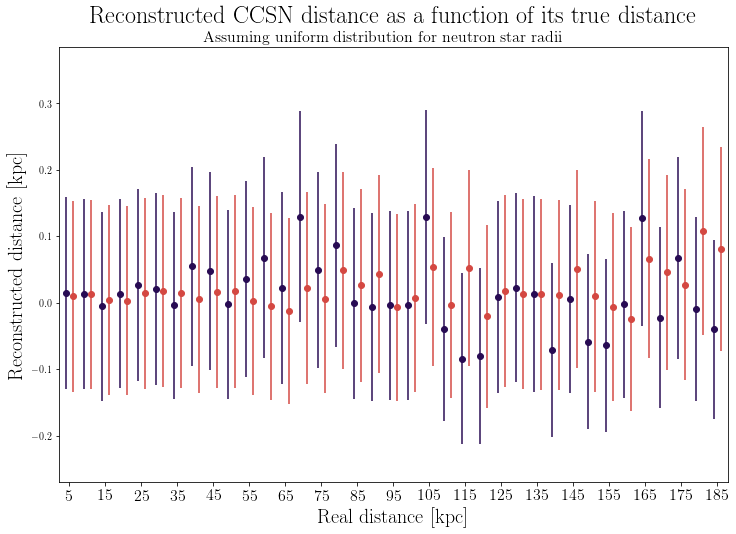

In [120]:
fig, ax = plt.subplots(figsize=(12,8))
x_d = np.linspace(2, 235, 10000)
# plt.plot(x_d, x_d, ls = '--', color = 'grey',
#          lw = 1)

detectors = ['super-k', 'Hyper-k']
for idx, detector in enumerate(detectors):
    if detector == 'Hyper-k':
        m = 30
        targets = (216e9/18.01528)*6.022e23*2
    else:
        m = 24
        targets = (32e9/18.01528)*6.022e23*2
    print(idx, detector, m)
    for i in tqdm(range(len(results))):
        d = results[i].split('_')[10]
        if 'detections' not in results[i].split('_'):
            continue
        else:
            if detector == results[i].split('_')[12]:
                N_T = int(results[i].split('_')[-1].split('.')[0])
                df = pd.read_csv(f'Results/{results[i]}')
                alphas = df['Alpha']
                E_mean = df['Mean energy']
            else:
                continue
            distances = []
            for j in range(len(alphas)):
                # Sampling neutron star mass
                m_ns = np.random.normal(1.33, 0.09)
                # Setting the radius
                radius = np.random.uniform(R_th(m_ns)/1000, R_sph(m_ns))
                # Calculating total luminosity
                L = 3.6e53*((m_ns/1.5)**2)*(10/radius)
                # Calculating distance squared
                D = (L*6.2415e5/(m*np.pi*N_T))*targets*simps(fitting.spectrum_shape(x, alphas[j], E_mean[j])*dtc.efficiency_sigmoid(x, 1, 7, 3.5)*total_cross, x)
                distances.append(np.sqrt(D)*3.2408e-22)
            distances = np.array(distances)
            # plt.boxplot((distances-int(d))/int(d), positions = [int(d)-1.5 + 3*idx], widths = 1.5, patch_artist = True,
            #                   boxprops = {'facecolor': sns.color_palette('inferno')[idx*2], 
            #                               'edgecolor': 'black', 'alpha': 0.9},
            #                   whis = (0, 100), medianprops = {'color': 'black',
            #                                                  'linewidth': 1})
            plt.scatter(int(d)-1 + 2*idx, np.mean((distances-int(d))/int(d)),
                        color = sns.color_palette('inferno')[idx*3])
            plt.errorbar(int(d)-1 + 2*idx, np.mean((distances-int(d))/int(d)),
                         yerr = np.std((distances-int(d))/int(d)), fmt = 'none',
                         color = sns.color_palette('inferno')[idx*3])
        
plt.xlim(2, 188)
# plt.ylim(3e0, 5e2)
# plt.yscale('log')
plt.xlabel('Real distance [kpc]', fontsize = 20)
plt.ylabel(r'Reconstructed distance [kpc]', fontsize = 20)
plt.xticks([5+10*i for i in range(19)], [5+10*i for i in range(19)], fontsize = 16)
# plt.yticks([3e0, 1e1, 1e2, 5e2], [3e0, 1e1, 1e2, 5e2], fontsize = 16)
plt.title(f'Reconstructed CCSN distance as a function of its true distance', fontsize = 24,
          pad = 24)
fig.text(0.5, 0.89, 'Assuming uniform distribution for neutron star radii', ha = 'center', fontsize = 16)
fig.patch.set_alpha(1)
# plt.savefig(f'Plots/Reconstructed_distance_model_independent_{detector}.svg', dpi = 300,
#             bbox_inches = 'tight')
plt.show()

### Least-squares

100%|██████████| 50000/50000 [00:00<00:00, 172142.37it/s]


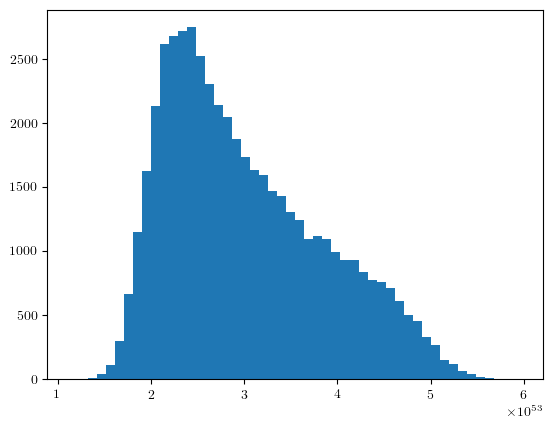

In [48]:
luminosities = []

for j in tqdm(range(50000)):
    # Sampling neutron star mass
    m_ns = np.random.normal(1.33, 0.09)
    # Setting the radius
    radius = np.random.uniform(R_th(m_ns)/1000, R_sph(m_ns))
    # Calculating total luminosity
    L = 3.6e53*((m_ns/1.5)**2)*(10/radius)#*6.2415e5
    luminosities.append(L)

luminosities = np.array(luminosities)

plt.hist(luminosities, bins = 50)
plt.show()

In [49]:
N_T = len(ref['Energy_Total'])

In [50]:
R_th(1.33)/1000, R_sph(1.33)

(5.762059356560515, 14.290317283884052)

In [51]:
D_square*4*np.pi*N_T

NameError: name 'D_square' is not defined

In [243]:
targets

6.03e+32

In [244]:
simps(fitting.spectrum_shape(x, a, b)*np.where(x<4.5,0,0.9)*total_cross, x)

2.6039440040501684e-42

In [53]:
luminosity = []

for j in tqdm(range(50000)):
    # Sampling neutron star mass
    # m_ns = np.random.normal(1.33, 0.09)
    # Setting the radius
    # radius = np.random.uniform(R_th(m_ns)/1000, R_sph(m_ns))
    # Calculating total luminosity
    # L = 3.6e53*((m_ns/1.5)**2)*(10/radius)*6.2415e5/3
    # L = np.random.normal(5e52, 2e52)*6.2415e5
    # Calculating distance squared
    a = np.random.normal(c[0], np.sqrt(cov[0,0]))
    b = np.random.normal(c[1], np.sqrt(cov[1,1]))
    D = np.random.normal(11, 0.5)
    D_square = (D*3.086e21)**2
    L = D_square*4*np.pi*N_T/(targets*simps(fitting.spectrum_shape(x, a, b)*np.where(x<4.5,0,0.9)*total_cross, x))
    luminosity.append(L*1.60218e-6)

100%|██████████| 50000/50000 [00:04<00:00, 11263.89it/s]


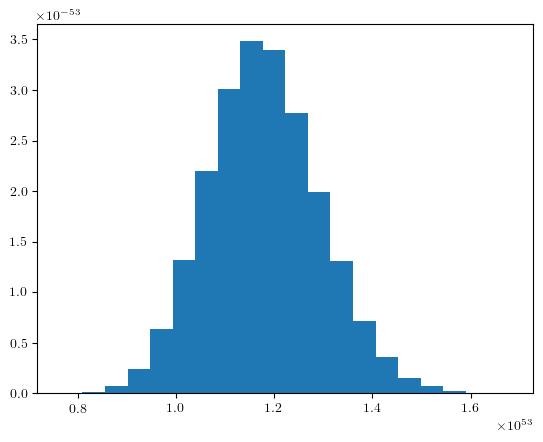

In [54]:
plt.hist(luminosity, bins = 20, density = True)
plt.show()

In [36]:
distance = []

for j in tqdm(range(50000)):
    # Sampling neutron star mass
    m_ns = np.random.normal(1.33, 0.09)
    # Setting the radius
    radius = np.random.uniform(R_th(m_ns)/1000, R_sph(m_ns))
    # Calculating total luminosity
    L = 3.6e53*((m_ns/1.5)**2)*(10/radius)*6.2415e5
    # L = np.random.normal(5e52, 2e52)*6.2415e5
    # Calculating distance squared
    a = np.random.normal(c[0], np.sqrt(cov[0,0]))
    b = np.random.normal(c[1], np.sqrt(cov[1,1]))
    D_square = (L/(4*np.pi*N_T))*targets*simps(fitting.spectrum_shape(x, a, b)*np.where(x<4.5,0,0.9)*total_cross, x)
    distance.append(np.sqrt(D_square)*3.2408e-22)

  0%|          | 0/50000 [00:00<?, ?it/s]


NameError: name 'R_th' is not defined

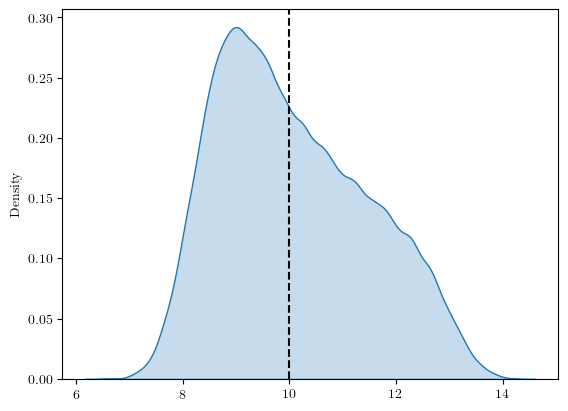

In [59]:
# plt.hist(distance, bins = [5 + i for i in range(40)], edgecolor = 'black', density = True)
sns.kdeplot(distance, fill = True, bw_adjust = 0.7)
plt.axvline(10, ls = '--', color = 'black')
plt.show()

In [63]:
detector = 'super-k'

if detector == 'JUNO':
    cte = 24
elif detector == 'DUNE':
    cte = 32
elif detector == 'Hyper-k':
    cte = 2.8
elif detector == 'super-k':
    cte = 16

distances = []
for i in tqdm(range(40)):
    d = 5*(1+i)
    df = pd.read_csv(f"Results/Alpha_and_E_mean_supernova_energy_per_flavor_5e52_distances_detector_{detector}_Least-Squares.csv")
    distance = []
    for k in range(len(df[f'Distance {d} - alpha'])):
        N_T = df[f'Distance {d} - N_T'][k]
        for j in range(1000):
            # Sampling neutron star mass
            m_ns = np.random.normal(1.33, 0.09)
            # Setting the radius
            radius = np.random.uniform(R_th(m_ns)/1000, R_sph(m_ns))
            # Calculating total luminosity
            L = 3.6e53*((m_ns/1.5)**2)*(10/radius)*6.2415e5
            # Calculating distance squared
            a = np.random.normal(df[f'Distance {d} - alpha'][k], df[f'Distance {d} - alpha_err'][k])
            b = np.random.normal(df[f'Distance {d} - E_mean'][k], df[f'Distance {d} - E_mean_err'][k])
            D = (L/(cte*np.pi*N_T))*targets*simps(fitting.spectrum_shape(x, a, b)*dtc.efficiency_sigmoid(x, 1, 7, 3.5)*total_cross, x)
            distance.append(np.sqrt(D)*3.2408e-22)

    distances.append(distance)

100%|██████████| 40/40 [02:14<00:00,  3.35s/it]


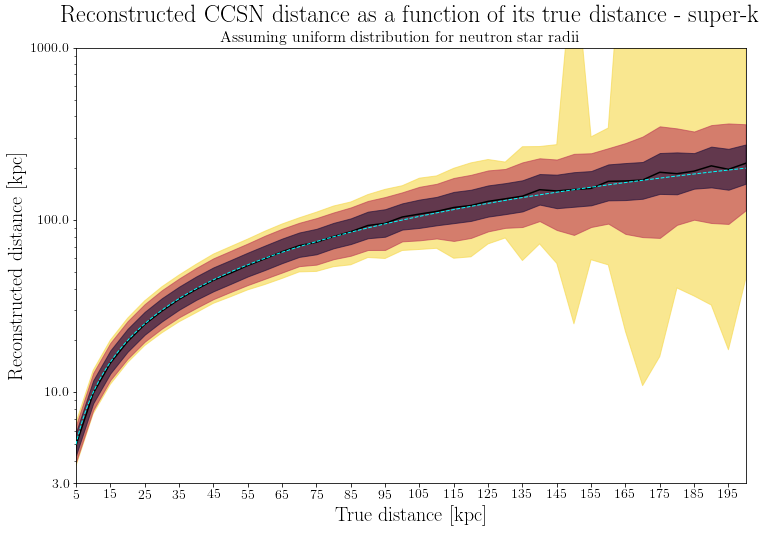

In [64]:
cmap = 'inferno'
fig, ax = plt.subplots(figsize=(12,8))
x_d = np.linspace(2, 235, 10000)
plt.plot(x_d, x_d, ls = '--', color = 'cyan',
         lw = 1, zorder = 4)
plt.plot([5*(1+i) for i in range(40)], np.nanmedian(distances, axis = 1), zorder = 3,
         color = 'black')
plt.fill_between([5*(1+i) for i in range(40)], np.nanpercentile(distances, 16, axis = 1),
                np.nanpercentile(distances, 84, axis = 1), alpha = 0.6, zorder = 2,
                color = sns.color_palette(cmap, 9)[0])
plt.fill_between([5*(1+i) for i in range(40)], np.nanpercentile(distances, 2.5, axis = 1),
                np.nanpercentile(distances, 97.5, axis = 1), alpha = 0.6, zorder = 1,
                color = sns.color_palette(cmap, 9)[4])
plt.fill_between([5*(1+i) for i in range(40)], np.nanpercentile(distances, 0.5, axis = 1),
                np.nanpercentile(distances, 99.5, axis = 1), alpha = 0.6, zorder = 0,
                color = sns.color_palette(cmap, 9)[8])
plt.ylim(3e0, 1e3)
plt.yscale('log')
plt.xlabel('True distance [kpc]', fontsize = 20)
plt.ylabel(r'Reconstructed distance [kpc]', fontsize = 20)
plt.xticks([5+10*i for i in range(20)], [5+10*i for i in range(20)], fontsize = 14)
plt.yticks([3e0, 1e1, 1e2, 1e3], [3e0, 1e1, 1e2, 1e3], fontsize = 14)
plt.xlim(5, 200)
plt.title(f'Reconstructed CCSN distance as a function of its true distance - {detector}', fontsize = 24,
         pad = 24)
fig.text(0.5, 0.89, 'Assuming uniform distribution for neutron star radii', ha = 'center', fontsize = 16)
fig.patch.set_alpha(1)
# plt.savefig(f'Plots/Reconstructed_distance_model_independent_{detector}_Least-Squares.svg', dpi = 300,
#             bbox_inches = 'tight')
# plt.savefig(f'Plots/Reconstructed_distance_model_independent_{detector}_Least-Squares.png', dpi = 300,
#             bbox_inches = 'tight')
plt.show()

In [65]:
distances_superk = distances

In [22]:
d_x = np.array([5*(1+i) for i in range(40)])

In [151]:
iqr_juno = np.nanpercentile(distances_juno, 75, axis = 1) - np.nanpercentile(distances_juno, 25, axis = 1)
iqr_dune = np.nanpercentile(distances_dune, 75, axis = 1) - np.nanpercentile(distances_dune, 25, axis = 1)
iqr_hyperk = np.nanpercentile(distances_hyperk, 75, axis = 1) - np.nanpercentile(distances_hyperk, 25, axis = 1)
iqr_superk = np.nanpercentile(distances_superk, 75, axis = 1) - np.nanpercentile(distances_superk, 25, axis = 1)

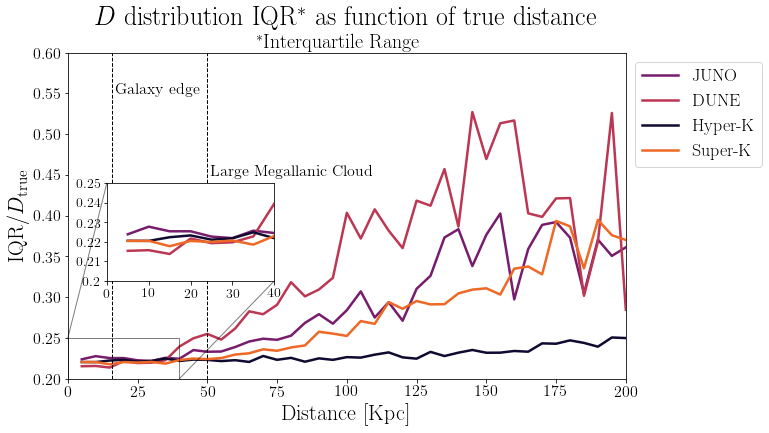

In [172]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(d_x, iqr_juno/d_x, lw = 2.5,
        color = sns.color_palette(cmap, 11)[3], label = 'JUNO')

plt.plot(d_x, iqr_dune/d_x, lw = 2.5,
        color = sns.color_palette(cmap, 11)[5], label = 'DUNE')

plt.plot(d_x, iqr_hyperk/d_x, lw = 2.5,
        color = sns.color_palette(cmap, 11)[0], label = 'Hyper-K')

plt.plot(d_x, iqr_superk/d_x, lw = 2.5,
        color = sns.color_palette(cmap, 11)[7], label = 'Super-K')
plt.ylim(0.2, 0.6)
plt.xlim(0, 200)
plt.legend(bbox_to_anchor=(1,1), fontsize = 18)
plt.ylabel('IQR/$D_{\mathrm{true}}$', fontsize = 22)
plt.xlabel('Distance [Kpc]', fontsize = 22)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('$D$ distribution IQR$^*$ as function of true distance', fontsize = 26, pad = 28)
fig.text(0.5, 0.89, r'$^*$Interquartile Range', fontsize = 20, ha = 'center')
plt.axvline(16, ls = '--', lw = 1, color = 'black')
plt.axvline(50, ls = '--', lw = 1, color = 'black')
plt.text(17, 0.55, 'Galaxy edge', fontsize = 16)
plt.text(51, 0.45, 'Large Megallanic Cloud', fontsize = 16)

axins = ax.inset_axes([0.07, 0.3, 0.3, 0.3])
axins.plot(d_x, iqr_juno/d_x, lw = 2.5,
          color = sns.color_palette(cmap, 11)[3])
axins.plot(d_x, iqr_dune/d_x, lw = 2.5,
          color = sns.color_palette(cmap, 11)[5])
axins.plot(d_x, iqr_hyperk/d_x, lw = 2.5,
          color = sns.color_palette(cmap, 11)[0])
axins.plot(d_x, iqr_superk/d_x, lw = 2.5,
          color = sns.color_palette(cmap, 11)[7])
# sub region of the original image
x1, x2, y1, y2 = 0, 40, 0.2, 0.25
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks([0,10,20,30,40])
axins.set_yticks([0.2,0.21,0.22,0.23,0.24,0.25])
axins.set_xticklabels([0,10,20,30,40], fontsize = 14)
axins.set_yticklabels([0.2,0.21,0.22,0.23,0.24,0.25], fontsize = 14)

ax.indicate_inset_zoom(axins, edgecolor="black")

fig.patch.set_alpha(0)
for ax in fig.axes:
    ax.patch.set_alpha(0.5)
plt.savefig('Plots/Distribution_width_IQR_detectors.svg', dpi = 300, bbox_inches = 'tight')
plt.show()

In [176]:
sns.color_palette('icefire', 11)

[(0.50555676, 0.74804469, 0.81063503),
 (0.27923924, 0.59522877, 0.80669803),
 (0.25423116, 0.40433127, 0.78155831),
 (0.2659204, 0.25949691, 0.511417),
 (0.16868273, 0.16479861, 0.25034479),
 (0.12284806, 0.1179729, 0.11772022),
 (0.25546457, 0.13661751, 0.16248722),
 (0.47151732, 0.17401641, 0.24610337),
 (0.72401436, 0.20691287, 0.25027366),
 (0.8866469, 0.37249496, 0.1997976),
 (0.95471709, 0.60510869, 0.37236035)]

In [180]:
# List of colors from LGBT+ flags
colors = ["#f1e397","#f1c66b","#ef856d","#c16364","#706fa3","#6a8ecd","#7dc0da","#b7dcd4"]

# Create linear transitions between colors to make colormaps
custom = mpl.colors.LinearSegmentedColormap.from_list("", colors)

# Reverse list of colors
colors.reverse()

# Create other colormaps with same colors but reversed order
custom_r = mpl.colors.LinearSegmentedColormap.from_list("", colors)

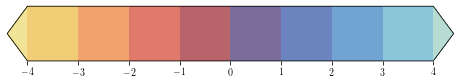

In [192]:
fig, ax = plt.subplots(figsize=(8, 2))
fig.subplots_adjust(bottom=0.5)

cmap = custom
bounds = [-4, -3, -2, -1, 0, 1, 2, 3, 4]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal')